<a href="https://colab.research.google.com/github/arfanulaziz/Data-analyst-with-python/blob/main/Python_Data_Analytics_Datacamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def greet(first_name, last_name):
    greeting = 'My name is ' + last_name + ', ' + first_name + ' ' + last_name + '!'
    return greeting

greet('Muhammad Arfanul', 'Aziz')

'My name is Aziz, Muhammad Arfanul Aziz!'

# **Intro to Importing Data in Python**

**Chapter 1 Introduction and flat files**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file = '/content/drive/MyDrive/Colab Notebooks/Intro to importing data to python/seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()

SyntaxError: ignored

In [ ]:
# Assign the filename: file
file = '/content/drive/MyDrive/Colab Notebooks/Titanic.csv'

# Import file using np.recfromcsv: d
d = np.recfromcsv(file, delimiter=',', names=True, dtype=None)

# Print out first three entries of d
print(d[:3])

[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [ ]:
# Using pandas to import flat files as DataFrames (1)
# In the last exercise, you were able to import flat files containing columns with different datatypes as numpy arrays. However, the DataFrame object in pandas is a more appropriate structure in which to store such data and, thankfully, we can easily import files of mixed data types as DataFrames using the pandas functions read_csv() and read_table()

# Import pandas as pd
import pandas as pd

# Assign the filename: file
file = '/content/drive/MyDrive/Colab Notebooks/Titanic.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)

# View the head of the DataFrame
print(df.head())

   PassengerId  Survived  Pclass  ...     Fare  Cabin  Embarked
0            1         0       3  ...   7.2500    NaN         S
1            2         1       1  ...  71.2833    C85         C
2            3         1       3  ...   7.9250    NaN         S
3            4         1       1  ...  53.1000   C123         S
4            5         0       3  ...   8.0500    NaN         S

[5 rows x 11 columns]


In [ ]:
# Using pandas to import flat files as DataFrames (2)
# In the last exercise, you were able to import flat files into a pandas DataFrame. As a bonus, it is then straightforward to retrieve the corresponding numpy array using the attribute values. You'll now have a chance to do this using the MNIST dataset, which is available as digits.csv.

# Assign the filename: file
file = 'digits.csv'

# Read the first 5 rows of the file into a DataFrame: data
data = pd.read_csv(file, nrows=5, header=None)

# Build a numpy array from the DataFrame: data_array
data_array = np.array(data)

# Print the datatype of data_array to the shell
print(type(data_array))

In [ ]:
# Customizing your pandas import
# The pandas package is also great at dealing with many of the issues you will encounter when importing data as a data scientist, such as comments occurring in flat files, empty lines and missing values. Note that missing values are also commonly referred to as NA or NaN. To wrap up this chapter, you're now going to import a slightly corrupted copy of the Titanic dataset titanic_corrupt.txt, which

# contains comments after the character '#'
# is tab-delimited.
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd

file = '/content/drive/MyDrive/Colab Notebooks/Titanic.csv'

# Import file: data
data = pd.read_csv(file, sep='\t', comment='#', na_values='Nothing')

# Print the head of the DataFrame
print(data.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])

plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()


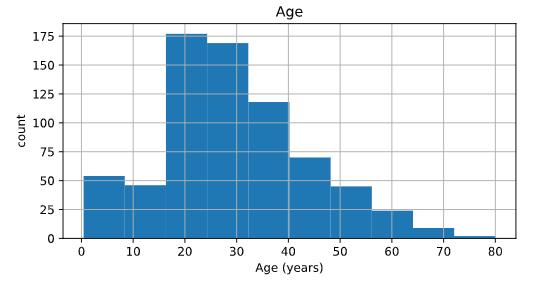

**Chapter 2 Importing data from other file types**

In [ ]:
import os
wd = os.getcwd()
os.listdir(wd)

['.config', 'drive', 'seaslug.txt', 'sample_data']

In [ ]:
# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = '/content/drive/MyDrive/Colab Notebooks/battledeath.xlsx'

# Load spreadsheet: xls
xls = pd.ExcelFile(file)

# Print sheet names
print(xls.sheet_names)

['2002', '2004']


In [ ]:
# Importing sheets from Excel files
# In the previous exercises, you saw that the Excel file contains two sheets, '2002' and '2004'. The next step is to import these.

# In this exercise, you'll learn how to import any given sheet of your loaded .xlsx file as a DataFrame. You'll be able to do so by specifying either the sheet's name or its index.

# Load a sheet into a DataFrame by name: df1
df1 = xls.parse('2004')

# Print the head of the DataFrame df1
print(df1.head())

# Load a sheet into a DataFrame by index: df2
df2 = xls.parse(0)

# Print the head of the DataFrame df2
print(df2.head())

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


In [ ]:
# Customizing your spreadsheet import
# Here, you'll parse your spreadsheets and use additional arguments to skip rows, rename columns and select only particular columns.
# The spreadsheet 'battledeath.xlsx' is already loaded as xls.
# As before, you'll use the method parse(). This time, however, you'll add the additional arguments skiprows, names and usecols. These skip rows, name the columns and designate which columns to parse, respectively. All these arguments can be assigned to lists containing the specific row numbers, strings and column numbers, as appropriate.

# Parse the first sheet and rename the columns: df1
df1 = xls.parse('2002', skiprows=1, names=['Country','AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(1, usecols=[0], skiprows=1, names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())

               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


In [ ]:
# Parse the first sheet and rename the columns: df1
df1 = xls.parse(0, skiprows=[0], names=['Country','AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(1, usecols=[0], skiprows=1, names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())

               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


**Importing SAS files**

In this exercise, you'll figure out how to import a `SAS` file as a DataFrame using `SAS7BDAT` and pandas. The file '`sales.sas7bdat`' is already in your working directory and both `pandas` and `matplotlib`.pyplot have already been imported as follows:

`import pandas as pd`

`import matplotlib.pyplot as plt`


In [ ]:
pip install sas7bdat

  Created wheel for sas7bdat: filename=sas7bdat-2.2.3-py3-none-any.whl size=16309 sha256=aa6689ba4744187ae47df39f018289ef9078d40c63027d222c4e1aa6b63f2f0e
  Stored in directory: /root/.cache/pip/wheels/69/dd/ca/1fd7bf96640d87457056b763e015e20d8e566041bd3273d966
Successfully built sas7bdat


     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


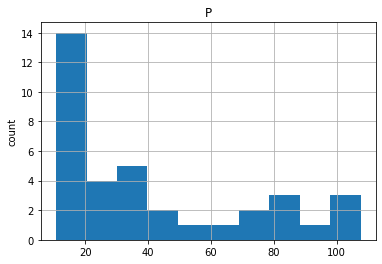

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('/content/drive/MyDrive/Colab Notebooks/sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

**Importing Stata files**

Here, you'll gain expertise in importing Stata files as `DataFrames` using the `pd.read_stata()` function from `pandas`. 
The last exercise's file, '`disarea.dta`', is still in your working directory.

  wbcode               country  disa1  disa2  ...  disa22  disa23  disa24  disa25
0    AFG           Afghanistan   0.00   0.00  ...    0.00    0.02    0.00    0.00
1    AGO                Angola   0.32   0.02  ...    0.99    0.98    0.61    0.00
2    ALB               Albania   0.00   0.00  ...    0.00    0.00    0.00    0.16
3    ARE  United Arab Emirates   0.00   0.00  ...    0.00    0.00    0.00    0.00
4    ARG             Argentina   0.00   0.24  ...    0.00    0.01    0.00    0.11

[5 rows x 27 columns]


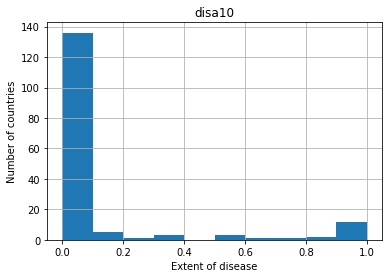

In [ ]:
# Import pandas
import pandas as pd

# Load Stata file into a pandas DataFrame: df
df = pd.read_stata('/content/drive/MyDrive/Colab Notebooks/disarea.dta')

# Print the head of the DataFrame df
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()

**Using h5py to import HDF5 files**

The file '`LIGO_data.hdf5`' is already in your working directory. In this exercise, you'll import it using the `h5py` library. You'll also print out its datatype to confirm you have imported it correctly. You'll then study the structure of the file in order to see precisely what `HDF` groups it contains.

You can find the LIGO data plus loads of documentation and tutorials here. There is also a great tutorial on Signal Processing with the data here.

In [ ]:
# Import packages
import numpy as np
import h5py

# Assign filename: file
file = '/content/drive/MyDrive/Colab Notebooks/L-L1_LOSC_4_V1-1126259446-32.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)

<class 'h5py._hl.files.File'>
meta
quality
strain


**Extracting data from your HDF5 file**

In this exercise, you'll extract some of the LIGO experiment's actual data from the HDF5 file and you'll visualize it.

To do so, you'll need to first explore the HDF5 group '`strain`'.

In [ ]:
# Extracting data from your HDF5 file
# In this exercise, you'll extract some of the LIGO experiment's actual data from the HDF5 file and you'll visualize it.
# To do so, you'll need to first explore the HDF5 group 'strain'
# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = data['strain']['Strain'].value

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

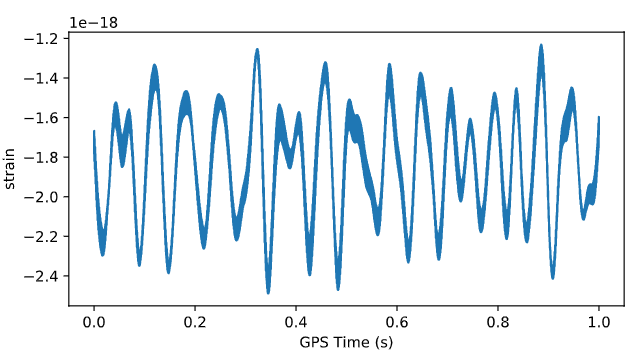

**Loading .mat files**

In this exercise, you'll figure out how to load a `MATLAB` file using scipy.io.loadmat() and you'll discover what Python datatype it yields.

The file '`albeck_gene_expression.mat`' is in your working directory. This file contains gene expression data from the Albeck Lab at UC Davis (https://www.mcb.ucdavis.edu/faculty-labs/albeck/workshop.htm). You can find the data and some great documentation (https://www.mcb.ucdavis.edu/faculty-labs/albeck/workshop.htm).

In [ ]:
# Import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/ja_data2.mat')

# Print the datatype type of mat
print(type(mat))

<class 'dict'>


dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])
<class 'numpy.ndarray'>
(200, 137)


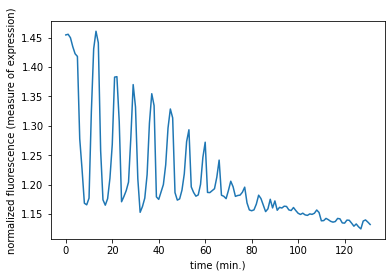

In [ ]:
# The structure of .mat in Python
# Here, you'll discover what is in the MATLAB dictionary that you loaded in the previous exercise.
# The file 'albeck_gene_expression.mat' is already loaded into the variable mat. The following libraries have already been imported as follows:
# more : https://www.mcb.ucdavis.edu/faculty-labs/albeck/workshop.htm
# Print the keys of the MATLAB dictionary
print(mat.keys())

# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(np.shape(mat['CYratioCyt']))

# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()

**Chapter 3 Working with relational databases in Python**

In [ ]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine('sqlite:////content/drive/MyDrive/Colab Notebooks/Chinook.sqlite')

What are the tables in the database?
In this exercise, you'll once again create an engine to connect to 'Chinook.sqlite'. Before you can get any data out of the database, however, you'll need to know what tables it contains!

To this end, you'll save the table names to a list using the method table_names() on the engine and then you will print the list.

In [ ]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine('sqlite:////content/drive/MyDrive/Colab Notebooks/Chinook.sqlite')

# Save the table names to a list: table_names
table_names = engine.table_names()

# Print the table names to the shell
print(table_names)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  


['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


The Hello World of SQL Queries!

Now, it's time for liftoff! In this exercise, you'll perform the Hello World of SQL queries, `SELECT`, in order to retrieve all columns of the table Album in the Chinook database. Recall that the query `SELECT` * selects all colu[link text](https://)mns.

In [ ]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:////content/drive/MyDrive/Colab Notebooks/Chinook.sqlite')

# Open engine connection: con
con = engine.connect()

# Perform query: rs
rs = con.execute('SELECT * FROM Album')

# Save results of the query to DataFrame: df
df = pd.DataFrame(rs)

# Close connection
con.close()

# Print head of DataFrame df
print(df.head())


   0                                      1  2
0  1  For Those About To Rock We Salute You  1
1  2                      Balls to the Wall  2
2  3                      Restless and Wild  2
3  4                      Let There Be Rock  1
4  5                               Big Ones  3


Customizing the Hello World of SQL Queries
Congratulations on executing your first SQL query! Now you're going to figure out how to customize your query in order to:

* Select specified columns from a table;
* Select a specified number of rows;
* Import column names from the database table.

In [ ]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute('SELECT LastName, Title FROM Employee')
    df = pd.DataFrame(rs.fetchmany(3))
    df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())


3
  LastName                Title
0    Adams      General Manager
1  Edwards        Sales Manager
2  Peacock  Sales Support Agent


**Filtering your database records using SQL's WHERE**

You can now execute a basic SQL query to select records from any table in your database and you can also perform simple query customizations to select particular columns and numbers of rows.

There are a couple more standard SQL query chops that will aid you in your journey to becoming an SQL ninja.

Let's say, for example that you wanted to get all records from the Customer table of the Chinook database for which the Country is 'Canada'. You can do this very easily in SQL using a SELECT statement followed by a WHERE clause as follows:

`[SELECT * FROM Customer WHERE Country = 'Canada']`

In fact, you can filter any SELECT statement by any condition using a WHERE clause. This is called filtering your records.

In this interactive exercise, you'll select all records of the Employee table for which 'EmployeeId' is greater than or equal to 6.

Packages are already imported as follows:

`import pandas as pd`
`from sqlalchemy import create_engin`

Query away!

In [ ]:
# Create engine: engine
engine = create_engine('sqlite:////content/drive/MyDrive/Colab Notebooks/Chinook.sqlite')

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute('SELECT * FROM employee WHERE employeeid >= 6')
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print the head of the DataFrame df
print(df.head())

   EmployeeId  LastName  ...                Fax                    Email
0           6  Mitchell  ...  +1 (403) 246-9899  michael@chinookcorp.com
1           7      King  ...  +1 (403) 456-8485   robert@chinookcorp.com
2           8  Callahan  ...  +1 (403) 467-8772    laura@chinookcorp.com

[3 rows x 15 columns]


**Ordering your SQL records with `ORDER BY`**

You can also order your SQL query results. For example, if you wanted to get all records from the `Customer` table of the Chinook database and order them in increasing order by the column `SupportRepId`, you could do so with the following query:

`"SELECT * FROM Customer ORDER BY SupportRepId"`

In fact, you can order any SELECT statement by any column.
In this interactive exercise, you'll select all records of the Employee table and order them in increasing order by the column BirthDate.

Packages are already imported as follows:

`import pandas as pd`

`from sqlalchemy import create_engine`

Get querying!

In [ ]:
# Create engine: engine
engine = create_engine('sqlite:////content/drive/MyDrive/Colab Notebooks/Chinook.sqlite')

# Open engine in context manager
with engine.connect() as con:
    rs = con.execute('SELECT * FROM employee ORDER BY birthdate')
    df = pd.DataFrame(rs.fetchall())

    # Set the DataFrame's column names
    df.columns = rs.keys()

# Print head of DataFrame
print(df.head())

   EmployeeId  LastName  ...                Fax                     Email
0           4      Park  ...  +1 (403) 263-4289  margaret@chinookcorp.com
1           2   Edwards  ...  +1 (403) 262-3322     nancy@chinookcorp.com
2           1     Adams  ...  +1 (780) 428-3457    andrew@chinookcorp.com
3           5   Johnson  ...   1 (780) 836-9543     steve@chinookcorp.com
4           8  Callahan  ...  +1 (403) 467-8772     laura@chinookcorp.com

[5 rows x 15 columns]


**Pandas and The Hello World of SQL Queries!**

Here, you'll take advantage of the power of pandas to write the results of your SQL query to a DataFrame in one swift line of Python code!

You'll first import pandas and create the SQLite `'Chinook.sqlite'` engine. Then you'll query the database to select all records from the `Album` table.

Recall that to select all records from the Orders table in the Northwind database, Hugo executed the following command:

`df = pd.read_sql_query("SELECT * FROM Orders", engine)`

In [ ]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:////content/drive/MyDrive/Colab Notebooks/Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query('SELECT * FROM album', engine)

# Print head of DataFrame
print(df.head())

# Open engine in context manager and store query result in df1
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Album")
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()

# Confirm that both methods yield the same result
print(df.equals(df1))

   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3
True


**Pandas for more complex querying**

Here, you'll become more familiar with the pandas function `read_sql_query()` by using it to execute a more complex query: a `SELECT` statement followed by both a `WHERE` clause `AND` an `ORDER BY` clause.

You'll build a DataFrame that contains the rows of the `Employee` table for which the `EmployeeId` is greater than or equal to 6 and you'll order these entries by `BirthDate`.

In [ ]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:////content/drive/MyDrive/Colab Notebooks/Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query('SELECT * FROM employee WHERE employeeid >= 6 ORDER BY birthdate', engine)

# Print head of DataFrame
print(df.head())

   EmployeeId  LastName  ...                Fax                    Email
0           8  Callahan  ...  +1 (403) 467-8772    laura@chinookcorp.com
1           7      King  ...  +1 (403) 456-8485   robert@chinookcorp.com
2           6  Mitchell  ...  +1 (403) 246-9899  michael@chinookcorp.com

[3 rows x 15 columns]


**Advanced querying: exploiting table relationships**

**The power of SQL lies in relationships between tables: INNER JOIN**

Here, you'll perform your first `INNER JOIN`! You'll be working with your favourite SQLite database, `Chinook.sqlite`. For each record in the `Album` table, you'll extract the `Title` along with the Name of the `Artist`. The latter will come from the `Artist` table and so you will need to `INNER JOIN` these two tables on the `ArtistID` column of both.

Recall that to `INNER JOIN` the `Orders` and `Customers` tables from the Northwind database, Hugo executed the following SQL query:

`"SELECT OrderID, CompanyName FROM Orders INNER JOIN Customers on Orders.CustomerID = Customers.CustomerID"`





In [ ]:
import pandas as pd
from sqlalchemy import  create_engine
engine = create_engine('sqlite:////content/drive/MyDrive/Colab Notebooks/Chinook.sqlite')

# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute('SELECT Title, Name FROM Album INNER JOIN Artist WHERE Album.ArtistID = Artist.ArtistID')
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print head of DataFrame df
print(df.head())

                                   Title       Name
0  For Those About To Rock We Salute You      AC/DC
1                      Balls to the Wall     Accept
2                      Restless and Wild     Accept
3                      Let There Be Rock      AC/DC
4                               Big Ones  Aerosmith


**Filtering your INNER JOIN**

Congrats on performing your first `INNER JOIN`! You're now going to finish this chapter with one final exercise in which you perform an `INNER JOIN` and filter the result using a `WHERE` clause.

Recall that to `INNER JOIN` the `Orders` and `Customers` tables from the Northwind database, Hugo executed the following SQL query:


`SELECT OrderID, CompanyName FROM Orders INNER JOIN Customers on Orders.CustomerID = Customers.CustomerID"`



In [ ]:
import pandas as pd
from sqlalchemy import  create_engine
engine = create_engine('sqlite:////content/drive/MyDrive/Colab Notebooks/Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query('SELECT * FROM PlaylistTrack INNER JOIN Track on PlaylistTrack.TrackId = Track.TrackId WHERE Milliseconds < 250000', engine)

# Print head of DataFrame
print(df.head())

   PlaylistId  TrackId  TrackId  ... Milliseconds    Bytes  UnitPrice
0           1     3390     3390  ...       217732  3559040       0.99
1           1     3392     3392  ...       230758  3766605       0.99
2           1     3393     3393  ...       218916  3577821       0.99
3           1     3394     3394  ...       228366  3728955       0.99
4           1     3395     3395  ...       213831  3497176       0.99

[5 rows x 11 columns]


# **Analyzing Police Activity with pandas**

**Examining the dataset**

Throughout this course, you'll be analyzing a dataset of traffic stops in Rhode Island that was collected by the [Stanford](https://openpolicing.stanford.edu/) Open Policing Project.

Before beginning your analysis, it's important that you familiarize yourself with the dataset. In this exercise, you'll read the dataset into pandas, examine the first few rows, and then count the number of missing values.

In [ ]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Police Activity/police.csv')

# Examine the head of the DataFrame
print(ri1.head())

# Count the number of missing values in each column
print(ri1.isnull().sum())

  state   stop_date stop_time  ...  stop_duration drugs_related_stop district
0    RI  2005-01-04     12:55  ...       0-15 Min              False  Zone X4
1    RI  2005-01-23     23:15  ...       0-15 Min              False  Zone K3
2    RI  2005-02-17     04:15  ...       0-15 Min              False  Zone X4
3    RI  2005-02-20     17:15  ...      16-30 Min              False  Zone X1
4    RI  2005-02-24     01:20  ...       0-15 Min              False  Zone X3

[5 rows x 15 columns]
state                     0
stop_date               496
stop_time               496
county_name           91741
driver_gender          5701
driver_race            5698
violation_raw          5698
violation              5698
search_conducted        496
search_type           88930
stop_outcome           5698
is_arrested            5698
stop_duration          5698
drugs_related_stop      496
district                496
dtype: int64


In [ ]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('https://raw.githubusercontent.com/BenceToth/dc_police-activity/master/data/police.csv')

# Examine the head of the DataFrame
print(ri.head())

# Count the number of missing values in each column
print(ri.isnull().sum())

  state   stop_date stop_time  ...  stop_duration drugs_related_stop district
0    RI  2005-01-04     12:55  ...       0-15 Min              False  Zone X4
1    RI  2005-01-23     23:15  ...       0-15 Min              False  Zone K3
2    RI  2005-02-17     04:15  ...       0-15 Min              False  Zone X4
3    RI  2005-02-20     17:15  ...      16-30 Min              False  Zone X1
4    RI  2005-02-24     01:20  ...       0-15 Min              False  Zone X3

[5 rows x 15 columns]
state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


**Dropping columns**

Often, a DataFrame will contain columns that are not useful to your analysis. Such columns should be dropped from the DataFrame, to make it easier for you to focus on the remaining columns.

In this exercise, you'll drop the `county_name` column because it only contains missing values, and you'll drop the `state` column because all of the traffic stops took place in one state (Rhode Island). Thus, these columns can be dropped because they contain no useful information. The number of missing values in each column has been printed to the console for you.

In [ ]:
county_name = ri['county_name']
county_name

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
91736   NaN
91737   NaN
91738   NaN
91739   NaN
91740   NaN
Name: county_name, Length: 91741, dtype: float64

In [ ]:
# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

(91741, 15)
(91741, 13)


**Dropping rows**

When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

During this course, the `driver_gender` column will be critical to many of your analyses. Because only a small fraction of rows are missing `driver_gender`, we'll drop those rows from the dataset.

In [ ]:
# Count all observations with non-missing and missing 'driver_gender'
print(ri.driver_gender.count())
print(ri.driver_gender.isnull().sum())

86536
5205


In [ ]:
# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
(86536, 13)


We dropped around 5,000 rows, which is a small fraction of the dataset, and now only one column remains with any missing values.

**Using proper data types**

1. Using proper data types
In the last set of exercises, you began cleaning the dataset by removing columns and rows that will not be useful for your upcoming analyses. Now, we're going to continue cleaning the dataset by ensuring that each of the columns has the proper data type.

2. Examining the data types
Let's take a look at the dtypes attribute of the DataFrame. Every Series has a data type, which was automatically inferred by pandas when it was reading in the CSV file. As you can see, the only data types currently in use are object and bool. The object data type usually means that a Series is made up of Python strings, though it can indicate the presence of other Python objects such as lists. The bool data type is short for Boolean, which means that a Series is made up of True and False values. pandas also supports other data types, such as int for integers, float for floating point values, datetime for dates and times, and category for categorical variables.

3. Why do data types matter?
But why does the data type of a pandas Series even matter? Data types matter mostly because they affect which operations you can perform on a given Series. In particular, it's beneficial not to store data as strings when possible. For example, mathematical operations can be performed on ints and floats, but those operations will fail if the numbers are stored as strings. The datetime type enables a rich set of date-based attributes and methods that are not possible with strings. The category data type results in less memory usage and faster processing than strings. And the bool data type enables logical and mathematical operations that we'll use during the course.

4. Fixing a data type
Let's see an example of how you might fix an improper data type. We'll imagine a DataFrame named apple that has a Series named price, which stores the closing price of Apple company stock each day. You can check the data type of the price Series using its dtype attribute. It reports a dtype of "O", which stands for object and means that the numbers are actually stored as strings. To change the data type of the price Series from object to float, you can use the astype() method, to which you pass the new data type as an argument. Then, you simply overwrite the original Series. If you check the data type again, you can see that it has changed to float. You might have noticed that on the right side of the equals sign, I used dot notation to refer to the price Series, rather than bracket notation. They mean the same thing, but I'll be using dot notation throughout this course, because I find that dot notation makes pandas code more readable. However, it's worth noting that you must use bracket notation on the left side of an assignment statement to create a new Series or overwrite an existing Series.

5. Let's practice!
It's now time for you to practice examining and fixing data types in our dataset.

In [ ]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

**Finding an incorrect data type**

The dtypes attribute of the `ri` DataFrame has been printed for you. Your task is to explore the `ri` DataFrame in the IPython Shell to determine which column's data type should be changed.

Ans: `is_arrested` should have a data type of `bool`

**Fixing a data type**

We saw in the previous exercise that the `is_arrested` column currently has the `object` data type. In this exercise, we'll change the data type to `bool`, which is the most suitable type for a column containing `True` and `False` values.

Fixing the data type will enable us to use mathematical operations on the `is_arrested` column that would not be possible otherwise.

In [ ]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

# Check the data type of 'is_arrested'
print(ri.is_arrested.dtype)

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype(bool)

# Check the data type of 'is_arrested' (again)
print(ri.is_arrested.dtype)

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object
object
bool


The date and time of each traffic stop are stored in separate columns, both of which are object columns.

In [ ]:
print(ri.iloc[:, 0:4].head())
print(ri.stop_date.dtype, ri.stop_time.dtype)

    stop_date stop_time driver_gender driver_race
0  2005-01-04     12:55             M       White
1  2005-01-23     23:15             M       White
2  2005-02-17     04:15             M       White
3  2005-02-20     17:15             M       White
4  2005-02-24     01:20             F       White
object object


**Combining object columns**

Currently, the date and time of each traffic stop are stored in separate object columns: `stop_date` and `stop_time`.

In this exercise, you'll combine these two columns into a single column, and then convert it to `datetime` format. This will enable convenient date-based attributes that we'll use later in the course.

In [ ]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep = ' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data type of 'stop_datetime'
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


Now we're ready to set the stop_datetime column as the index.

**Setting the index**

The last step that you'll take in this chapter is to set the `stop_datetime` column as the DataFrame's index. By replacing the default `index` with a `Datetime` `Index`, you'll make it easier to analyze the dataset by date and time, which will come in handy later in the course!

In [ ]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns ('stop_datetime' is no longer one of the columns)
print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


**Chapter 2 Exploring the relationship between gender and policing**

1. Do the genders commit different violations?
In the last chapter, we focused on preparing the traffic stops dataset for analysis. In this chapter, you'll use the dataset to explore the relationship between gender and policing, and you'll practice figuring out how to use pandas to answer specific questions.

2. Counting unique values (1)
Let's start by discussing a few methods that will help you with your analysis. The first method is value_counts(), which counts the unique values in a Series. It's best suited for a column that contains categorical rather than numerical data. For example, we can apply value_counts() to the stop_outcome column, which contains the outcome of each traffic stop. The results are displayed in descending order, so you can see that the most common outcome is a citation, also known as a ticket, and the second most common outcome is a warning.

3. Counting unique values (2)
Because value_counts() outputs a pandas Series, you can take the sum of this Series by simply adding the sum() method on the end. This is known as method chaining, a powerful technique we'll use throughout the course. The sum() of the value_counts() is actually equal to the number of rows in the DataFrame, which will be the case for any Series that has no missing values.

4. Expressing counts as proportions
Rather than examining the raw counts, you might prefer to see the stop outcomes as proportions of the total. So if you wanted to know what percentage of traffic stops ended in a citation, you would divide the number of citations by the total number of outcomes and get 0.89, or 89%. Rather than doing these calculations manually, you can instead set the normalize parameter of value_counts() to be True, and it will output proportions instead of counts. Citations are 89%, warnings are 6%, driver arrests are 3%, and so on.

5. Filtering DataFrame rows
Let's now take a look at the value_counts() for a different column, driver_race. You can see that there are five unique categories present. If you wanted to filter the DataFrame to only include drivers of a particular race, such as White, you would write that as a condition and put it inside brackets, as you've seen previously. We'll save the result in a new object. The shape of the new DataFrame is 61,870 rows, because that's the number of White drivers in the dataset, and 13 columns. You can now analyze this smaller DataFrame separately.

6. Comparing stop outcomes for two groups
For example, you could repeat the analysis of stop outcomes, but focus on White drivers only. Like before, you select the stop_outcome column and then chain the value_counts() method on the end. You could compare these results with the outcomes for another race, such as Asian, simply by changing the condition inside the brackets and then repeating the calculation. If you compare these two sets of numbers, you can see that the stop outcomes are fairly similar for these two groups.

7. Let's practice!
During the exercises, you'll practice using these techniques to answer a different question, which is whether or not drivers of different genders tend to commit different types of traffic violations.

**Examining traffic violations**

Before comparing the `violations` being committed by each gender, you should examine the `violations` committed by all drivers to get a baseline understanding of the data.

In this exercise, you'll count the unique values in the violation column, and then separately express those counts as proportions.

In [ ]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

print('-------------------------------')

# Express the counts as proportions
print(ri.violation.value_counts(normalize = True))

Speeding               48248
Moving violation       16088
Equipment              10834
Other                   4378
Registration/plates     3652
Seat belt               2840
Name: violation, dtype: int64
-------------------------------
Speeding               0.560762
Moving violation       0.186983
Equipment              0.125918
Other                  0.050883
Registration/plates    0.042445
Seat belt              0.033008
Name: violation, dtype: float64


More than half of all violations are for **speeding**, followed by other moving violations and equipment violations.

**Comparing violations by gender**

The question we're trying to answer is whether male and female drivers tend to commit different types of traffic `violations`.

In this exercise, you'll first create a DataFrame for each gender, and then analyze the `violations` in each DataFrame separately.

In [ ]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == 'F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender == 'M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize = True))


print('-------------------------------')

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize = True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
-------------------------------
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


About two-thirds of female traffic stops are for speeding, whereas stops of males are more balanced among the six categories. This doesn't mean that females speed more often than males, however, since we didn't take into account the number of stops or drivers.

**Does gender affect who gets a ticket for speeding?**

1. Does gender affect who gets a ticket for speeding?
In the last section, we compared the traffic violations committed by each gender. In this section, we'll narrow our focus to the relationship between gender and stop outcomes for one specific violation, namely speeding.

2. Filtering by multiple conditions (1)
We'll need to use one additional technique for this analysis, namely filtering a DataFrame by multiple conditions. You may remember this technique from previous courses, but we'll review it here. In the last exercise, you used a single condition, driver_gender equals F, to create a DataFrame of female drivers. It has 23,774 rows because that's the number of rows in the ri DataFrame that satisfy this condition.

3. Filtering by multiple conditions (2)
What if we wanted to create a second DataFrame of female drivers, but only those who were arrested? We simply add a second condition to the filter, namely that the is_arrested column equals True. Notice that each condition is surrounded by parentheses, and there is an ampersand between the two conditions, which represents the logical AND operator. The second DataFrame is much smaller because it only includes rows that satisfy both conditions, meaning that it only includes female drivers who were also arrested.

4. Filtering by multiple conditions (3)
When filtering a DataFrame by multiple conditions, another option is to use the vertical pipe character between the two conditions. The pipe represents the logical OR operator, which indicates that a row should be included in the DataFrame if it meets either condition. This DataFrame is larger than the last one because it includes all females regardless of whether they were arrested, as well as all drivers who were arrested, regardless of whether they are female.

5. Rules for filtering by multiple conditions
Here's a quick summary of the rules for filtering DataFrames by multiple conditions. Use the ampersand to only include rows that satisfy both conditions. Use the pipe to include rows that satisfy either condition. Each condition must be surrounded by parentheses. Conditions can check for equality, inequality, greater than, less than, and so on. And you can use more than two conditions to create a filter.

6. Correlation, not causation
In the upcoming exercises, you'll analyze the relationship between gender and stop outcome when a driver is pulled over for speeding. In other words, you're examining the data to assess whether there is a correlation between these two attributes. However, it's important to note that we're not going to draw any conclusions about causation during this course, since we don't have the data or the expertise required to do so. Instead, we're simply exploring the relationships between different attributes in the dataset.

7. Let's practice!
Let's go ahead and get started with the exercises.

**Comparing speeding outcomes by gender**

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can you find evidence of this in the dataset?

First, you'll create two DataFrames of drivers who were stopped for speeding: one containing females and the other containing males.

Then, for each gender, you'll use the `stop_outcome` column to calculate what percentage of stops resulted in a "Citation" (meaning a ticket) versus a "Warning".

In [ ]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize = True))

print('----------------------------------')

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize = True))

Citation            0.952875
Warning             0.040146
Arrest Driver       0.005186
N/D                 0.000960
Arrest Passenger    0.000448
No Action           0.000384
Name: stop_outcome, dtype: float64
----------------------------------
Citation            0.946368
Warning             0.036316
Arrest Driver       0.014159
Arrest Passenger    0.001103
No Action           0.001073
N/D                 0.000981
Name: stop_outcome, dtype: float64


The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

**Does gender affect whose vehicle is searched?**

1. Does gender affect whose vehicle is searched?
During a traffic stop, the police officer sometimes conducts a search of the vehicle. Does the driver's gender affect whether their vehicle is searched? Let's review a few pandas techniques that will help us to answer this question.

2. Math with Boolean values
Recall that you can perform mathematical operations on Boolean values. For example, you previously used the isnull() method to generate a DataFrame of True and False values, and then took the sum() to count the missing values in each column. This worked because True values were treated as ones and False values were treated as zeros. Now we'll use the NumPy library to demonstrate a different operation, namely the mean. If you take the mean() of the list 0 1 0 0 you'll get 0.25, calculated as 1 divided by 4. Similarly, if you take the mean() of the list False True False False, you'll also get 0.25. Thus, the mean of a Boolean Series represents the percentage of values that are True.

3. Taking the mean of a Boolean Series
Now, let's see a real example of why it's useful to be able to take the mean of a Boolean Series. We'll first calculate the percentage of stops that result in an arrest using the value_counts() method. The arrest rate is around 3.6% since that's the percentage of True values. Note that this would work on an object column or a Boolean column. But we can get the same result more easily by taking the mean() of the is_arrested Series. This method only works because the data type is Boolean. This is exactly why you changed the data type of this Series from object to Boolean back in the first chapter.

4. Comparing groups using groupby (1)
The second technique we'll review is groupby(), which you've used in previous courses. Let's pretend that you wanted to study the arrest rate by police district. You can see that there are six districts by using the Series method unique(). One approach we've used to compare groups is to filter the DataFrame by each group, and then perform a calculation on each subset. So to calculate the arrest rate in Zone K1, we would filter by that district, select the is_arrested column, and then take the mean(). The arrest rate is about 2.4%, which is lower than the overall arrest rate of 3.6%.

5. Comparing groups using groupby (2)
Next we calculate the arrest rate in Zone K2, which is about 3.1%. But rather than repeating this process for all six districts, we can instead group by the district column, which will perform the same calculation for all districts at once. You can see a noticeably higher arrest rate in Zone X4.

6. Grouping by multiple categories
You can also group by multiple categories at once. For example, you can group by district and gender by passing it as a list of strings. This computes the arrest rate for every combination of district and gender. In other words, you can see the arrest rate for males and females in each district separately. Note that if you reverse the ordering of the items in the list, grouping first by gender and then by district, the calculations will be the same but the presentation of the results will be different. You can use whichever option makes it easier for you to understand the results.

7. Let's practice!
Now it's time to practice using these techniques to investigate the relationship between driver gender and vehicle searches.

**Calculating the search rate**

During a traffic stop, the police officer sometimes conducts a search of the vehicle. In this exercise, you'll calculate the percentage of all stops in the `ri` DataFrame that result in a vehicle search, also known as the search rate.

In [ ]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)
print('----------------------------------')

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))
print('----------------------------------')
# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool
----------------------------------
False    0.961785
True     0.038215
Name: search_conducted, dtype: float64
----------------------------------
0.0382153092354627


It looks like the search rate is about 3.8%. Next, you'll examine whether the search rate varies by driver gender

**Comparing search rates by gender**

In this exercise, you'll compare the rates at which female and male drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about 3.8%.

First, you'll filter the DataFrame by gender and calculate the search rate for each group separately. Then, you'll perform the same calculation for both genders at once using a `.groupby()`.

In [ ]:
# Calculate the search rate for female drivers
print(ri[ri.driver_gender == 'F'].search_conducted.mean())

# Calculate the search rate for male drivers
print(ri[ri.driver_gender == 'M'].search_conducted.mean())


0.019180617481282074
0.04542557598546892


In [ ]:
# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


**Adding a second factor to the analysis**

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

You can test this hypothesis by examining the search rate for each combination of `gender` and `violation`. If the hypothesis was true, you would find that males and females are searched at about the same rate for each `violation`. Find out below if that's the case!

Male drivers are searched more than twice as often as female drivers. Why might this be?

In [ ]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender','violation']).search_conducted.mean())

print('-------------------------')

# Reverse the search rate for each combination of violation before gender
print(ri.groupby(['violation', 'driver_gender']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64
-------------------------
violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates

For all types of violations, the search rate is higher for males than for females, APPROVING our hypothesis.

**Does gender affect who is frisked during a search?**

1. Does gender affect who is frisked during a search?
In the last section, you investigated whether the gender of a driver affects the likelihood that their vehicle will be searched. In this section, we'll take a look at what happens during a search.

2. Examining the search types
As you've seen previously, the search_conducted field is True if there's a search during a traffic stop, and False otherwise. There's also a related field, search_type, that contains additional information about the search. Notice that the search_type field has 83,229 missing values, which is identical to the number of False values in the search_conducted field. That's because any time a search is not conducted, there's no information to record about a search, and thus the search_type will be missing. Note that the value_counts() method excludes missing values by default, and so we specified dropna equals False in order to see the missing values.

3. Examining the search types
There are only five possible values for search_type, which you can see at the top of the value_counts() output: Incident to Arrest, Probable Cause, Inventory, Reasonable Suspicion, and Protective Frisk. But sometimes, multiple values are relevant for a single traffic stop, in which case they're separated by commas. Let's focus on Inventory, meaning searches in which the police took an inventory of the vehicle. Looking at the third line of the value_counts() output, we see 219, which is the number of searches in which Inventory was the only search type. But what if we wanted to know the total number of times in which an inventory was done during a search? We'd also have to include any stops in which Inventory was one of multiple search types. To do this, we'll use a string method.

4. Searching for a string (1)
Back in chapter 1, you used a string method to concatenate two columns. This time, we'll use a string method called contains() that checks whether a string is present in each element of a given column. It returns True if the string is found, and False if it's not found. We also specify na equals False, which tells the contains() method to return False when it finds a missing value in the search_type column. We'll save the results in a new column called inventory.

5. Searching for a string (2)
As expected, the data type of the column is Boolean. To be clear, a True value in this column means that an inventory was done during a search, and a False value means it was not. We can take the sum() of the inventory column to see that an inventory was done during 441 searches. This includes the 219 stops in which Inventory was the only search type, plus additional stops in which Inventory was one of multiple search types.

6. Calculating the inventory rate
What if we wanted to calculate the percentage of searches which included an inventory? You might think this would be as simple as taking the mean() of the inventory column, and the answer would be about 0.5%. But what's wrong with this calculation? 0.5% is the percentage of all traffic stops which resulted in an inventory, including those stops in which a search was not even done. Instead, we first need to filter the DataFrame to only include those rows in which a search was done, and then take the mean() of the inventory column. The correct answer is that 13.3% of searches included an inventory. This is a vastly different result, and it highlights the importance of carefully choosing which rows are relevant before doing a calculation.

7. Let's practice!
Let's get started with the exercises, during which you'll use the search_type data to investigate protective frisks.

**Counting protective frisks**

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."

In this exercise, you'll first check to see how many times "Protective Frisk" was the only search type. Then, you'll use a string method to locate all instances in which the driver was frisked.

In [ ]:
# Count the 'search_type' values
print(ri.search_type.value_counts())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Probable Cause,Protective Frisk                               35
Incident to Arrest,Inventory,Probable Cause                   35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [ ]:
# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na = False)

# Check the data type of 'frisk'
print(ri.frisk.dtype)

# Take the sum of 'frisk'
print(ri.frisk.sum())

bool
303


It looks like there were 303 drivers who were frisked. Next, you'll examine **whether gender affects who is frisked**

**Comparing frisk rates by gender**

In this exercise, you'll compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the DataFrame to only include the relevant subset of data, namely stops in which a search was conducted.

In [ ]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


*The frisk rate is higher for males than for females, though we can't conclude that this difference is caused by the driver's gender.*

**Does time of day affect arrest rate?**


1. Does time of day affect arrest rate?
In the last chapter, we used filtering, grouping, and other techniques to answer questions about the traffic stops dataset. In this chapter, you'll explore and analyze the dataset visually using plots.

2. Analyzing datetime data
Back in chapter 1, we worked with a small DataFrame of Apple stock prices. We're going to use it here again, but this time it includes two days each from the first three months of 2018. There's also a new column, volume, that displays the number of Apple shares traded that day.

3. Accessing datetime attributes (1)
You might recall that we converted the date_and_time column to pandas datetime format. Because of datetime format, you actually have access to special date-based attributes via the dt accessor. For example, you can access the month as an integer by using the dt dot month attribute. There are many other similar attributes available, such as week, dayofweek, hour, minute, and so on.

4. Accessing datetime attributes (2)
Similar to our traffic stops dataset, we can set the date_and_time column as the DataFrame index. Because of its data type, it is now a DatetimeIndex. We can still access the same datetime attributes, such as month, and we get the same result as before, but we no longer have to use the dt accessor.

5. Calculating the monthly mean price
Let's examine the price column of the apple DataFrame. If we wanted to calculate the mean price for all rows, we would simply use the mean() method. But what if we wanted to calculate the mean price for each month? One idea would be to use a groupby() operation, but we can't group by month as a string since it's not a column in the DataFrame. Instead, we would group by apple dot index dot month, and then take the mean() of the price column. This operation outputs a Series, in which the index is the month number and the values are the mean prices. We'll go ahead and save this Series as an object called monthly_price.

6. Plotting the monthly mean price
Let's say that we wanted to plot this data in order to visually examine the monthly price trends. We would start by importing matplotlib dot pyplot as plt. Then, we call the plot() method on the monthly_price Series. The default plot for a Series is a line plot, which uses the Series index on the x-axis and the Series values on the y-axis. Finally, we'll label the axes and provide a title for the plot, and then use the show() function to display the plot.

7. Line plot
It's a very simple plot in this case, but you can imagine that with a much larger dataset, this plot could help you to understand the price trends in a way that examining the raw data could not.

**Calculating the hourly arrest rate**

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops in the `ri` DataFrame. Then, you'll calculate the hourly arrest rate by using the `hour` attribute of the index. The hour ranges from 0 to 23, in which:

* `0 = midnight`

* `12 = noon`

* `23 = 11 PM`



In [ ]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())
print('------')
# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.0355690117407784
------
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


**Plotting the hourly arrest rate**

In this exercise, you'll create a line plot from the `hourly_arrest_rate` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

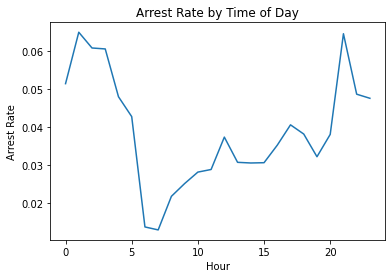

In [ ]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

***The arrest rate has a significant spike overnight, and then dips in the early morning hours***

**Are drug-related stops on the rise?**

***Plotting drug-related stops***

In a small portion of traffic stops, drugs are found in the vehicle during a search. In this exercise, you'll assess whether these drug-related stops are becoming more common over time.

The Boolean column `drugs_related_stop` indicates whether drugs were found during a given stop. You'll calculate the annual drug rate by resampling this column, and then you'll use a line plot to visualize how the rate has changed over time.

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


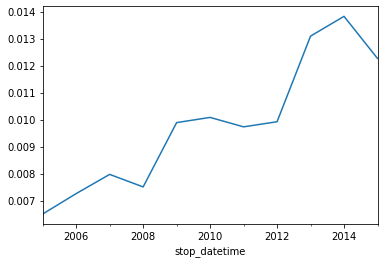

In [ ]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

The rate of drug-related stops nearly doubled over the course of 10 years. Why might that be the case?

**Comparing drug and search rates**

As you saw in the last exercise, the rate of drug-related stops increased significantly between 2005 and 2015. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

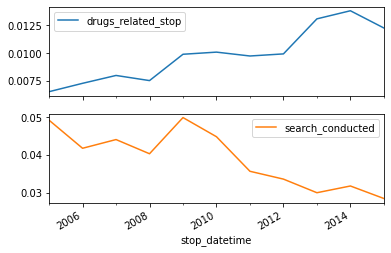

In [ ]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis = 'columns')

# Create subplots from 'annual'
annual.plot(subplots = True)

# Display the subplots
plt.show()

*The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis*

**What violations are caught in each district?**

In [ ]:
# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1' : 'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1' : 'Zone K3']

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)


violation  Equipment  Moving violation  ...  Seat belt  Speeding
district                                ...                     
Zone K1          672              1254  ...          0      5960
Zone K2         2061              2962  ...        481     10448
Zone K3         2302              2898  ...        638     12322
Zone X1          296               671  ...         74      1119
Zone X3         2049              3086  ...        820      8779
Zone X4         3541              5353  ...        843      9795

[6 rows x 6 columns]
violation  Equipment  Moving violation  ...  Seat belt  Speeding
district                                ...                     
Zone K1          672              1254  ...          0      5960
Zone K2         2061              2962  ...        481     10448
Zone K3         2302              2898  ...        638     12322

[3 rows x 6 columns]


**Plotting violations by district**

Now that you've created a frequency table focused on the "K" zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a bar plot, which is an appropriate plot type since you're comparing categorical data. Then you'll create a stacked bar plot in order to get a slightly different look at the data. Which plot do you find to be more insightful?

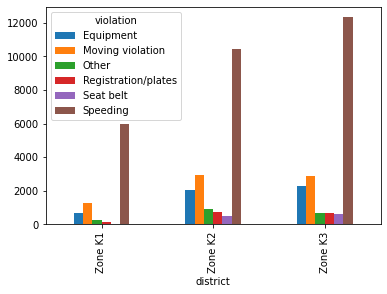

In [ ]:
# 1/2
# Create a bar plot of 'k_zones'
k_zones.plot(kind = 'bar')

# Display the plot
plt.show()


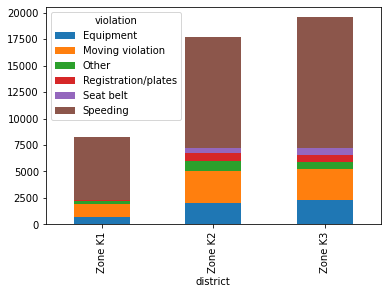

In [ ]:
# 2/2
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind = 'bar', stacked = True)

# Display the plot
plt.show()

*The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one another in terms of violations*

**How long might you be stopped for a violation?**

**Converting stop durations to numbers**

In the traffic stops dataset, the `stop_duration` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as '`0-15 Min`'. How can you make this data easier to analyze?

In this exercise, you'll convert the stop durations to integers. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

* Convert '`0-15 Min`' to 8
* Convert '`16-30 Min`' to 23
* Convert '`30+ Min`' to 45

In [ ]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min' : 8, '16-30 Min' : 23, '30+ Min' : 45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


In [ ]:
ri

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:21:00,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2,False
2015-12-31 21:59:00,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False
2015-12-31 22:04:00,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3,False


**Plotting stop length**

If you were stopped for a particular violation, how long might you expect to be detained?

In this exercise, you'll visualize the average length of time drivers are stopped for each type of `violation`. Rather than using the violation column in this exercise, you'll use `violation_raw` since it contains more detailed descriptions of the violations.

In [ ]:
violation_raw = ri['violation_raw']
violation_raw

stop_datetime
2005-01-04 12:55:00    Equipment/Inspection Violation
2005-01-23 23:15:00                          Speeding
2005-02-17 04:15:00                          Speeding
2005-02-20 17:15:00                  Call for Service
2005-02-24 01:20:00                          Speeding
                                    ...              
2015-12-31 21:21:00           Other Traffic Violation
2015-12-31 21:59:00                          Speeding
2015-12-31 22:04:00           Other Traffic Violation
2015-12-31 22:09:00    Equipment/Inspection Violation
2015-12-31 22:47:00            Registration Violation
Name: violation_raw, Length: 86536, dtype: object

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


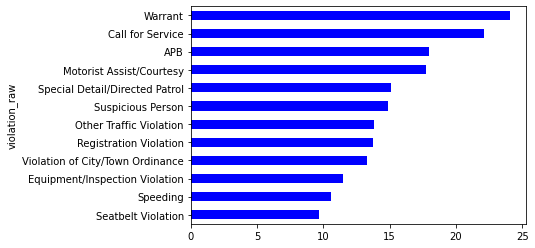

In [ ]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind = 'barh', color = 'blue')

# Display the plot
plt.show()

**Chapter 4 Analyzing the effect of weather on policing**

**Exploring the weather dataset**

1. Exploring the weather dataset
In the first three chapters, you analyzed a dataset of traffic stops from the state of Rhode Island. In this chapter, you'll be working with a new dataset to help you determine if weather conditions have an impact on police behavior.

2. Introduction to the dataset
The weather data you'll be using was collected by the National Centers for Environmental Information. Our hypothesis is that weather conditions impact police behavior during traffic stops, so ideally we would look up the historical weather at the location of each stop. However, the traffic stops dataset does not specify stop location, so we're going to use the data from a single weather station near the center of Rhode Island. This is not ideal, but Rhode Island is the smallest US state and so a single station will still give us a general idea of the weather throughout the state.

3. Examining the columns
Let's read the weather dataset into a DataFrame using read_csv(), and then look at the head. You can see that the station column lists the station ID, and there's one row for each date. There are three columns related to temperature, two columns related to wind speed, and 20 columns related to the presence of certain bad weather conditions.

4. Examining the wind speed
Before using a new dataset, it's a good practice to explore the data to check that the values seem reasonable. If you don't find anything unreasonable, then you gain increased confidence that the data is trustworthy. For example, let's take a look at the two columns related to wind speed. AWND is average wind speed in miles per hour, and WSF2 is the fastest 2-minute wind speed, meaning the fastest wind speed during any 2-minute period. We can use the describe() method on these two columns to see summary statistics including the minimum, maximum, and 25th through 75th percentiles. Notice that the minimum values are above zero, and the fastest wind speed values are greater than the average wind speed values. Also, the numbers seem reasonable given that they are measured in miles per hour. These are all simple signs that the data is trustworthy.

5. Creating a box plot
Another way to examine these values is with a box plot, by specifying kind equals box when plotting. This is essentially a visual representation of the summary statistics, in that the box represents the 25th through 75th percentiles, and the lines below and above the box represent the minimum and maximum values, excluding the outliers represented by circles. Again, our goal here is simply to validate that the data looks reasonable.

6. Creating a histogram (1)
It would also be useful to validate that the fastest wind speed values are greater than the average values for every single row. We'll do this by subtracting the average speed from the fastest speed and storing the results in a new column. We'll visualize the new column using a histogram so that we can see its distribution. There are no values below zero, which is a good sign. But because there are some extreme values, it's hard to clearly see the shape of the distribution.

7. Creating a histogram (2)
We can make the shape more clear by changing the number of histogram bins to 20. This creates more narrow bins than the default value of 10. We can now see that the difference between the fastest and average wind speed values has an approximately normal shape. Many natural phenomena have a normal distribution, and so this shape is another sign that the dataset is trustworthy.

8. Let's practice!
In the exercises, you'll explore the weather dataset further in order to verify that it's a reliable source.

In [ ]:
# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Police Activity/weather.csv')
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [ ]:
# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv('https://raw.githubusercontent.com/arfanulaziz/goodboychan.github.io/main/_notebooks/dataset/weather.csv')
weather.head()


,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


**Plotting the temperature**

In this exercise, you'll examine the temperature columns from the weather dataset to assess whether the data seems trustworthy. First you'll print the summary statistics, and then you'll visualize the data using a box plot.

When deciding whether the values seem reasonable, keep in mind that the temperature is measured in degrees Fahrenheit, not Celsius!

The interpretation of columns is as follows:

* `TAVG`, `TMIN`, `TMAX`: Temperature (Fahrenheit)
* `AWND`, `WSF2`: Wind speed (miles/hour)
* `WT01` ... `WT22`: Bad weather conditions

First, let's check the temperature columns if we stop any anomaly in the data:

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


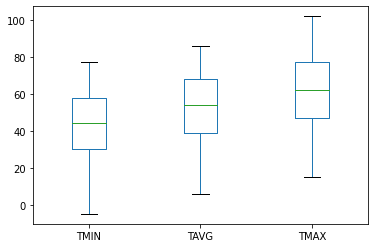

In [ ]:
# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind = 'box')

# Display the plot
plt.show()

*The temperature data looks good so far: the TAVG values are in between TMIN and TMAX, and the measurements and ranges seem reasonable.*

**Plotting the temperature difference**

In this exercise, you'll continue to assess whether the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

*What do you notice about the resulting histogram? Does it match your expectations, or do you see anything unusual?*

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


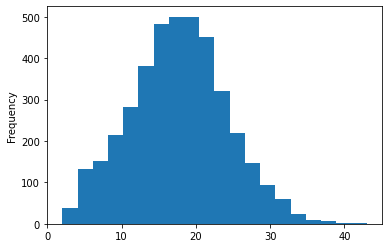

In [ ]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind = 'hist', bins = 20)

# Display the plot
plt.show()

*The TDIFF column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy*

**Categorizing the weather**

**Counting bad weather conditions**

The weather DataFrame contains 20 columns that start with '`WT`', each of which represents a bad weather condition. For example:

* `WT05` indicates "`Hail`"
* `WT11` indicates "`High or damaging winds`"
* `WT17` indicates "`Freezing rain`"

For every row in the dataset, each `WT` column contains either a 1 (meaning the condition was present that day) or `NaN` (meaning the condition was not present).

*In this exercise, you'll quantify "`how bad`" the weather was each day by counting the number of 1 values in each row.*

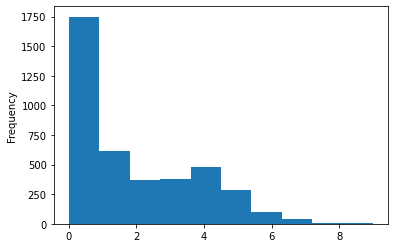

In [ ]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01' : 'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis = 'columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind = 'hist')

# Display the plot
plt.show()

*It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.*

**Rating the weather conditions**

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a rating system for the weather.

The counts range from 0 to 9, and should be converted to ratings as follows:

* Convert `0` to '`good`'
* Convert `1` through `4` to '`bad`'
* Convert `5` through `9` to '`worse`'

In [ ]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


*This rating system should make the weather condition data easier to understand*

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATION         4017 non-null   object 
 1   DATE            4017 non-null   object 
 2   TAVG            1217 non-null   float64
 3   TMIN            4017 non-null   int64  
 4   TMAX            4017 non-null   int64  
 5   AWND            4017 non-null   float64
 6   WSF2            4017 non-null   float64
 7   WT01            1767 non-null   float64
 8   WT02            221 non-null    float64
 9   WT03            224 non-null    float64
 10  WT04            117 non-null    float64
 11  WT05            360 non-null    float64
 12  WT06            25 non-null     float64
 13  WT07            79 non-null     float64
 14  WT08            404 non-null    float64
 15  WT09            69 non-null     float64
 16  WT10            2 non-null      float64
 17  WT11            1 non-null      f

**Changing the data type to category**

Since the **rating** column only has a few possible values, you'll change its data type to category in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**Read [this](https://stackoverflow.com/questions/61908745/error-astype-got-an-unexpected-keyword-argument-categories) before execute code**

In [ ]:
from pandas.api.types import CategoricalDtype

In [ ]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# Change the data type of 'rating' to category
weather['rating'] = pd.Categorical(weather['rating'], categories=cats, ordered=True)

# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


You'll use the `rating` column in future exercises to analyze the effects of weather on police behavior.

**Merging datasets**

**Preparing the DataFrames**

In this exercise, you'll prepare the traffic stop and weather rating DataFrames so that they're ready to be merged:

With the ri DataFrame, you'll move the `stop_datetime` index to a column since the index will be lost during the merge.
With the weather DataFrame, you'll select the `DATE` and `rating` columns and put them in a new DataFrame.

In [ ]:
# Reset the index of 'ri'
ri.reset_index(inplace = True)

# Examine the head of 'ri'
print(ri.head())

print('------------------------------------------------------------------------------')

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

   level_0  index       stop_datetime  ... district  frisk stop_minutes
0        0      0 2005-01-04 12:55:00  ...  Zone X4  False            8
1        1      1 2005-01-23 23:15:00  ...  Zone K3  False            8
2        2      2 2005-02-17 04:15:00  ...  Zone X4  False            8
3        3      3 2005-02-20 17:15:00  ...  Zone X1  False           23
4        4      4 2005-02-24 01:20:00  ...  Zone X3  False            8

[5 rows x 18 columns]
------------------------------------------------------------------------------
         DATE rating
0  2005-01-01    bad
1  2005-01-02    bad
2  2005-01-03    bad
3  2005-01-04    bad
4  2005-01-05    bad


*The `ri` and `weather_rating` DataFrames are now ready to be merged.*

**Merging the DataFrames**

In this exercise, you'll merge the `ri` and `weather_rating` DataFrames into a new DataFrame, `ri_weather`.

The DataFrames will be joined using the stop_date column from `ri` and the `DATE` column from `weather_rating`. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set `stop_datetime` as the index, which is the column you saved in the previous exercise.

In [ ]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(86536, 18)
(86536, 20)


*In the next section, you'll use `ri_weather` to analyze the relationship between weather conditions and police behavior.*

**Does weather affect the arrest rate?**

**Comparing arrest rates by weather rating**

Do police officers arrest drivers more often when the weather is bad? Find out below!

* First, you'll calculate the overall arrest rate.
* Then, you'll calculate the arrest rate for each of the weather ratings you previously assigned.
* Finally, you'll add violation type as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, `good < bad < worse`, they will be sorted that way in the results.

In [ ]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

print('------------------')

# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())

print('---------------------------------------')

# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation', 'rating']).is_arrested.mean())

0.0355690117407784
------------------
rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64
---------------------------------------
violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


*The arrest rate increases as the weather gets worse, and that trend persists across many of the violation types. This doesn't prove a causal link, but it's quite an interesting result!*

**Selecting from a multi-indexed Series**

The output of a single `.groupby()` operation on multiple columns is a Series with a MultiIndex. Working with this type of object is similar to working with a DataFrame:

* The outer index level is like the DataFrame rows.
* The inner index level is like the DataFrame columns.

In this exercise, you'll practice accessing data from a multi-indexed Series using the `.loc[]` accessor.

In [ ]:
# Save the output of the groupby operation
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

print('----------------------------------------------------------------------------')

# Print the arrest rate for moving violations in bad weather
print('the arrest rate for moving violations in bad weather is ', arrest_rate.loc['Moving violation', 'bad'])

print('----------------------------------------------------------------------------')

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64
----------------------------------------------------------------------------
the arrest rate for moving violations in bad weather is  0.05804964058049641
----------------------------------------------------------------

**Reshaping the arrest rate data**

In this exercise, you'll start by reshaping the `arrest_rate` Series into a DataFrame. This is a useful step when working with any multi-indexed Series, since it enables you to access the full range of DataFrame methods.

Then, you'll create the exact same DataFrame using a pivot table. This is a great example of how pandas often gives you more than one way to reach the same result!

In [ ]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack)

print('-------------------------------------------------')

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

<bound method Series.unstack of violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64>
-------------------------------------------------
rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.06


1. **Conclusion**
Throughout the course, you used your pandas knowledge to prepare and analyze a dataset from start to finish. You practiced cleaning messy data, creating visualizations, answering questions about the data, and so much more.

2. Stanford Open Policing Project
You've built a great foundation of pandas knowledge, but there's a lot more to learn. The best way to improve your skills is to practice answering questions using data. For example, you can download the traffic stop data for Rhode Island and 30 other states from the Stanford Open Policing Project's website. There are many more interesting questions you can answer using this data.

# **Exploratory Data Analysis in Python**



1. Read, clean, and validate
2. Distributions
3. Relationships 
* Use CDFs for exploration
* Use PMFs if there are a small number of unique values.
* Use KDE if there are a lot of values.

4. Multivariate Thinking

Book : [Think Stats:
Exploratory Data Analysis in Python](https://greenteapress.com/thinkstats2/thinkstats2.pdf)



In [ ]:
import h5py
filename = '/content/drive/MyDrive/Colab Notebooks/Exploratory Data Analysis in Python/nsfg.hdf5'
data = h5py.File(filename, 'r')
print(data)

<HDF5 file "nsfg.hdf5" (mode r)>


In [ ]:
import pandas as pd
nsfg = pd.read_hdf('/content/drive/MyDrive/Colab Notebooks/Exploratory Data Analysis in Python/nsfg.hdf5', 'nsfg')
print(nsfg.head())

   caseid  outcome  birthwgt_lb1  ...  agepreg  hpagelb  wgt2013_2015
0   60418        1           5.0  ...   2075.0     22.0   3554.964843
1   60418        1           4.0  ...   2358.0     25.0   3554.964843
2   60418        1           5.0  ...   3308.0     52.0   3554.964843
3   60419        6           NaN  ...      NaN      NaN   2484.535358
4   60420        1           8.0  ...   2266.0     24.0   2903.782914

[5 rows x 10 columns]


In [ ]:
import pandas as pd
nsfg = pd.read_hdf('/content/drive/MyDrive/Colab Notebooks/Exploratory Data Analysis in Python/nsfg.hdf5', 'nsfg')
print(nsfg.head())
print(nsfg.info())

   caseid  outcome  birthwgt_lb1  ...  agepreg  hpagelb  wgt2013_2015
0   60418        1           5.0  ...   2075.0     22.0   3554.964843
1   60418        1           4.0  ...   2358.0     25.0   3554.964843
2   60418        1           5.0  ...   3308.0     52.0   3554.964843
3   60419        6           NaN  ...      NaN      NaN   2484.535358
4   60420        1           8.0  ...   2266.0     24.0   2903.782914

[5 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9358 entries, 0 to 9357
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   caseid        9358 non-null   int64  
 1   outcome       9358 non-null   int64  
 2   birthwgt_lb1  6485 non-null   float64
 3   birthwgt_oz1  6391 non-null   float64
 4   prglngth      9358 non-null   int64  
 5   nbrnaliv      6485 non-null   float64
 6   agecon        9358 non-null   int64  
 7   agepreg       9109 non-null   float64
 8   hpagelb       6

**Exploring the NSFG data**

To get the number of rows and columns in a DataFrame, you can read its shape attribute.

To get the column names, you can read the columns attribute. The result is an Index, which is a Pandas data structure that is similar to a list. Let's begin exploring the `NSFG` data! It has been pre-loaded for you into a DataFrame called nsfg.

In [ ]:
# Display the number of rows and columns
nsfg.shape

# Display the names of the columns
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [ ]:
# Display the number of rows and columns
nsfg.shape

# Display the names of the columns
nsfg.columns

# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

# Print the first 5 elements of ounces
print(ounces.head())

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


**Validate a variable**

In the `NSFG` dataset, the variable '`outcome`' encodes the outcome of each pregnancy as shown below:

* value	    label:
* 1	        Live birth
* 2	        Induced abortion
* 3	        Stillbirth
* 4	        Miscarriage
* 5	        Ectopic pregnancy
* 6	        Current pregnancy

The `nsfg` DataFrame has been pre-loaded for you. Explore it in the IPython Shell and use the methods Allen showed you in the video to answer the following question: How many pregnancies in this dataset ended with a live birth?

Ans: 6489

**Clean a variable**

In the `NSFG` dataset, the variable '`nbrnaliv`' records the number of babies born alive at the end of a pregnancy.

If you use `.value_counts()` to view the responses, you'll see that the value `8` appears once, and if you consult the codebook, you'll see that this value indicates that the respondent refused to answer the question.

Your job in this exercise is to replace this value with `np.nan.` Recall from the video how Allen replaced the values `98` and `99` in the `ounces` column using the `.replace()` method:

ounces.replace([98, 99], np.nan, inplace=True)

In [ ]:
import numpy as np

# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


Excellent. If you are careful about this kind of cleaning and validation, it will save time (in the long run) and avoid potentially serious errors.

**Compute a variable**

For each pregnancy in the NSFG dataset, the variable '`agecon`' encodes the respondent's age at conception, and '`agepreg`' the respondent's age at the end of the pregnancy.

Both variables are recorded as integers with two implicit decimal places, so the value `2575` means that the respondent's age was `25.75`.

In [ ]:
# 1/3
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

In [ ]:
# 2/3
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

In [ ]:
# 3/3
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


Good job. A variable that's computed from other variables is sometimes called a 'recode'. It's now time to get back to the motivating question for this chapter: what is the average birth weight for babies in the U.S.? See you in the next video!

**Filter and visualize**

Got It!
1. Filter and Visualize
Let's get back to the motivating question for this chapter: what is the average birth weight for babies in the U.S.?

2. Histogram
In the previous lesson, we used data from the NSFG to compute birth weight in pounds and we stored the result in a Series called birth_weight. Let's see what the distribution of those values looks like. We'll use the pyplot submodule from the matplotlib visualization library, which we import as plt. Pyplot provides hist(), which takes a Series and plots a histogram; that is, it shows the values and how often they appear. However, pyplot doesn't work with NaNs, so we have to use dropna(), which makes a new Series that contains only the valid values. The second argument, bins, tells hist to divide the range of weights into 30 intervals, called "bins", and count how many values fall in each bin. hist() takes other arguments that specify the type and appearance of the histogram; you will have a chance to explore these options in the next exercise. To label the axes we'll use xlabel() and ylabel(), and finally, to display the plot, we'll use plt dot show().

3. Histogram
And here's what the results look like. The x-axis is birth weight in pounds, divided into 30 bins. The y-axis is the number of births in each bin. The distribution looks a little like a bell curve, but the tail is longer on the left than on the right; that is, there are more light babies than heavy babies. That makes sense because the distribution includes some babies that were born preterm. The most common duration for pregnancy is 39 weeks, which is "full term"; "preterm" is usually defined to be less than 37 weeks.

4. Boolean Series
To see which babies are preterm, we can use the prglngth column, which records pregnancy length in weeks. When you compare a Series to a value, the result is a Boolean Series; that is, each element is a Boolean value, True or False. In this case, it's True for each preterm baby and False otherwise. We can use head() to see the first 5 elements.

5. Boolean Series
If you compute the sum of a Boolean Series, it treats True as 1 and False as 0, so the sum is the number of Trues, which is the number of preterm babies, about 3700. If you compute the mean, you get the fraction of Trues; in this case, it's close to 0.4; that is, about 40% of the births in this dataset are preterm.

6. Filtering
We can use a Boolean Series as a filter; that is, we can select only rows that satisfy a condition or meet some criterion. For example, we can use preterm and the bracket operator to select values from birth_weight, so preterm_weight contains birth weights for preterm babies. To select full-term babies, we can use the tilde operator, which is "logical NOT" or inverse; it makes the Trues false and the Falses true. Not surprisingly, full term babies are heavier, on average, than preterm babies.

7. Filtering
If you have two Boolean Series, you can use logical operators to combine them; ampersand is the logical AND operator, and the vertical bar or pipe is logical OR.

8. Resampling
There's one more thing we have to do before we can answer our question: resampling. The NSFG is not exactly representative of the U.S. population; by design, some groups are more likely to appear in the sample than others; they are "oversampled". Oversampling helps to ensure that you have enough people in every subgroup to get reliable statistics, but it makes the analysis a little more complicated. However, we can correct for oversampling by resampling. I won't get into the details here, but I have provided a function called resample_rows_weighted() that you can use for the exercises. If you are interested in learning more about resampling, check out DataCamp's statistics courses.

9. Finish it off!
Now we have everything we need to answer the motivating question. Let's get to it.

**Make a histogram**

Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.

As we saw in a previous exercise, the `NSFG` dataset includes a variable '`agecon`' that records age at conception for each `pregnancy`. Here, you're going to plot a histogram of this variable. You'll use the `bins` parameter that you saw in the video, and also a new parameter - `histtype` - which you can read more about here in the `matplotlib` documentation. 

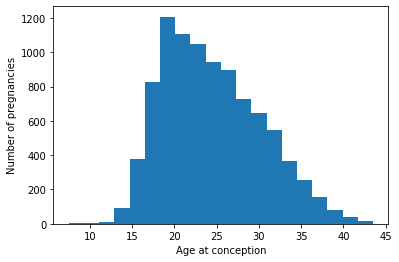

In [ ]:
# 1/2
import matplotlib.pyplot as plt

# Plot the histogram
plt.hist(agecon, bins=20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

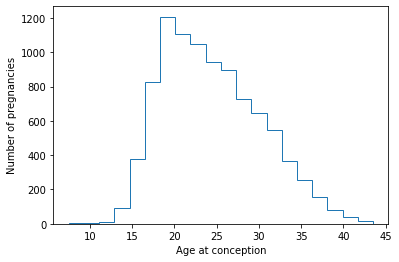

In [ ]:
# 2/2
import matplotlib.pyplot as plt
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

**Compute birth weight**

Now let's pull together the steps in this chapter to compute the average birth weight for full-term babies.

I've provided a function, `resample_rows_weighted`, that takes the `NSFG` data and resamples it using the sampling weights in `wgt2013_2015`. The result is a sample that is representative of the U.S. population.

Then I extract `birthwgt_lb1` and `birthwgt_oz1`, replace special codes with `NaN`, and compute total birth weight in pounds, `birth_weight`.

* Resample the data

`nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')`

* Clean the weight variables

`pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)`
`ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)`

* Compute total birth weight

`birth_weight = pounds + ounces/16`

In [ ]:
# 1/3
def resample_rows_weighted(df, column='wgt2013_2015'):
    """Resamples a DataFrame using probabilities proportional to given column.
    Args:
        df: DataFrame
        column: string column name to use as weights
    returns: 
        DataFrame
    """
    weights = df[column].copy()
    weights /= sum(weights)
    indices = np.random.choice(df.index, len(df), replace=True, p=weights)
    sample = df.loc[indices]
    return sample

In [ ]:
# 2/3
import numpy as np

# Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16

In [ ]:
nsfg


,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914
...,...,...,...,...,...,...,...,...,...,...
9353,70615,1,4.0,11.0,35,1.0,1758,1825.0,22.0,8117.554461
9354,70616,1,8.0,7.0,42,1.0,1741,1816.0,18.0,6842.240477
9355,70616,1,7.0,6.0,36,1.0,2091,2158.0,23.0,6842.240477
9356,70619,1,8.0,3.0,41,1.0,3450,3525.0,31.0,3856.253532


In [ ]:
# 3/3
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())


7.426961752558808


**Filter**

In the previous exercise, you computed the mean birth weight for full-term babies; you filtered out preterm babies because their distribution of weight is different.

The distribution of weight is also different for multiple births, like twins and triplets. In this exercise, you'll filter them out, too, and see what effect it has on the mean.

In [ ]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[full_term & single]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[full_term & ~single]
print('Multiple full-term mean:', mult_full_term_weight.mean())


Single full-term mean: 7.422501790830945
Multiple full-term mean: 5.57015306122449


**Chapter 2 Distributions**

**Make a PMF**

The GSS dataset has been pre-loaded for you into a DataFrame called `gss`. You can explore it in the `IPython` Shell to get familiar with it.

In this exercise, you'll focus on one variable in this dataset, '`year`', which represents the year each respondent was interviewed.

The Pmf class you saw in the video has already been created for you. You can access it outside of DataCamp via the [empiricaldist](https://pypi.org/project/empiricaldist/) library.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf, Cdf
from scipy.stats import norm

In [ ]:
import pandas as pd
gss = pd.read_hdf('/content/drive/MyDrive/Colab Notebooks/Exploratory Data Analysis in Python/gss.hdf5', 'gss')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


**Plot a PMF**

Now let's plot a PMF for the age of the respondents in the GSS dataset. The variable 'age' contains respondents' age in years.

In [ ]:
pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.6.2-py3-none-any.whl size=10737 sha256=6443dcbc3a6474d5aa13ffe59db537a63537f6966c8e951bd43ba4707347013b
  Stored in directory: /root/.cache/pip/wheels/34/22/5f/9ba9db604d08670e283b2e04551dd407f44cf889fdb9617ce5
Successfully built empiricaldist


In [ ]:
from empiricaldist import Pmf, Cdf

Text(0, 0.5, 'PMF')

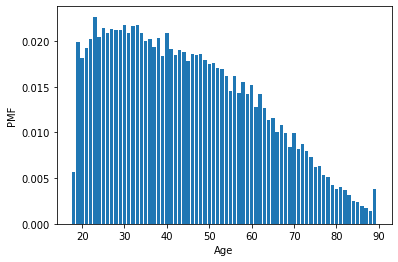

In [ ]:
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf.from_seq(age)

# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')

Nice job. You could also use `pmf_age.plot()` to plot the Pmf as a line plot.

**Make a CDF**

In this exercise, you'll make a `CDF` and use it to determine the fraction of respondents in the GSS dataset who are OLDER than 30.

The GSS dataset has been preloaded for you into a DataFrame called gss.


In [ ]:
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf.from_seq(age)

# Calculate the CDF of 30
print(cdf_age(30))
print(1 - cdf_age(30))

0.2539137136526389
0.7460862863473612


**Compute IQR**

Recall from the video that the interquartile range (IQR) is the difference between the 75th and 25th percentiles. It is a measure of variability that is robust in the presence of errors or extreme values.

In this exercise, you'll compute the interquartile range of income in the GSS dataset. Income is stored in the '`realinc`' column, and the CDF of income has already been computed and stored in `cdf_income`

In [ ]:
income = gss['realinc']

cdf_income = Cdf.from_seq(income)

In [ ]:
# Calculate the 75th percentile
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

29676.0


**Plot a CDF**

The distribution of income in almost every country is *long-tailed*; that is, there are a small number of people with very high incomes.

In the GSS dataset, the variable '`realinc`' represents total household income, converted to 1986 dollars. We can get a sense of the shape of this distribution by plotting the CDF.

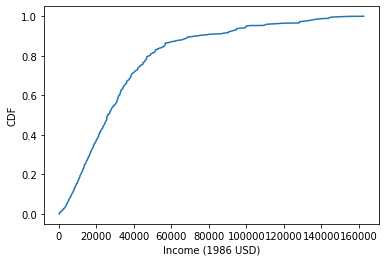

In [ ]:

# Select realinc
income = gss['realinc']

# Make the CDF
cdf_income = Cdf.from_seq(income)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

**Distribution of education**

Let's begin comparing incomes for different levels of education in the GSS dataset, which has been pre-loaded for you into a DataFrame called `gss`. The variable `educ` represents the respondent's years of education.

What fraction of respondents report that they have 12 years of education or fewer?

**Extract education levels**

Let's create Boolean Series to identify respondents with different levels of education.

In the U.S, 
* 12 years of education usually means the respondent has completed high school (secondary education)
* A respondent with 14 years of education has probably completed an associate degree (two years of college); 
* someone with 16 years has probably completed a bachelor's degree (four years of college).

In [ ]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school (12 or fewer years of education)
high = (educ <= 12)
print(high.mean())

0.5308807991547402


If you evaluate the CDF at 12, you get the fraction of respondents with 12 or fewer years of eduction.

**Plot income CDFs**

Let's now see what the distribution of income looks like for people with different education levels. You can do this by plotting the CDFs. Recall how Allen plotted the income CDFs of respondents interviewed before and after 1995:

* `Cdf(income[pre95]).plot(label='Before 1995')`
* `Cdf(income[~pre95]).plot(label='After 1995')`

You can assume that Boolean Series have been defined, as in the previous exercise, to identify respondents with different education levels: `high`, `assc`, and `bach`.

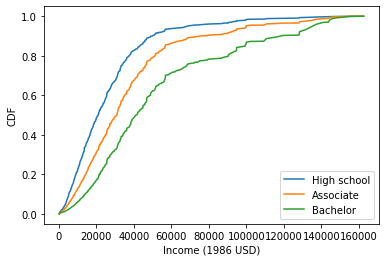

In [ ]:
income = gss['realinc']

# Plot the CDFs
Cdf.from_seq(income[high]).plot(label='High school')
Cdf.from_seq(income[assc]).plot(label='Associate')
Cdf.from_seq(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()

**Modeling distributions**

1. Modeling distributions
In the previous lesson we used PMFs and CDFs to plot and compare distributions. We saw that PMFs don't work very well when the data have a large number of unique values. In this lesson you'll learn about probability density functions, or PDFs, and learn how to estimate PDFs from data.

2. The normal distribution
Let's start with the normal distribution, also called the Gaussian distribution. It turns out that many things we measure in the world have distributions that are well approximated by a normal distribution. To get a sense of what the normal distribution looks like, I'll use the NumPy random module to generate 1000 random values from a normal distribution. And plot their CDF. This sigmoid shape is what we expect to see with values from a normal distribution.

3. The normal CDF
SciPy provides an object called norm that represents the normal distribution. I'll use np dot linspace() to create an array of equally-spaced points from -3 to 3. norm(0, 1) creates an object that represents a normal distribution with mean 0 and standard deviation 1. Dot cdf() evaluates the CDF of the normal distribution. I'll plot the results with a gray line. And then plot the CDF of the sample again.

4. Comparing CDFs
Here's the result. The CDF from the sample is pretty close to the normal CDF over the whole range. If this were real data, we would conclude that the normal distribution is a good model for the data.

5. The bell curve
The norm object also provides dot pdf(), which evaluates the probability density function, or PDF. And here's what that looks like. It's the classic bell curve. Unfortunately, if we compare this PDF to the PMF of the sample, it doesn't work very well.

6. Sample PMF
Here's what it looks like. The PMF of the sample is a flat line across the bottom. In the random sample, every value is unique, so they all have the same probability, one in 1000. However, we can use the points in the sample to estimate the PDF of the distribution they came from. This process is called kernel density estimation, or KDE. It's a way of getting from a PMF, a probability mass function, to a PDF, a probability density function.

7. KDE plot
To generate a KDE plot, we'll use the Seaborn library for data visualization, which I import as sns. Seaborn provides kdeplot, which takes the sample, estimates the PDF, and plots it. Here's what it looks like.

8. KDE and PDF
Now we can compare the KDE plot and the normal PDF. Here's the code. There's nothing there we haven't already seen. And here's the result. The KDE plot matches the normal PDF pretty well, although the differences look bigger when we compare PDFs than they did with the CDFs. On one hand, that means that the PDF is a more sensitive way to look for differences, but often it is too sensitive. It's hard to tell whether apparent differences mean anything, or if they are just random, as in this case.

9. PMF, CDF, KDE
To summarize, we've seen three ways to visualize distributions, PMFs, CDFs, and KDE. In general, I use CDFs when I am exploring data. I think they give the best view of what's going on without getting distracted by noise. The biggest drawback of CDFs is that they are less well known. If I am presenting results to an audience unfamiliar with CDFs, I'll use a PMF for distributions with a small number of unique values and KDE if there are a lot of values.

10. Let's practice!
Now let's practice what we learned in this lesson.

**Distribution of income**

In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the incomes fit a normal distribution. We'll see whether that's true for the GSS data. As a first step, you'll compute the mean and standard deviation of the log of incomes using NumPy's `np.log10()` function.

Then, you'll use the computed mean and standard deviation to make a `norm` object using the [`scipy.stats.norm()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) function.

In [ ]:
import numpy as np

# Extract realinc and compute its log
log_income = np.log10(income)

# Compute mean and standard deviation
mean = np.mean(log_income)
std = np.std(log_income)
print(mean, std)

# Make a norm object
dist = norm(mean, std)

4.371148677933652 0.4290043733010077


**Comparing CDFs**

To see whether the distribution of income is well modeled by a lognormal distribution, we'll compare the CDF of the logarithm of the data to a normal distribution with the same mean and standard deviation. These variables from the previous exercise are available for use:
* Extract realinc and compute its log
`log_income = np.log10(gss['realinc'])`

* Compute mean and standard deviation
`mean`, `std = log_income.mean()`, `log_income.std()`

* Make a norm object
`from scipy.stats import norm`
`dist = norm(mean, std)`

`dist` is a `scipy.stats.norm` object with the same mean and standard deviation as the data. It provides `.cdf()`, which evaluates the normal cumulative distribution function.

Be careful with capitalization: `Cdf()`, with an uppercase `C`, creates `Cdf` objects. `dist.cdf()`, with a lowercase c, evaluates the normal cumulative distribution function.

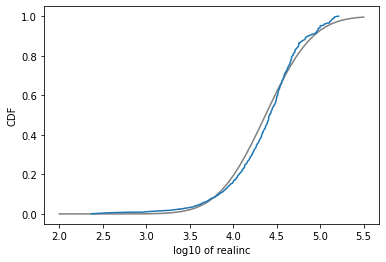

In [ ]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf.from_seq(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

**Comparing PDFs**

In the previous exercise, we used CDFs to see if the distribution of income is lognormal. We can make the same comparison using a PDF and KDE. That's what you'll do in this exercise!

As before, the `norm` object `dist` is available in your workspace:

`from scipy.stats import norm`
`dist = norm(mean, std)`
Just as all norm objects have a `.cdf()` method, they also have a `.pdf()` method.

To create a KDE plot, you can use Seaborn's [`kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) function. To learn more about this function and Seaborn, you can check out DataCamp's Data Visualization with Seaborn course. Here, Seaborn has been imported for you as `sns`.

Text(0, 0.5, 'CDF')

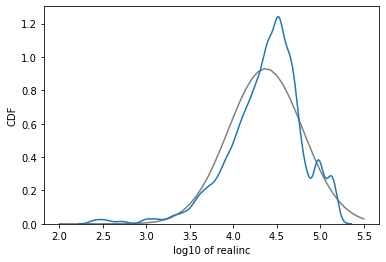

In [ ]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model CDF
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')

We've seen several ways to vizualize and compare distributions: PMFs, CDFs, and KDE plots. In the next Chapter we'll explore relationships between variables, starting with heights and weights from a large survey of adults in the U.S. See you there!

**Chapter 3 Relationships**

Up until this point, you've only looked at one variable at a time. In this chapter, you'll explore relationships between variables two at a time, using scatter plots and other visualizations to extract insights from a new dataset obtained from the Behavioral Risk Factor Surveillance Survey (BRFSS). You'll also learn how to quantify those relationships using correlation and simple regression.

**Exploring relationships**

1. Exploring relationships
So far we have only looked at one variable at a time. Now it's time to explore relationships between variables.

2. Height and weight
As a first example, we'll look at the relationship between height and weight. I'll use data from the Behavioral Risk Factor Surveillance Survey, or BRFSS, which is run by the Centers for Disease Control. The survey includes more than 400,000 respondents, but to keep things manageable, we'll use a random subsample of 100,000.

3. Scatter plot
A common way to visualize the relationship between two variables is a scatter plot. Scatter plots are common and readily understood, but they are surprisingly hard to get right. To demonstrate, I'll load the BRFSS dataset and extract the variables for height in centimeters and weight in kilograms. pyplot provides a scatter() function that makes a scatter plot, but it is more versatile than we need and slower than we want. It is faster to use plot() with the format string 'o', which plots a circle for each data point. And, as always, we have to label the axes.

4. Overplotting
Here's what it looks like. In general, it looks like taller people are heavier, but there are a few things about this scatter plot that make it hard to interpret. Most importantly, it is "overplotted", which means that there are data points piled on top of each other so you can't tell where there are a lot of points and where there is just one. When that happens, the results can be really misleading.

5. Transparency
One way to improve it is to use transparency, which we can do with the alpha parameter. The lower the value of alpha, the more transparent each data point is. Here's what it looks like with alpha=0.02. This is better, but there are so many data points, the scatter plot is still overplotted. The next step is to make the markers smaller.

6. Marker size
With markersize=1 and a low value of alpha, the scatter plot is less saturated. Here's what it looks like. Again, this is better, but now we can see that the points fall in discrete columns. That's because most heights were reported in inches and converted to centimeters. We can break up the columns by adding some random noise to the values; in effect, we are filling in the values that got rounded off.

7. Jittering
Adding random noise like this is called "jittering". In this example, I added noise with mean 0 and standard deviation 2. Here's what the plot looks like when we jitter height. The columns are gone, but now we can see that there are rows where people rounded off their weight. We can fix that by jittering weight, too.

8. More jittering
Here's the code. And here's the result. Finally, let's zoom in on the area where most of the data points are.

9. Zoom
The pyplot function axis() sets the lower and upper bounds for the x- and y-axis; in this case, we plot heights from 140 to 200 centimeters and weights up to 160 kilograms. Here's what it looks like. Finally, we have a reliable picture of the relationship between height and weight.

10. Before and after
Here's the plot we started with and the one we ended with. Clearly, they are very different, and they suggest different stories about the relationship between these variables. The point of this example is that it takes some effort to make an effective scatter plot.

11. Let's explore!
In the next lesson we'll see other ways to visualize relationships between variables, but first you'll have a chance to explore the relationship between age and weight.

In [ ]:
brfss_original = pd.read_hdf('/content/drive/MyDrive/Colab Notebooks/Exploratory Data Analysis in Python/brfss.hdf5')
print(brfss_original.head(10))
print(brfss_original.info())

        SEX   HTM4   WTKG3  INCOME2  ...  _AGEG5YR  _VEGESU1  _HTMG10   AGE
96230   2.0  160.0   60.33      8.0  ...       6.0      2.14    150.0  47.0
244920  2.0  163.0   58.97      5.0  ...      13.0      3.14    160.0  89.5
57312   2.0  163.0   72.57      8.0  ...       5.0      2.64    160.0  42.0
32573   2.0  165.0   74.84      1.0  ...       3.0      1.46    160.0  32.0
355929  2.0  170.0  108.86      3.0  ...       3.0      1.81    160.0  32.0
305424  2.0  160.0   72.57      NaN  ...      13.0      1.60    150.0  89.5
302232  1.0    NaN     NaN      NaN  ...       8.0      2.14      NaN  57.0
283720  2.0  152.0  108.86      8.0  ...       2.0      2.36    150.0  27.0
26440   1.0  178.0   68.04      2.0  ...       6.0      1.00    170.0  47.0
125041  1.0  188.0  125.65      1.0  ...       7.0      1.57    180.0  52.0

[10 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 96230 to 379327
Data columns (total 9 columns):
 #   Column    Non-Null Cou

**PMF of age**

Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. Here, you'll visualize age using a bar chart first. Recall that all PMF objects have a `.bar()` method to make a bar chart.

The BRFSS dataset includes a variable, '`AGE`' (note the capitalization!), which represents each respondent's age. To protect respondents' privacy, ages are rounded off into `5-year` bins. '`AGE`' contains the midpoint of the `bins`.

Text(0, 0.5, 'PMF')

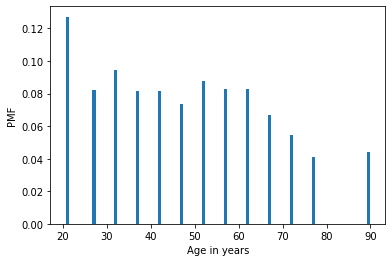

In [ ]:
# Extract age
age = Pmf.from_seq(brfss_original['AGE'])

# Plot the PMF
age.bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')

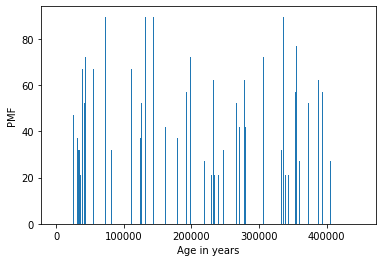

In [ ]:
# Extract age
age = brfss_original['AGE']

# Plot the PMF
Pmf(age).bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

**Note that `Pmf()` or `Cdf()` in Collabs need `.from_seq()`**

**From Scatter to smoothing with Jittering**

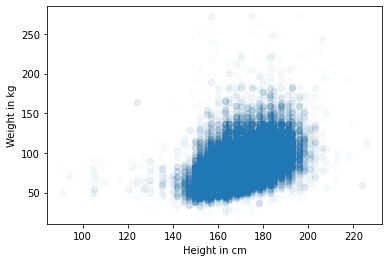

In [ ]:
height = brfss_original['HTM4']
weight = brfss_original['WTKG3']
plt.plot(height, weight, 'o', alpha=0.02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

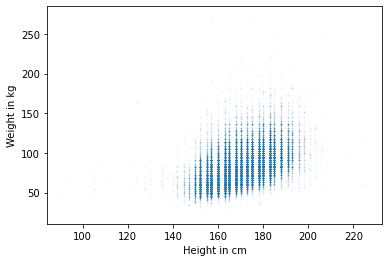

In [ ]:
height = brfss_original['HTM4']
weight = brfss_original['WTKG3']
plt.plot(height, weight, 'o', markersize=1, alpha=0.02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

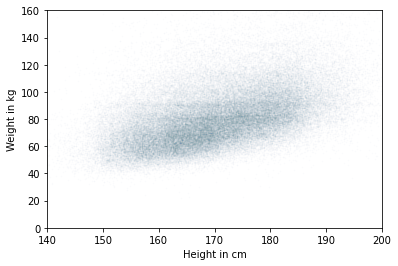

In [ ]:
height = brfss_original['HTM4']
weight = brfss_original['WTKG3']
height_jitter = height + np.random.normal(0, 2, size=len(brfss_original))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss_original))
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.01)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.axis([140, 200, 0, 160])
plt.show()

In [ ]:
subset = brfss_original.dropna(subset=['WTKG3','HTM4'])
xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs, ys)
res

LinregressResult(slope=0.9192115381848305, intercept=-75.12704250330248, rvalue=0.4742030897902462, pvalue=0.0, stderr=0.005632863769802998)

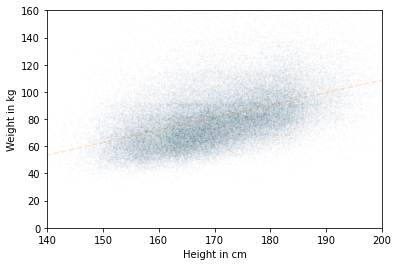

In [ ]:
height = brfss_original['HTM4']
weight = brfss_original['WTKG3']
height_jitter = height + np.random.normal(0, 2, size=len(brfss_original))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss_original))
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.01)
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy,'--', alpha=0.2)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.axis([140, 200, 0, 160])
plt.show()

**Scatter plot**

Now let's make a scatterplot of `weight` versus `age`. To make the code run faster, I've selected only the first `1000` rows from the `brfss` DataFrame.

weight and age have already been extracted for you. Your job is to use `plt.plot()` to make a scatter plot.

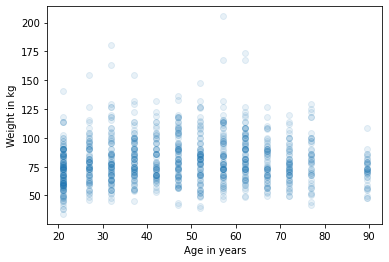

In [ ]:
# Select the first 1000 respondents
brfss = brfss_original[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

**Jittering**

In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the scatter plot will show the relationship more clearly. Recall how Allen jittered height and weight in the video:

* `height_jitter = height + np.random.normal(0, 2, size=len(brfss))`
* `weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))`

Text(0, 0.5, 'Weight in kg')

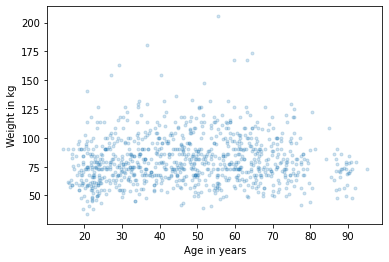

In [ ]:
# Select the first 1000 respondents
brfss = brfss_original[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', markersize=3, alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

**Visualizing relationships**

1. Visualizing relationships
In the previous lesson we used scatter plots to visualize relationships between variables, and in the exercise, you explored the relationship between age and weight. In this lesson, we'll see other ways to visualize these relationships, including boxplots and violin plots.

2. Weight and age
In the previous exercises, you made a scatter plot of weight versus age. Your code probably looked like this. And the results looked like this. It looks like older people might be heavier, but it is hard to see clearly.

3. More data
For the exercises, you worked with a small subset of the data. Now let's see what it looks like with more data. Here's the code. And here's the plot. I made a few changes in the code: * First, I reduced the marker size, because we have more data now, * Second, I jittered the weights, so the horizontal rows are not visible. * I jitter the ages, too, but less than in the exercise, so the data points are spread out, but there's still space between the columns. That makes it possible to see the shape of the distribution in each age group, and the differences between groups. If we take this idea one step farther, we can use KDE to estimate the density function in each column and plot it.

4. Violin plot
And there's a name for that; it's called a violin plot. Seaborn provides a function that makes violin plots, but before we can use it, we have to get rid of any rows with missing data. Here's how. dropna() creates a new DataFrame that contains the rows from brfss where AGE and WTKG3 are not NaN. Now we can call violinplot(). The x and y parameters mean we want AGE on the x-axis and WTKG3 on the y-axis. data is the DataFrame we just created, which contains the variables we're going to plot. The parameter inner=None simplifies the plot a little. Here's what it looks like. Each column is a graphical representation of the distribution of weight in one age group. The width of these shapes is proportional to the estimated density, so it's like two vertical PDFs plotted back to back, and filled in with nice colors. There's one other way to look at data like this, called a box plot.

5. Box plot
The code to generate a box plot is very similar. I put in the parameter whis=10 to turn off a feature we don't need. If you are curious about it, you can read the documentation or check out DataCamp's Seaborn courses. Here's what it looks like. Each box represents the interquartile range, or IQR, from the 25th to the 75th percentile. The line in the middle of each box is the median. The spines sticking out of the top and bottom show the minimum and maximum values. In my opinion, this plot gives us the best view of the relationship between weight and age. Looking at the medians, it seems like people in their 40s are the heaviest; younger and older people are lighter. Looking at the sizes of the boxes, it seems like people in their 40s have the most variability in weight, too. These plots also show how skewed the distribution of weight is; that is, the heaviest people are much farther from the median than the lightest people.

6. Log scale
For data that skews toward higher values, it is sometimes useful to look at it on a logarithmic scale. We can do that with the pyplot function yscale(). Here's what it looks like. To show the relationship between age and weight most clearly, this is probably the figure I would use.

7. Let's practice!
Now let's get some practice with violin and box plots.

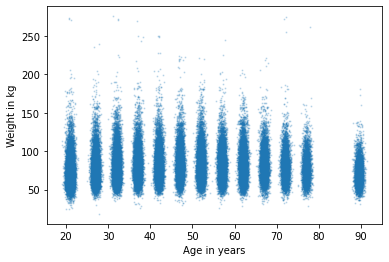

In [ ]:
age = brfss_original['AGE'] + np.random.normal(0, 0.5, size=len(brfss_original))
weight = brfss_original['WTKG3'] + np.random.normal(0, 2, size=len(brfss_original))
plt.plot(age, weight, 'o', markersize=1, alpha=0.2)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()


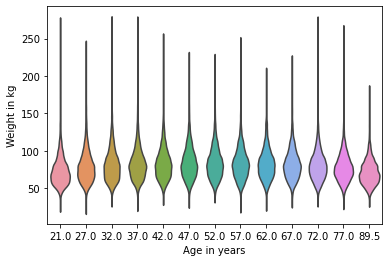

In [ ]:
data = brfss_original.dropna(subset=['AGE', 'WTKG3'])
sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()


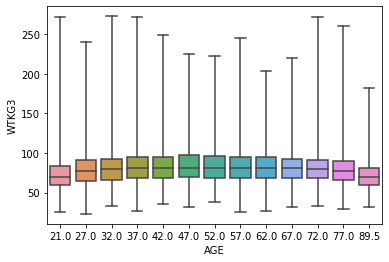

In [ ]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.show()


**Height and weight**

Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier. Now let's take a closer look using a box plot. The `brfss` DataFrame contains a variable '`_HTMG10`' that represents height in centimeters, binned into 10 cm groups.

Recall how Allen created the box plot of '`AGE`' and '`WTKG3`' in the video, with the y-axis on a logarithmic scale:

`sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)`

`plt.yscale('log')`

Text(0, 0.5, 'Weight in kg')

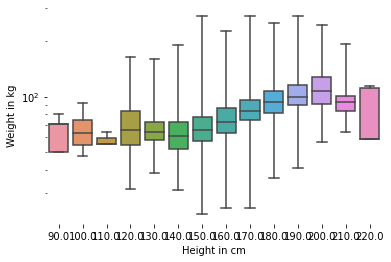

In [ ]:
# Drop rows with missing data
data = brfss_original.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')



**Distribution of income**

In the next two exercises we'll look at relationships between income and other variables. In the BRFSS, income is represented as a categorical variable; that is, respondents are assigned to one of 8 income categories. The variable name is '`INCOME2`'. Before we connect income with anything else, let's look at the distribution by computing the `PMF`. Recall that all Pmf objects have a `.bar()` method.

Text(0, 0.5, 'PMF')

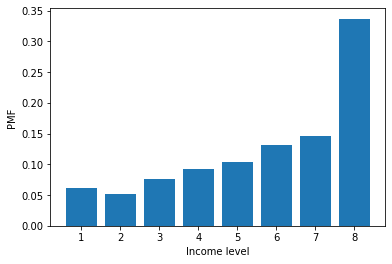

In [ ]:
# Extract income
income = brfss_original['INCOME2']

# Plot the PMF
Pmf.from_seq(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')

Almost half of the respondents are in the top income category, so this dataset doesn't distinguish between the highest incomes and the median. But maybe it can tell us something about people with incomes below the median.

**Income and height**

Let's now use a violin plot to visualize the relationship between income and height.

Text(0, 0.5, 'Height in cm')

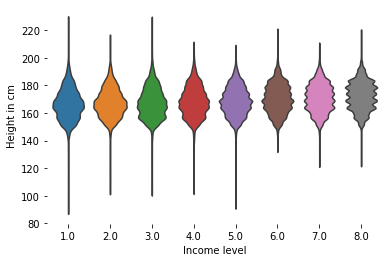

In [ ]:
# Drop rows with missing data
data = brfss_original.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x = 'INCOME2', y='HTM4', data=data, inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')

Interesting. It looks like there is a weak positive relationsip between income and height, at least for incomes below the median. In the next lesson we'll see some ways to quantify the strength of this relationship.

**Correlation**

1. Correlation
In the previous lesson, we visualized relationships between pairs of variables. In this lesson we'll learn about the coefficient of correlation, which quantifies the strength of these relationships.

2. Correlation coefficient
When people say "correlation" casually, they might mean any relationship between two variables. In statistics, it usually means Pearson's correlation coefficient, which is a number between -1 and 1 that quantifies the strength of a linear relationship between variables. To demonstrate, I'll select three columns from the BRFSS dataset, like this. The result is a DataFrame with just those columns. Now we can use the corr() method, like this.

3. Correlation matrix
The result is a "correlation matrix". Reading across the first row, the correlation of HTM4 with itself is 1. That's expected; the correlation of anything with itself is 1. The next entry is more interesting; the correlation of height and weight is about 0 point 47. It's positive, which means taller people are heavier, and it is moderate in strength, which means it has some predictive value. If you know someone's height, you can make a better guess about their weight, and vice versa. The correlation between height and age is about -0 point 09. It's negative, which means that older people tend to be shorter, but it's weak, which means that knowing someone's age would not help much if you were trying to guess their height. The correlation between age and weight is even smaller. It is tempting to conclude that there is no relationship between age and weight, but we have already seen that there is. So why is the correlation so low?

4. Weight and age
Remember that the relationship between weight and age looks like this. People in their 40s are the heaviest; younger and older people are lighter. So this relationship is nonlinear.

5. Nonlinear relationships
But correlation only works for linear relationships. If the relationship is nonlinear, correlation generally underestimates how strong it is. To demonstrate, I'll generate some fake data: xs contains equally-spaced points between -1 and 1. ys is xs squared plus some random noise. Here's the scatter plot of xs and ys. It's clear that this is a strong relationship; if you are given `x`, you can make a much better guess about y. But here's the correlation matrix; the computed correlation is close to 0. In general, if correlation is high -- that is, close to 1 or -1, you can conclude that there is a strong linear relationship. But if correlation is close to 0, that doesn't mean there is no relationship; there might be a strong, non-linear relationship. This is one of the reasons I think correlation is not such a great statistic.

6. You keep using that word
There's another reason to be careful with correlation; it doesn't mean what people take it to mean. Specifically, correlation says nothing about slope. If we say that two variables are correlated, that means we can use one to predict the other. But that might not be what we care about.

7. Strength of relationship
For example, suppose we are concerned about the health effects of weight gain, so we plot weight versus age, from 20 to 50 years old. Here are two fake datasets I generated. The one on the left has higher correlation, about 0 point 76 compared to 0 point 47. But on the left, the average weight gain over 30 years is less than 1 kg; on the right, it is almost 10 kilograms! In this scenario, the relationship on the right is probably more important, even though the correlation is lower. The statistic we really care about is the slope of the line.

8. Let's practice!
In the next lesson, you'll learn how to estimate that slope. But first, let's practice with correlation.

**Computing correlations**

The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable '`_VEGESU1`' represents the number of servings of vegetables respondents reported eating per day.

Let's see how this variable relates to age and income.

In [ ]:
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss_original[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000


**Interpreting correlations**

In the previous exercise, the correlation between income and vegetable consumption is about `0.12`. The correlation between age and vegetable consumption is about `-0.01`.

Which of the following are correct interpretations of these results:

* A: People with higher incomes eat more vegetables.
* B: The relationship between income and vegetable consumption is linear.
* C: Older people eat more vegetables.
* D: There could be a strong nonlinear relationship between age and vegetable consumption.

**Ans: A & D**

*The correlation between `income` and `vegetable consumption` is small, but it suggests that there is a relationship. But a correlation close to `0` does mean there is no relationship.*

**Simple regression**

1. Simple regression
In the previous lesson we saw that correlation does not always measure what we really want to know. In this lesson, we look at an alternative - simple linear regression.

2. Strength of relationship
Let's look again at an example from the previous lesson, a hypothetical relationship between weight and age. I generated two fake datasets to make a point: The one on the left has higher correlation, about 0 point 76 compared to 0 point 48. But in the one on the left, the average weight gain over 30 years is less than 1 kg; on the right, it is almost 10 kilograms! In this context, the statistic we probably care about is the slope of the line, not the correlation coefficient.

3. Strength of effect
To estimate the slope of the line, we can use linregress() from the SciPy stats module. The result is a LinRegressResult object that contains five values: slope is the slope of the line of best fit for the data; intercept is the intercept. For Hypothetical #1, the estimated slope is about 0.019 kilograms per year or about 0.6 kilograms over the 30-year range.

4. Strength of effect
Here are the results for Hypothetical #2. The estimated slope is about 10 times higher: about 0 point 18 kilograms per year or 6 kilograms per 30 years, What's called rvalue here is correlation, which confirms what we saw before; the first example has higher correlation, about 0 point 76 compared to 0 point 48. But the strength of the effect, as measured by the slope of the line, is about 10 times higher in the second example.

5. Regression lines
We can use the results from linregress() to compute the line of best fit: first we get the min and max of the observed xs; then we multiply by the slope and add the intercept. And plot the line. Here's what that looks like for the first example. And the same thing for the second example. The visualization here might be misleading unless you look closely at the vertical scales; the slope on the right is almost 10 times higher.

6. Height and weight
Now let's look at an example with real data. Here's the scatter plot of height and weight again, from Lesson 1.

7. Regression line
Now we can compute the regression line. linregress() can't handle NaNs, so we have to use dropna() to remove rows that are missing the data we need. Now we can compute the linear regression. And here are the results. The slope is about 0 point 9 kilograms per centimeter, which means that we expect a person one centimeter taller to be almost a kilogram heavier. That's quite a lot.

8. Line of best fit
As before, we can compute the line of best fit and plot it. And here's what that looks like. The slope of this line seems consistent with the scatter plot.

9. Linear relationships
However, linear regression has the same problem as correlation; it only measures the strength of a linear relationship. Here's the scatter plot of weight versus age, which you saw in a previous exercise. People in their 40s are the heaviest; younger and older people are lighter. So the relationship is nonlinear.

10. Nonlinear relationships
If we don't look at the scatter plot and blindly compute the regression line, here's what we get. The estimated slope is only 0 point 02 kilograms per year, or 0 point 6 kilograms in 30 years.

11. Not a good fit
And here's what the line of best fit looks like. A straight line does not capture the relationship between these variables well.

12. Let's practice!
In the next lesson, we'll learn how to use multiple regression to estimate non-linear relationships. But first, let's practice simple regression.

**Income and vegetables**

As we saw in a previous exercise, the variable '`_VEGESU1`' represents the number of vegetable servings respondents reported eating per day.

Let's estimate the slope of the relationship between vegetable consumption and income.

In [ ]:
from scipy.stats import linregress

In [ ]:
# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426)


(0.0, 6.0)

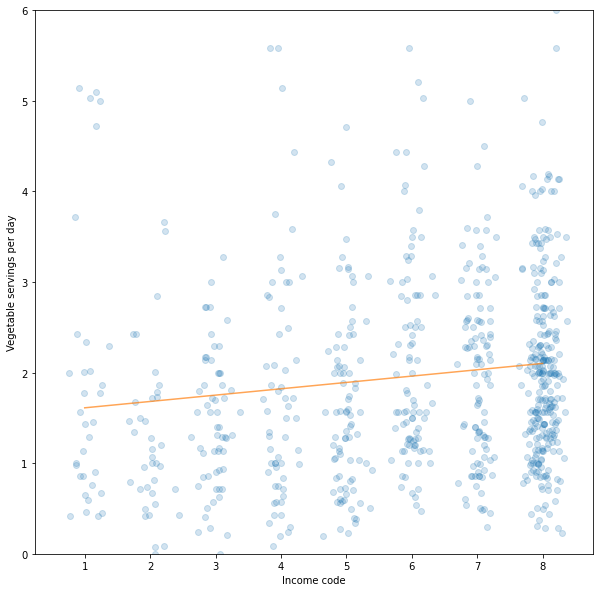

In [ ]:
plt.figure(figsize=(10, 10))
# Plot the scatter plot
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])

**Chapter 4 Multivariate Thinking**

Explore multivariate relationships using multiple regression to describe non-linear relationships and logistic regression to explain and predict binary variables.

**Limits of simple regression**

1. Limits of simple regression
In this chapter we'll get farther into regression, including multiple regression and one of my all-time favorite tools, logistic regression. But first let's understand the limits of simple regression.

2. Income and vegetables
In a previous exercise, you made a scatter plot of vegetable consumption as a function of income, and plotted a line of best fit. Here's what it looks like (note that this version includes more data than you had for the exercise). The slope of the line is 0 point 07, which means that the difference between the lowest and highest income brackets is about 0 point 49 servings per day. So that's not a very big difference.

3. Vegetables and income
But it was an arbitrary choice to plot vegetables as a function of income. We could have plotted it the other way around, like this. The slope of this line is 0 point 23, which means that the difference between 0 and 8 servings per day is about 2 income codes, roughly from code 5 to code 7. If we check the codebook, income code 5 is about $30,000 per year; income code 7 is about $65,000. So if we use vegetable consumption to predict income, we see a big difference. But when we used income to predict vegetable consumption, we saw a small difference. This example shows that regression is not symmetric; the regression of A onto B is not the same as the regression of B onto A.

4. Regression is not symmetric
We can see that more clearly by putting the two figures side by side and plotting both regression lines on both figures. They are different because they are based on different assumptions. On the left, we treat income as a known quantity and vegetable consumption as random. On the right, vegetable consumption is known and income is random. When you run a regression model, you make decisions about how to treat the data, and those decisions affect the result you get.

5. Regression is not causation
This example is meant to demonstrate another point, which is that regression doesn't tell you much about causation. If you think people with lower income can't afford vegetables, you might look at the figure on the left and conclude that it doesn't make much difference. If you think better diet increases income, the figure on the right might make you think it does. But in general, regression can't tell you what causes what. In this example, A might cause B, or B might cause A, or there might be other factors that cause both A and B. Regression alone can't tell you which way it goes.

6. Multiple regression
However, we have tools for teasing apart relationships among multiple variables; one of the most important is multiple regression. SciPy doesn't do multiple regression, so we have to switch to a new library, StatsModels. Here's the import statement. And here's how we use it. `ols` stands for "ordinary least squares", another name for regression. The first argument is a formula string that specifies that we want to regress income as a function of vegetable consumption. The second argument is the BRFSS DataFrame. The names in the formula correspond to columns in the DataFrame. The result from ols() represents the model; we have to run dot fit() to get the results. The results object contains a lot of information, but the first thing we'll look at is params, which contains the estimated slope and intercept. And we get the same results we got from SciPy, so that's good!

7. Let's practice!
In the next lesson we'll move on to multiple regression. But first, let's practice simple regression with statsmodels.

**Regression and causation**

In the BRFSS dataset, there is a strong relationship between vegetable `consumption` and `income`. The income of people who eat 8 servings of vegetables per day is double the income of people who eat none, on average.

Which of the following conclusions can we draw from this data?

* A. Eating a good diet leads to better health and higher income.

* B. People with higher income can afford a better diet.

* C. People with high income are more likely to be vegetarians.

Ans: None of them

This data is consistent with all of these conclusions, but it does not provide conclusive evidence for any of them.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf, Cdf
from scipy.stats import linregress
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
brfss_original = pd.read_hdf('/content/drive/MyDrive/Colab Notebooks/Exploratory Data Analysis in Python/brfss.hdf5', 'brfss')

**Using StatsModels**

Let's run the same regression using `SciPy` and `StatsModels`, and confirm we get the same results.

In [ ]:
# Run regression with linregress
subset = brfss_original.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data=brfss_original).fit()
print(results.params)

LinregressResult(slope=0.06988048092105019, intercept=1.5287786243363106, rvalue=0.11967005884864107, pvalue=1.378503916247615e-238, stderr=0.002110976356332332)
Intercept    1.528779
INCOME2      0.069880
dtype: float64


When you start working with a new library, checks like this help ensure that you are doing it right.

**Multiple regression**

1. Multiple regression
Now that we are using StatsModels, getting from simple to multiple regression is easy. As an example, we'll use data from the General Social Survey, which we saw in Chapter 2, and we'll explore variables that are related to income.

2. Income and education
First, we load the GSS data. Then we run a regression of real income as a function of years of education. The first argument of ols() is a formula that specifies the variables in the regression. On the left, realinc is the variable we are trying to predict; on the right, educ is the variable we are using to inform the predictions. And here are the results. The estimated slope is 3586, which means that each additional year of education is associated with an increase of almost $3600 of income. But income also depends on age, so it would be good to include that in the model, too.

3. Adding age
Here's how. On the right side of the formula, you can list as many variables as you like, in this case, we have educ and age. The plus sign indicates that we expect the contributions of the two variables to be additive, which is a common assumption for models like this. Here are the results. The estimated slope for education is 3655, a little more than in the previous model. The estimated slope for age is only about $80 per year, which is surprisingly small.

4. Income and age
To see what's going on, let's look more closely at the relationship between income and age. I'll use groupby(), which is a Pandas feature we haven't seen before, to divide the DataFrame into age groups. The result is a GroupBy object that contains one group for each value of age. The GroupBy object behaves like a DataFrame in many ways. You can use brackets to select a column, like realinc in this example, and then invoke a method like mean(). The result is a Pandas series that contains the mean income for each age group, which we can plot like this.

5. Mean income over age
Here's the result. Average income increases from age 20 to age 50, then starts to fall. And that explains why the estimated slope is so small, because the relationship is non-linear. Remember that correlation and simple regression can't measure non-linear relationships. But multiple regression can!

6. Adding a quadratic term
To describe a non-linear relationship, one option is to add a new variable that is a non-linear combination of other variables. As an example, I'll create a new variable called age2 that equals age squared. Now we can run a regression with both age and age2 on the right side. And here are the results. The slope associated with age is substantial, about $1700 per year. The slope associated with age2 is about -17, which is harder to interpret.

7. Whew!
In the next lesson, we'll see methods to visualize regression results. But first, let's practice multiple regression.

In [ ]:
gss = pd.read_hdf('/content/drive/MyDrive/Colab Notebooks/Exploratory Data Analysis in Python/gss.hdf5', 'gss')

**Plot income and education**

To get a closer look at the relationship between income and education, let's use the variable '`educ`' to group the data, then plot mean income in each group.

Here, the GSS dataset has been pre-loaded into a DataFrame called `gss`.

Text(0, 0.5, 'Income (1986 $)')

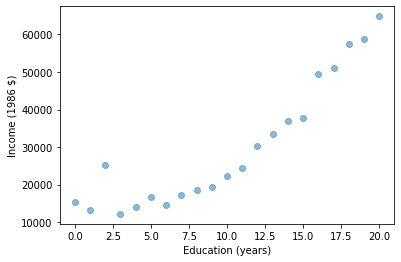

In [ ]:
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')

It looks like the relationship between income and education is non-linear.

**Non-linear model of education**

The graph in the previous exercise suggests that the relationship between income and education is non-linear. So let's try fitting a non-linear model.

In [ ]:
gss['age2'] = gss['age'] ** 2

In [ ]:
# Add a new column with educ squared
gss['educ2'] = gss['educ'] ** 2

# Run a regression model with educ, educ2, age and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


**Visualizing regression results**

Got It!
1. Visualizing regression results
In the previous lesson we ran a multiple regression model to characterize the relationship between income and age. Because the model is non-linear, the parameters are hard to interpret. In this lesson we'll see a way to interpret them visually, and to validate them against data.

2. Modeling income and age
Here's the model from the previous exercise. First, we created new variables for educ squared and age squared. Then we ran the regression model with educ, educ2, age, and age2. And here are the results. The parameters are hard to interpret. Fortunately, we don't have to -- sometimes the best way to understand a model is by looking at its predictions rather than its parameters.

3. Generating predictions
The regression results object provides a method called predict() that uses the model to generate predictions. It takes a DataFrame as a parameter and returns a Series with a prediction for each row in the DataFrame. To use it, I'll create a new DataFrame with age running from 18 to 85, and age2 set to age squared. Next, I'll pick a level for educ, like 12 years, which is the most common value. When you assign a single value to a column in a DataFrame, Pandas makes a copy for each respondent. Then we can use results to predict the average income for each age group, holding education constant.

4. Plotting predictions
The result from predict() is a Series with one prediction for each row. So we can plot it like this, with age on the x-axis and the predicted income for each age group on the y-axis. We can plot the data for comparison, like this; recall that we computed mean_income_by_age in the previous lesson. And we should label the axes, as always.

5. Comparing with data
Here are the results. The blue dots show the average income in each age group. The orange line shows the predictions generated by the model, holding education constant. This plot shows the shape of the model, a downward-facing parabola.

6. Levels of education
We can do the same thing with other levels of education, like 14 years, which is the nominal time to earn an Associate's degree, and 16 years, which is the nominal time to earn a Bachelor's degree.

7. Interpreting the results
And here are the results. The lines show mean income, as predicted by the model, as a function of age, for three levels of education. This visualization helps validate the model since we can compare the predictions with the data. And it helps us interpret the model since we can see the separate contributions of age and education.

8. Let's practice!
In the exercises, you'll have a chance to run a multiple regression, generate predictions, and visualize the results. Have fun!




**Making predictions**

At this point, we have a model that predicts income using age, education, and sex.

Let's see what it predicts for different levels of `education`, holding age constant.



In [ ]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['age'] = 30
df['educ2'] = df['educ'] ** 2
df['age2'] = df['age'] ** 2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


**Visualizing predictions**

Now let's visualize the results from the previous exercise!

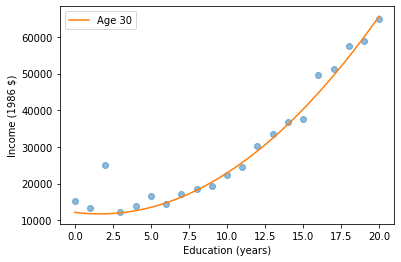

In [ ]:
# Plot mean income in each age group
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

**Logistic regression**

1. Logistic regression
Congratulations on making it this far! I have saved one of my favorite topics for the end - logistic regression.

2. Categorical variables
To understand logistic regression, we have to start with categorical variables. Most of the variables we have used so far - like income, age, and education - are numerical. But variables like sex and race are categorical; that is, each respondent belongs to one of a specified set of categories.

3. Sex and income
With StatsModels, it is easy to include a categorical variable as part of a regression model. Here's how. In the formula string, the letter C indicates that sex is a categorical variable. And here are the results. The regression treats the value sex=1, which is male, as the default, and reports the difference associated with the value sex=2, which is female. So this result indicates that income for women is about $4100 less than for men, after controlling for age and education.

4. Boolean variable
If a categorical variable has only two values, it's called a boolean variable. For example, one of the questions in the General Social Survey asks "Would you favor or oppose a law which would require a person to obtain a police permit before he or she could buy a gun?" The variable is called gunlaw, and here are the values. 1 means yes and 2 means no, so most respondents are in favor. To explore the relationship between this variable and factors like age, sex, and education, we can use logistic regression. StatsModels provides logistic regression, but to use it, we have to recode the variable so 1 means yes and 0 means no. We can do that by replacing 2 with 0. And we can check the results.

5. Logistic regression
Now we can run the regression. Instead of ols(), we use logit(), which is named for the logit function, which is related to logistic regression. Other than that, everything is the same as what we have seen before. And here are the results. The parameters are in the form of "log odds", which you may or may not be familiar with. I won't explain them in detail here, except to say that positive values are associated with things that make the outcome more likely; negative values make the outcome less likely. For example, the parameter associated with sex=2 is 0.75, which indicates that women are more likely to support this form of gun control. To see how much more likely, we can generate and plot predictions, as we did with linear regression.

6. Generating predictions
As an example, I'll generate predictions for different ages and sexes, with education held constant. First we need a DataFrame with age and educ. Then we can compute age2 and educ2. We can generate predictions for men like this. And for women like this.

7. Visualizing results
Now, to visualize the results, I start by plotting the data. As we've done before, we'll divide the respondents into age groups and compute the mean in each group. The mean of a binary variable is the fraction of people in favor. Now we can plot the predictions, for men and women, as a function of age. And label the axes.

8. Gun laws and age
Here's what it looks like. According to the model, people near age 50 are least likely to support gun control (at least as this question was posed). And women are more likely to support it than men, by almost 15 percentage points.

9. Let's practice!
Logistic regression is a powerful tool for exploring relationships between a binary variable and the factors that predict it. In the exercises, you'll explore the factors that predict support for legalizing marijuana.

**Predicting a binary variable**

Let's use logistic regression to predict a binary variable. Specifically, we'll use age, sex, and education level to predict support for legalizing cannabis (marijuana) in the U.S.

In the GSS dataset, the variable grass records the answer to the question 

*Do you think the use of marijuana should be made legal or not?*

In [ ]:
grass = gss['grass']
print(grass.describe())
print(gss.head())

count    36222.000000
mean         0.304428
std          0.460171
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: grass, dtype: float64
   year   age  cohort  sex  race  ...  gunlaw  grass  wtssall    age2  educ2
0  1972  26.0  1946.0    1     1  ...     2.0    NaN   0.8893   676.0  324.0
1  1972  38.0  1934.0    2     1  ...     1.0    NaN   0.4446  1444.0  144.0
2  1972  57.0  1915.0    1     1  ...     1.0    NaN   1.3339  3249.0  144.0
3  1972  61.0  1911.0    2     1  ...     1.0    NaN   0.8893  3721.0  196.0
4  1972  59.0  1913.0    1     1  ...     2.0    NaN   0.8893  3481.0  144.0

[5 rows x 12 columns]


Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6
Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64


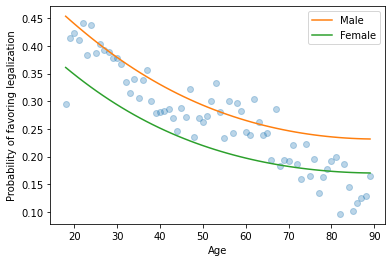

In [ ]:
# 1/4
# Recode grass, convert value 2 in sex with 0
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
print(results.params)

# 2/4
# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age'] ** 2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ'] ** 2

# 3/4
# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

# 4/4
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.3)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()

# **Intermediate Importing Data in Python**



*   Chapter 1 Importing data from the Internet
*   Chapter 2 Interacting with APIs to import data from the web
*   Chapter 3 Diving deep into the Twitter API



**Chapter 1 Importing data from the Internet**

*  **Importing flat files from the web: your turn!**

You are about to import your first file from the web! The flat file you will import will be '`winequality-red.csv`' from the University of California, Irvine's Machine Learning repository (http://archive.ics.uci.edu/ml/index.html). The flat file contains tabular data of physiochemical properties of red wine, such as pH, alcohol content and citric acid content, along with wine quality rating.

The URL of the file is

'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

After you import it, you'll check your working directory to confirm that it is there and then you'll load it into a pandas DataFrame.



In [ ]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, 'winequality-red.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


**Opening and reading flat files from the web**

You have just imported a file from the web, saved it locally and loaded it into a DataFrame. If you just wanted to load a file from the web into a DataFrame without first saving it locally, you can do that easily using pandas. In particular, you can use the function `pd.read_csv()` with the URL as the first argument and the separator sep as the second argument.

similar url as before

In [ ]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd


# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, sep=';')

# Print the head of the DataFrame
print(df.head())

# Plot first column of df
pd.DataFrame.hist(df.ix[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()

**Importing non-flat files from the web**

Congrats! You've just loaded a flat file from the web into a DataFrame without first saving it locally using the pandas function `pd.read_csv()`. This function is super cool because it has close relatives that allow you to load all types of files, not only flat ones. In this interactive exercise, you'll use `pd.read_excel()` to import an Excel spreadsheet.

The URL of the spreadsheet is

'`http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls`'

Your job is to use `pd.read_excel()` to read in all of its sheets, print the sheet names and then print the head of the first sheet using its name, not its index.

Note that the output of `pd.read_excel()` is a Python dictionary with sheet names as keys and corresponding DataFrames as corresponding values.

In [ ]:
# Import package
import pandas as pd

# Assign url of file: url
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xls
xls = pd.read_excel(url, sheet_name=None)


# Print the sheetnames to the shell
print(xls.keys())

# Print the head of the first sheet (using its name, NOT its index)
print(xls['1700'].head())



dict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


**HTTP requests to import files from the web**

Now that you know the basics behind HTTP GET requests, it's time to perform some of your own. In this interactive exercise, you will ping our very own DataCamp servers to perform a GET request to extract information from the first coding exercise of this course, "`https://campus.datacamp.com/courses/1606/4135?ex=2`".

In the next exercise, you'll extract the `HTML` itself. Right now, however, you are going to package and send the request and then catch the response.



In [ ]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "https://campus.datacamp.com/courses/1606/4135?ex=2"

# This packages the request: request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Print the datatype of response
print(type(response))

# Be polite and close the response!
response.close()

<class 'http.client.HTTPResponse'>


**Printing HTTP request results in Python using urllib**

You have just packaged and sent a GET request to "`https://campus.datacamp.com/courses/1606/4135?ex=2`" and then caught the response. You saw that such a response is a `http.client.HTTPResponse` object. The question remains: what can you do with this response?

Well, as it came from an HTML page, you could read it to extract the HTML and, in fact, such a `http.client.HTTPResponse` object has an associated `read()` method. In this exercise, you'll build on your previous great work to extract the response and print the HTML.

In [ ]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "https://campus.datacamp.com/courses/1606/4135?ex=2"

# This packages the request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Extract the response: html
html = response.read()

# Print the html
print(html)

# Be polite and close the response!
response.close()

b'<!doctype html><html lang="en"><head><link rel="apple-touch-icon-precomposed" sizes="57x57" href="/apple-touch-icon-57x57.png"><link rel="apple-touch-icon-precomposed" sizes="114x114" href="/apple-touch-icon-114x114.png"><link rel="apple-touch-icon-precomposed" sizes="72x72" href="/apple-touch-icon-72x72.png"><link rel="apple-touch-icon-precomposed" sizes="144x144" href="/apple-touch-icon-144x144.png"><link rel="apple-touch-icon-precomposed" sizes="60x60" href="/apple-touch-icon-60x60.png"><link rel="apple-touch-icon-precomposed" sizes="120x120" href="/apple-touch-icon-120x120.png"><link rel="apple-touch-icon-precomposed" sizes="76x76" href="/apple-touch-icon-76x76.png"><link rel="apple-touch-icon-precomposed" sizes="152x152" href="/apple-touch-icon-152x152.png"><link rel="icon" type="image/png" href="/favicon.ico"><link rel="icon" type="image/png" href="/favicon-196x196.png" sizes="196x196"><link rel="icon" type="image/png" href="/favicon-96x96.png" sizes="96x96"><link rel="icon" ty

**Performing HTTP requests in Python using requests**

Now that you've got your head and hands around making HTTP requests using the urllib package, you're going to figure out how to do the same using the higher-level requests library. You'll once again be pinging DataCamp servers for their "`http://www.datacamp.com/teach/documentation`" page.

Note that unlike in the previous exercises using urllib, you don't have to close the connection when using requests!

In [ ]:
# Import package
import requests

# Specify the url: url
url = "http://www.datacamp.com/teach/documentation"

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response: text
text = r.text

# Print the html
print(text)

<!DOCTYPE HTML>
<html lang="en-US">
<head>
  <meta charset="UTF-8" />
  <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
  <meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1" />
  <meta name="robots" content="noindex, nofollow" />
  <meta name="viewport" content="width=device-width,initial-scale=1" />
  <title>Just a moment...</title>
  <style type="text/css">
    html, body {width: 100%; height: 100%; margin: 0; padding: 0;}
    body {background-color: #ffffff; color: #000000; font-family:-apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", Roboto, Oxygen, Ubuntu, "Helvetica Neue",Arial, sans-serif; font-size: 16px; line-height: 1.7em;-webkit-font-smoothing: antialiased;}
    h1 { text-align: center; font-weight:700; margin: 16px 0; font-size: 32px; color:#000000; line-height: 1.25;}
    p {font-size: 20px; font-weight: 400; margin: 8px 0;}
    p, .attribution, {text-align: center;}
    #spinner {margin: 0 auto 30px auto; display: block;}
    .attri

**Parsing HTML with BeautifulSoup**

In this interactive exercise, you'll learn how to use the BeautifulSoup package to parse, prettify and extract information from HTML. You'll scrape the data from the webpage of Guido van Rossum, Python's very own Benevolent Dictator for Life. In the following exercises, you'll prettify the HTML and then extract the text and the hyperlinks.

The URL of interest is url = 'https://www.python.org/~guido/'

In [ ]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <!-- Built from main -->
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
   <a href="pics.html">
    <img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/>
   </a>
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
  </p>
  <h3>
   <a href="images/df20000406.jpg">
    Who I Am
   </a>
  </h3>
  <p>
   Read
my
   <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
    "King's
Day Speech"
   </a>
   for some inspiration.
  </p>
  <p>
   I am the author of the
   <a href="http://www.python.org">
    Python
   </a>
   programming language.  See also my
   <a href="Resume.html">
    resume
   </a>
   and my
   <a href="Public

**Turning a webpage into data using BeautifulSoup: getting the text**

As promised, in the following exercises, you'll learn the basics of extracting information from HTML soup. In this exercise, you'll figure out how to extract the text from the BDFL's webpage, along with printing the webpage's title.

In [ ]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Get the title of Guido's webpage: guido_title
guido_title = soup.title

# Print the title of Guido's webpage to the shell
print(guido_title)

# Get Guido's text: guido_text
guido_text = soup.get_text()

# Print Guido's text to the shell
print(guido_text)

<title>Guido's Personal Home Page</title>


Guido's Personal Home Page





Guido van Rossum - Personal Home Page


"Gawky and proud of it."
Who I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.

I am retired, working on personal projects (and maybe a book).
I have worked for Dropbox, Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but I receive too much email to respond
to everything.

My Name
My name often poses difficulties for Americans.

Pronunciation: in Dutch, the "G" in Guido is a hard G,
pronounced roughly like the "ch" in Sc

**Turning a webpage into data using BeautifulSoup: getting the hyperlinks**

In this exercise, you'll figure out how to extract the URLs of the hyperlinks from the BDFL's webpage. In the process, you'll become close friends with the soup method `find_all()`.

In [ ]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Print the title of Guido's webpage
print(soup.title)

# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all('a')

# Print the URLs to the shell
for link in a_tags:
    print(link.get('href'))

<title>Guido's Personal Home Page</title>
pics.html
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
images/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
Resume.html
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


**Loading and exploring a JSON**

Now that you know what a JSON is, you'll load one into your Python environment and explore it yourself. Here, you'll load the JSON '`a_movie.json`' into the variable `json_data`, which will be a dictionary. You'll then explore the `JSON` contents by printing the key-value pairs of `json_data` to the shell.

In [ ]:
# Load JSON: json_data
with open("a_movie.json") as json_file:
    json_data = json.load(json_file)

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

<script.py> output:
    Title:  The Social Network
    Year:  2010
    Rated:  PG-13
    Released:  01 Oct 2010
    Runtime:  120 min
    Genre:  Biography, Drama
    Director:  David Fincher
    Writer:  Aaron Sorkin, Ben Mezrich
    Actors:  Jesse Eisenberg, Andrew Garfield, Justin Timberlake
    Plot:  As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.
    Language:  English, French
    Country:  United States
    Awards:  Won 3 Oscars. 172 wins & 186 nominations total
    Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
    Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
    Metascore:  95
    imdbRating:  7.7
    imdbVotes:  660,629
    imdbID:  tt1285016
    Type:  movie
    DVD:  11 Jan 2011
    BoxOffice:  $96,962,694
    Production:  N/A
    Website:  N/A
    Response:  True

**API requests**

Now it's your turn to pull some movie data down from the Open Movie Database (OMDB) using their API. The movie you'll query the API about is The Social Network. Recall that, in the video, to query the API about the movie Hackers, Hugo's query string was '`http://www.omdbapi.com/?t=hackers`' and had a single argument t=hackers.

Note: recently, OMDB has changed their API: you now also have to specify an API key. This means you'll have to add another argument to the URL: `apikey=72bc447a`.

In [ ]:
# Import requests package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Print the text of the response
print(r.text)

{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin, Ben Mezrich","Actors":"Jesse Eisenberg, Andrew Garfield, Justin Timberlake","Plot":"As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"United States","Awards":"Won 3 Oscars. 172 wins & 186 nominations total","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.7/10"},{"Source":"Rotten Tomatoes","Value":"96%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.7","imdbVotes":"660,629","imdbID":"tt1285016","Type":"movie","DV

**JSON–from the web to Python**

Wow, congrats! You've just queried your first API programmatically in Python and printed the text of the response to the shell. However, as you know, your response is actually a JSON, so you can do one step better and decode the JSON. You can then print the key-value pairs of the resulting dictionary. That's what you're going to do now!

In [ ]:
# Import package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin, Ben Mezrich
Actors:  Jesse Eisenberg, Andrew Garfield, Justin Timberlake
Plot:  As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  United States
Awards:  Won 3 Oscars. 172 wins & 186 nominations total
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.7
imdbVotes:  660,629
imdbID:  tt1285016
Type:  movie
DVD:  11 Jan 2011
BoxOffice:  $

**Checking out the Wikipedia API**

You're doing so well and having so much fun that we're going to throw one more API at you: the Wikipedia API (documented here). You'll figure out how to find and extract information from the Wikipedia page for Pizza. What gets a bit wild here is that your query will return nested JSONs, that is, JSONs with JSONs, but Python can handle that because it will translate them into dictionaries within dictionaries.

The URL that requests the relevant query from the Wikipedia API is

`https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza`

In [ ]:
# Import package
import requests

# Assign URL to variable: url
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)

<link rel="mw-deduplicated-inline-style" href="mw-data:TemplateStyles:r1033289096">
<p class="mw-empty-elt">
</p>
<p><b>Pizza</b> (<small>Italian: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsa]</span>, <small>Neapolitan: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsə]</span>) is a dish of  Italian origin consisting of a usually round, flat base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (such as anchovies, mushrooms, onions, olives, pineapple, meat, etc.), which is then baked at a high temperature, traditionally in a wood-fired oven. A small pizza is sometimes called a pizzetta. A person who makes pizza is known as a <b>pizzaiolo</b>.
</p><p>In Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced, and is eaten with the use of a knife and fork. In casual settings, however, it is cut into wedges to be eaten while h

**Diving deep into the Twitter API**

**API Authentication**

The package tweepy is great at handling all the Twitter API OAuth Authentication details for you. All you need to do is pass it your authentication credentials. In this interactive exercise, we have created some mock authentication credentials (if you wanted to replicate this at home, you would need to create a Twitter App as Hugo detailed in the video). Your task is to pass these credentials to tweepy's OAuth handler.

In [ ]:
# Import package
import tweepy

# Store OAuth authentication credentials in relevant variables
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

**Streaming tweets**

Now that you have set up your authentication credentials, it is time to stream some tweets! We have already defined the tweet stream listener class, `MyStreamListener`, just as Hugo did in the introductory video. You can find the code for the tweet stream listener class here https://gist.github.com/hugobowne/18f1c0c0709ed1a52dc5bcd462ac69f4.

Your task is to create the Streamobject and to filter tweets according to particular keywords.

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

In [ ]:
# Initialize Stream listener
l = MyStreamListener()

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)

# Filter Twitter Streams to capture data by the keywords:
stream.filter(['clinton','trump','sanders','cruz'])

**Load and explore your Twitter data**

Now that you've got your Twitter data sitting locally in a text file, it's time to explore it! This is what you'll do in the next few interactive exercises. In this exercise, you'll read the Twitter data into a list: tweets_data.

*Be aware that this is real data from Twitter and as such there is always a risk that it may contain profanity or other offensive content (in this exercise, and any following exercises that also use real Twitter data).*

In [ ]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = '/content/drive/MyDrive/Colab Notebooks/tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[5].keys())

dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


**Twitter data to DataFrame**

Now you have the Twitter data in a list of dictionaries, tweets_data, where each dictionary corresponds to a single tweet. Next, you're going to extract the text and language of each tweet. The text in a tweet, t1, is stored as the value `t1['text']`; similarly, the language is stored in `t1['lang']`. Your task is to build a DataFrame in which each row is a tweet and the columns are '`text`' and '`lang`'.

In [ ]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame
print(df.head(10))



                                                text lang
0  RT @bpolitics: .@krollbondrating's Christopher...   en
1  RT @HeidiAlpine: @dmartosko Cruz video found.....   en
2  Njihuni me Zonjën Trump !!! | Ekskluzive https...   et
3  Your an idiot she shouldn't have tried to grab...   en
4  RT @AlanLohner: The anti-American D.C. elites ...   en
5  RT @BIackPplTweets: Young Donald trump meets h...   en
6  RT @trumpresearch: @WaitingInBagdad @thehill T...   en
7  RT @HouseCracka: 29,000+ PEOPLE WATCHING TRUMP...   en
8  RT @urfavandtrump: RT for Brendon Urie\nFav fo...   en
9  RT @trapgrampa: This is how I see #Trump every...   en


**A little bit of Twitter text analysis**

Now that you have your DataFrame of tweets set up, you're going to do a bit of text analysis to count how many tweets contain the words 'clinton', 'trump', 'sanders' and 'cruz'. In the pre-exercise code, we have defined the following function word_in_text(), which will tell you whether the first argument (a word) occurs within the 2nd argument (a tweet).

`import re`

`def word_in_text(word, text):`

    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
       return True
    return False


You're going to iterate over the rows of the DataFrame and calculate how many tweets contain each of our keywords! The list of objects for each candidate has been initialized to 0.

In [ ]:
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [ ]:
# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])

**Plotting your Twitter data**

Now that you have the number of tweets that each candidate was mentioned in, you can plot a bar chart of this data. You'll use the statistical data visualization library [seaborn](http://seaborn.pydata.org/), which you may not have seen before, but we'll guide you through. You'll first import `seaborn` as `sns`. You'll then construct a barplot of the data using `sns.barplot`, passing it two arguments:

1.   a list of labels and
2.   a list containing the variables you wish to plot (clinton, trump and so on.)

Hopefully, you'll see that Trump was unreasonably represented! We have already run the previous exercise solutions in your environment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


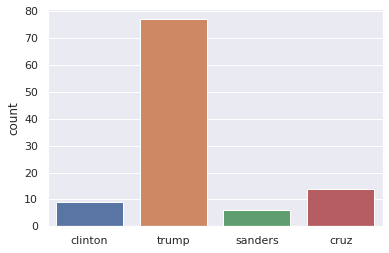

In [ ]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot the bar chart
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()

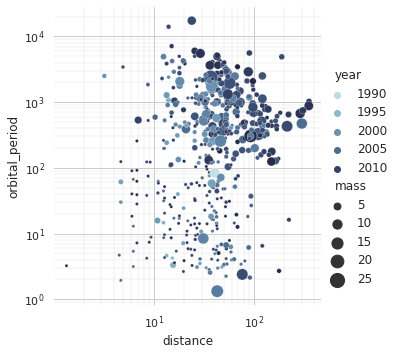

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example planets dataset
planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=planets,
    x="distance", y="orbital_period",
    hue="year", size="mass",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

**Linear regression with marginal distributions**

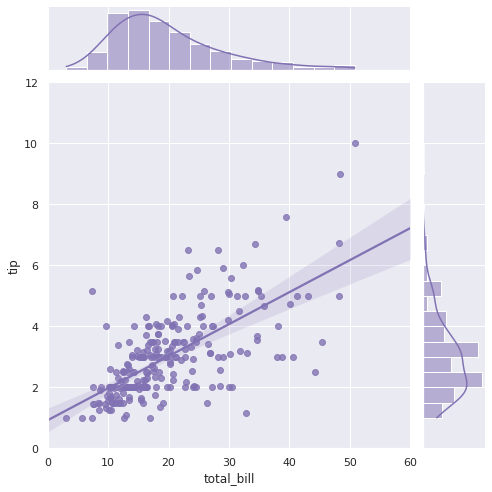

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

**Horizontal boxplot with observations**

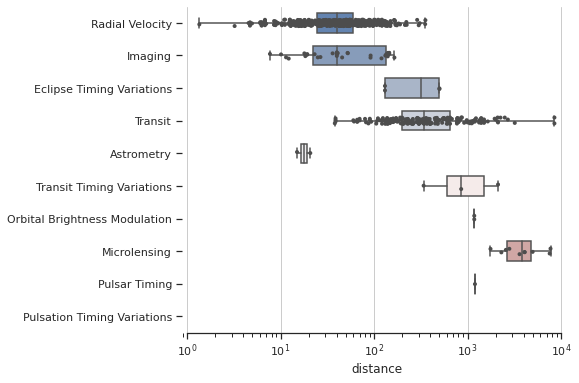

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="distance", y="method", data=planets,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

# **Cleaning Data in Python**

**Numeric data or ... ?**

In this exercise, and throughout this chapter, you'll be working with bicycle ride sharing data in San Francisco called `ride_sharing`. It contains information on the start and end stations, the trip duration, and some user information for a bike sharing service.

The `user_type` column contains information on whether a user is taking a free ride and takes on the following values:

* 1 for free riders.
* 2 for pay per ride.
* 3 for monthly subscribers.

In this instance, you will print the information of ride_sharing using `.info()` and see a firsthand example of how an incorrect data type can flaw your analysis of the dataset. The pandas package is

In [ ]:
# 1/3
import pandas as pd
ride_sharing = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cleaning Data in Python/ride_sharing_new.csv')
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


**Question**

By looking at the summary statistics - they don't really seem to offer much description on how users are distributed along their purchase type, why do you think that is?

The `user_type` column has an finite set of possible values that represent groupings of data, it should be converted to `category`.

In [ ]:
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64
count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dty

**Summing strings and concatenating numbers**

In the previous exercise, you were able to identify that category is the correct data type for `user_type` and convert it in order to extract relevant statistical summaries that shed light on the distribution of `user_type`.

Another common data type problem is importing what should be numerical values as `strings`, as mathematical operations such as summing and multiplication lead to string concatenation, not `numerical` outputs.

In this exercise, you'll be converting the string column duration to the type `int`. Before that however, you will need to make sure to strip "`minutes`" from the column in order to make sure `pandas` reads it as `numerical`. The `pandas` package has been imported as `pd`.

In [ ]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056


Great work! 11 minutes is really not bad for an average ride duration in a city like San-Francisco. In the next lesson, you're going to jump right ahead into sanity checking the range of values in your data.

In [ ]:
import pandas as pd
ride_sharing = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cleaning Data in Python/ride_sharing_new.csv')
ride_sharing

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male
...,...,...,...,...,...,...,...,...,...,...
25755,25755,11 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5063,1,2000,Male
25756,25756,10 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5411,2,1998,Male
25757,25757,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),5157,2,1995,Male
25758,25758,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),4438,2,1995,Male


**Tire size constraints**

In this lesson, you're going to build on top of the work you've been doing with the `ride_sharing` DataFrame. You'll be working with the `tire_sizes` column which contains data on each bike's tire size.

Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″.

In this exercise, you will make sure the `tire_sizes` column has the correct range by first converting it to an integer, then setting and testing the new upper limit of 27″ for tire sizes.

Meanwhile Data dari DataCamp ada Tire_Sizes nya jadi gak bisa load excersice berikutnya

In [ ]:
duration  station_A_id                                     station_A_name  station_B_id                                          station_B_name  bike_id   user_type   user_birth_year   user_gender    tire_sizes
0      12 minutes            81                                 Berry St at 4th St           323                             Broadway at Kearny     5480  Subscriber             1959        Male       27.0
1      24 minutes             3       Powell St BART Station (Market St at 4th St)           118                Eureka Valley Recreation Center     5193  Subscriber             1965        Male       26.0
2       8 minutes            67  San Francisco Caltrain Station 2  (Townsend St...            23                  The Embarcadero at Steuart St     3652  Subscriber             1993        Male       26.0
3       4 minutes            16                            Steuart St at Market St            28                   The Embarcadero at Bryant St     1883  Subscriber             1979        Male       29.0
4      11 minutes            22                              Howard St at Beale St           350                           8th St at Brannan St     4626  Subscriber             1994        Male       27.0
...           ...           ...                                                ...           ...                                            ...      ...         ...              ...         ...        ...
25755  11 minutes            15  San Francisco Ferry Building (Harry Bridges Pl...            34                 Father Alfred E Boeddeker Park     5063  Subscriber             2000        Male       29.0
25756  10 minutes            15  San Francisco Ferry Building (Harry Bridges Pl...            34                 Father Alfred E Boeddeker Park     5411  Subscriber             1998        Male       26.0
25757  14 minutes            15  San Francisco Ferry Building (Harry Bridges Pl...            42  San Francisco City Hall (Polk St at Grove St)     5157    Customer             1995        Male       29.0
25758  14 minutes            15  San Francisco Ferry Building (Harry Bridges Pl...            42  San Francisco City Hall (Polk St at Grove St)     4438    Customer             1995        Male       26.0
25759  29 minutes            16                            Steuart St at Market St           115                             Jackson Playground     1705    Customer             1990        Male       27.0

[25760 rows x 10 columns]

In [ ]:
# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].head())

<script.py> output:
    0    27
    1    26
    2    26
    3    27
    4    27
    Name: tire_sizes, dtype: category
    Categories (2, int64): [26, 27]

**Back to the future**

A new update to the data pipeline feeding into the ride_sharing DataFrame has been updated to register each ride's date. This information is stored in the `ride_date` column of the type object, which represents strings in pandas.

A bug was discovered which was relaying rides taken today as taken next year. To fix this, you will find all instances of the `ride_date` column that occur anytime in the future, and set the maximum possible value of this column to today's date. Before doing so, you would need to convert `ride_date` to a `datetime` object.

The `datetime` package has been imported as `dt`, alongside all the packages you've been using till now.

In [ ]:
 duration  station_A_id                                     station_A_name  station_B_id                                 station_B_name  bike_id   user_type  user_birth_year user_gender tire_sizes   ride_date
0      12 minutes            81                                 Berry St at 4th St           323                             Broadway at Kearny     5480  Subscriber             1959        Male       27.0  2020-01-19
1      24 minutes             3       Powell St BART Station (Market St at 4th St)           118                Eureka Valley Recreation Center     5193  Subscriber             1965        Male       26.0  2018-10-24
2       8 minutes            67  San Francisco Caltrain Station 2  (Townsend St...            23                  The Embarcadero at Steuart St     3652  Subscriber             1993        Male       26.0  2017-12-25
3       4 minutes            16                            Steuart St at Market St            28                   The Embarcadero at Bryant St     1883  Subscriber             1979        Male       29.0  2022-12-01
4      11 minutes            22                              Howard St at Beale St           350                           8th St at Brannan St     4626  Subscriber             1994        Male       27.0  2019-01-29
...           ...           ...                                                ...           ...                                            ...      ...         ...              ...         ...        ...         ...
25755  11 minutes            15  San Francisco Ferry Building (Harry Bridges Pl...            34                 Father Alfred E Boeddeker Park     5063  Subscriber             2000        Male       29.0  2017-10-25
25756  10 minutes            15  San Francisco Ferry Building (Harry Bridges Pl...            34                 Father Alfred E Boeddeker Park     5411  Subscriber             1998        Male       26.0  2019-04-05
25757  14 minutes            15  San Francisco Ferry Building (Harry Bridges Pl...            42  San Francisco City Hall (Polk St at Grove St)     5157    Customer             1995        Male       29.0  2018-11-29
25758  14 minutes            15  San Francisco Ferry Building (Harry Bridges Pl...            42  San Francisco City Hall (Polk St at Grove St)     4438    Customer             1995        Male       26.0  2017-08-09
25759  29 minutes            16                            Steuart St at Market St           115                             Jackson Playground     1705    Customer             1990        Male       27.0  2019-10-30

[25760 rows x 11 columns]

In [ ]:
import pandas as pd
import datetime as dt
# Convert ride_date to datetime
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date'])

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

<script.py> output:
    2021-12-01 00:00:00

**Finding duplicates**

A new update to the data pipeline feeding into ride_sharing has added the `ride_id` column, which represents a unique identifier for each ride.

The update however coincided with radically shorter average ride duration times and irregular user birth dates set in the future. Most importantly, the number of rides taken has increased by `20%` overnight, leading you to think there might be both complete and incomplete duplicates in the `ride_sharing` DataFrame.

In this exercise, you will confirm this suspicion by finding those duplicates. A sample of `ride_sharing` is in your environment, as well as all the packages you've been working with thus far.

In [ ]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset='ride_id', keep=False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])

**Treating duplicates**

In the last exercise, you were able to verify that the new update feeding into ride_sharing contains a bug generating both complete and incomplete duplicated rows for some values of the ride_id column, with occasional discrepant values for the `user_birth_year` and duration columns.

In this exercise, you will be treating those duplicated rows by first dropping complete duplicates, and then merging the incomplete duplicate rows into one while keeping the average duration, and the minimum `user_birth_year`  for each set of incomplete duplicate rows.

In [ ]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

33 & 89 incomplete

<script.py> output:
  
          ride_id   duration      user_birth_year

    22       33        10             1979
    39       33         2             1979
    53       55         9             1985
    65       55         9             1985
    74       71        11             1997
    75       71        11             1997
    76       89         9             1986
    77       89         9             2060

**Chapter 2 Text and categorical data problems**

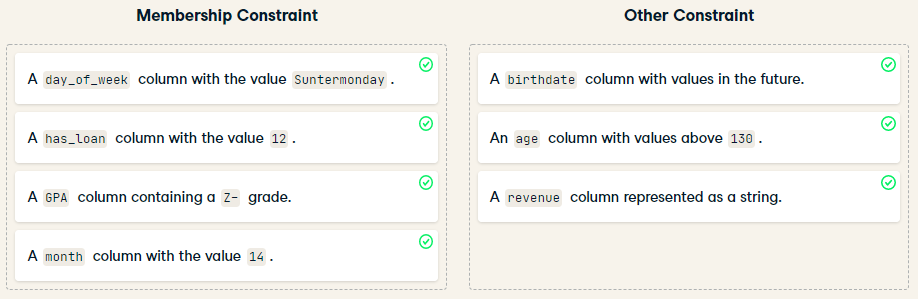

In [ ]:
import pandas as pd

airlines = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cleaning Data in Python/airlines_final.csv')
airlines

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,2804,1475,Tuesday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satsified
2473,2805,2222,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied
2474,2806,2684,Friday,UNITED,ORLANDO,East US,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied
2475,2807,2549,Tuesday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,2018-12-31,95.0,Clean,Somewhat safe,Very satisfied


In [ ]:
# Print the information of ride_sharing
print(airlines.info())

# Print summary statistics of user_type column
print(airlines[['cleanliness', 'safety','satisfaction']].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Unnamed: 0     2477 non-null   int64   
 1   id             2477 non-null   int64   
 2   day            2477 non-null   object  
 3   airline        2477 non-null   object  
 4   destination    2477 non-null   object  
 5   dest_region    2477 non-null   object  
 6   dest_size      2477 non-null   object  
 7   boarding_area  2477 non-null   object  
 8   dept_time      2477 non-null   object  
 9   wait_min       2477 non-null   float64 
 10  cleanliness    2477 non-null   category
 11  safety         2477 non-null   category
 12  satisfaction   2477 non-null   category
dtypes: category(3), float64(1), int64(2), object(7)
memory usage: 201.5+ KB
None
           cleanliness     safety        satisfaction
count             2477       2477                2477
unique               5      

In [ ]:

# Print formed columns and calculate average ride duration 
categories = airlines[['cleanliness','safety','satisfaction']]
categories


,cleanliness,safety,satisfaction
0,Clean,Neutral,Very satisfied
1,Clean,Very safe,Very satisfied
2,Average,Somewhat safe,Neutral
3,Clean,Very safe,Somewhat satsified
4,Somewhat clean,Very safe,Somewhat satsified
...,...,...,...
2472,Somewhat clean,Neutral,Somewhat satsified
2473,Clean,Very safe,Very satisfied
2474,Clean,Very safe,Very satisfied
2475,Clean,Somewhat safe,Very satisfied


**Finding consistency**

In this exercise and throughout this chapter, you'll be working with the `airlines` `DataFrame` which contains survey responses on the San Francisco Airport from airline customers.

The DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction. Another DataFrame named `categories` was created, containing all correct possible values for the survey columns.

In this exercise, you will use both of these DataFrames to find survey answers with inconsistent values, and drop them, effectively performing an outer and inner join on both these DataFrames as seen in the video exercise. The `pandas` package has been imported as `pd`, and the airlines and `categories` DataFrames are in your environment.

In [ ]:
# Print categories DataFrame
print(categories)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

         cleanliness         safety        satisfaction
0              Clean        Neutral      Very satisfied
1              Clean      Very safe      Very satisfied
2            Average  Somewhat safe             Neutral
3              Clean      Very safe  Somewhat satsified
4     Somewhat clean      Very safe  Somewhat satsified
...              ...            ...                 ...
2472  Somewhat clean        Neutral  Somewhat satsified
2473           Clean      Very safe      Very satisfied
2474           Clean      Very safe      Very satisfied
2475           Clean  Somewhat safe      Very satisfied
2476           Clean      Very safe  Somewhat satsified

[2477 rows x 3 columns]
Cleanliness:  ['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty']
Categories (5, object): ['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty'] 

Safety:  ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe']
Categories (5, object): ['Neutral', 'Very safe

cleanliness because it has an Unacceptable category. Missing Neutral

In [ ]:
import pandas as pd
airlines = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cleaning Data in Python/airlines_final.csv')

# Print formed columns and calculate average ride duration 
categories = airlines[['cleanliness','safety','satisfaction']]

# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

Empty DataFrame
Columns: [Unnamed: 0, id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction]
Index: []


In [ ]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

# Print rows with consistent categories only
print(airlines[~cat_clean_rows])

Empty DataFrame
Columns: [Unnamed: 0, id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction]
Index: []
      Unnamed: 0    id  ...         safety        satisfaction
0              0  1351  ...        Neutral      Very satisfied
1              1   373  ...      Very safe      Very satisfied
2              2  2820  ...  Somewhat safe             Neutral
3              3  1157  ...      Very safe  Somewhat satsified
4              4  2992  ...      Very safe  Somewhat satsified
...          ...   ...  ...            ...                 ...
2472        2804  1475  ...        Neutral  Somewhat satsified
2473        2805  2222  ...      Very safe      Very satisfied
2474        2806  2684  ...      Very safe      Very satisfied
2475        2807  2549  ...  Somewhat safe      Very satisfied
2476        2808  2162  ...      Very safe  Somewhat satsified

[2477 rows x 13 columns]


**Categories of errors**

In the video exercise, you saw how to address common problems affecting categorical variables in your data, including white spaces and inconsistencies in your categories, and the problem of creating new categories and mapping existing ones to new ones.

To get a better idea of the toolkit at your disposal, you will be mapping functions and methods from pandas and Python used to address each type of problem.

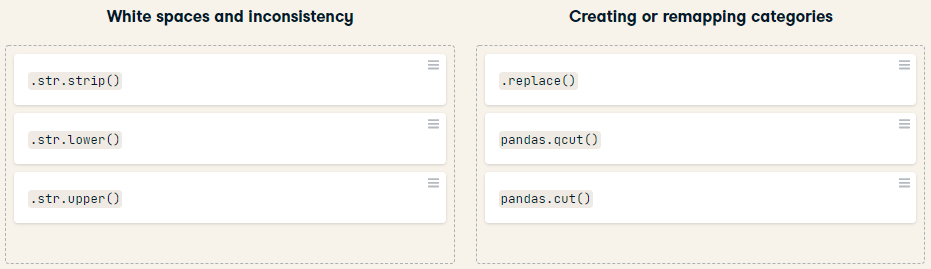

**Inconsistent categories**

In this exercise, you'll be revisiting the `airlines` DataFrame from the previous lesson.

As a reminder, the DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding `cleanliness`, safety, and satisfaction on the San Francisco Airport.

In this exercise, you will examine two categorical columns from this DataFrame, `dest_region` and `dest_size` respectively, assess how to address them and make sure that they are cleaned and ready for analysis. The `pandas` package has been imported as `pd`, and the `airlines` DataFrame is in your environment.

In [ ]:
# 1/4
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


**Question**

From looking at the output, what do you think is the problem with these columns?

Possible Answers

* The dest_region column has only inconsistent values due to capitalization.

* The dest_region column has inconsistent values due to capitalization and has one value that needs to be remapped.

* The dest_size column has only inconsistent values due to leading and trailing spaces.

* ***Both 2 and 3 are correct.***

In [ ]:
# 4/4
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']
['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


**Remapping categories**

To better understand survey respondents from `airlines`, you want to find out if there is a relationship between certain responses and the day of the week and wait time at the gate.

The `airlines` DataFrame contains the day and `wait_min` columns, which are categorical and numerical respectively. The day column contains the exact day a flight took place, and `wait_min` contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

`wait_type`: '`short`' for 0-60 min, '`medium`' for 60-180 and long for 180+
`day_week`: '`weekday`' if day is in the weekday, '`weekend`' if day is in the weekend.

The `pandas` and `numpy` packages have been imported as `pd` and `np`. Let's create some new categorical data!

In [ ]:
import pandas as pd

airlines = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cleaning Data in Python/airlines_final.csv')

import numpy as np

# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

Awesome work! You just created two new categorical variables, that when combined with other columns, could produce really interesting analysis. Don't forget, you can always use an assert statement to check your changes passed.

**Removing titles and taking names**

While collecting survey respondent metadata in the airlines DataFrame, the full name of respondents was saved in the full_name column. However upon closer inspection, you found that a lot of the different names are prefixed by honorifics such as "`Dr.`", "`Mr.`", "`Ms.`" and "Miss".

Your ultimate objective is to create two new columns named first_name and `last_name`, containing the first and last names of respondents respectively. Before doing so however, you need to remove honorifics.

The `airlines` DataFrame is different from before

In [ ]:
  id                full_name        day           airline        destination    dest_region   dest_size boarding_area   dept_time  wait_min     cleanliness         safety        satisfaction
0    1351           Melodie Stuart    Tuesday       UNITED INTL             KANSAI           Asia         Hub  Gates 91-102  2018-12-31     115.0           Clean        Neutral      Very satisfied
1     373          Dominic Shannon     Friday            ALASKA  SAN JOSE DEL CABO  Canada/Mexico       Small   Gates 50-59  2018-12-31     135.0           Clean      Very safe      Very satisfied
2    2820        Quintessa Tillman   Thursday             DELTA        LOS ANGELES        West US         Hub   Gates 40-48  2018-12-31      70.0         Average  Somewhat safe             Neutral
3    1157  Dr. Christine Nicholson    Tuesday         SOUTHWEST        LOS ANGELES        West US         Hub   Gates 20-39  2018-12-31     190.0           Clean      Very safe  Somewhat satsified
4    2992          Regina Clements  Wednesday          AMERICAN              MIAMI        East US         Hub   Gates 50-59  2018-12-31     559.0  Somewhat clean      Very safe  Somewhat satsified
..    ...                      ...        ...               ...                ...            ...         ...           ...         ...       ...             ...            ...                 ...
195   819         Ms. Vanna Rivera     Sunday            ALASKA           PORTLAND        West US      Medium   Gates 50-59  2018-12-31      80.0  Somewhat clean        Neutral             Neutral
196  2924          Miss Venus Lowe     Friday  TURKISH AIRLINES           ISTANBUL    Middle East         Hub  Gates 91-102  2018-12-31     205.0  Somewhat clean  Somewhat safe  Somewhat satsified
197  2245          Amethyst Nieves   Thursday         SOUTHWEST            PHOENIX        West US         Hub   Gates 20-39  2018-12-31     140.0         Average  Somewhat safe  Somewhat satsified
198   238      Miss Vivian Foreman  Wednesday          AMERICAN        LOS ANGELES        West US         Hub   Gates 50-59  2018-12-31     115.0  Somewhat clean      Very safe  Somewhat satsified
199  1077       Miss Wendy Griffin     Friday        AIR CANADA            CALGARY  Canada/Mexico      Medium  Gates 91-102  2018-12-31     385.0  Somewhat clean  Somewhat safe             Neutral

[200 rows x 13 columns]

In [ ]:
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

**Keeping it descriptive**

To further understand travelers' experiences in the San Francisco Airport, the quality assurance department sent out a qualitative questionnaire to all travelers who gave the airport the worst score on all possible categories. The objective behind this questionnaire is to identify common patterns in what travelers are saying about the airport.

Their response is stored in the survey_response column. Upon a closer look, you realized a few of the answers gave the shortest possible character amount without much substance. In this exercise, you will isolate the responses with a character count higher than `40` , and make sure your new DataFrame contains responses with `40` characters or more using an `assert` statement.

In [ ]:
import pandas as pd

airlines = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cleaning Data in Python/airlines_final.csv')

# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])

<script.py> output:
    18    The airport personnell forgot to alert us of d...
    19    The food in the airport was really really expe...
    20    One of the other travelers was really loud and...
    21    I don't remember answering the survey with the...
    22    The airport personnel kept ignoring my request...
    23    The chair I sat in was extremely uncomfortable...
    24    I wish you were more like other airports, the ...
    25    I was really unsatisfied with the wait times b...
    27    The flight was okay, but I didn't really like ...
    28    We were really slowed down by security measure...
    29    There was a spill on the aisle next to the bat...
    30    I felt very unsatisfied by how long the flight...
    Name: survey_response, dtype: object

**Chapter 3 Uniformity**

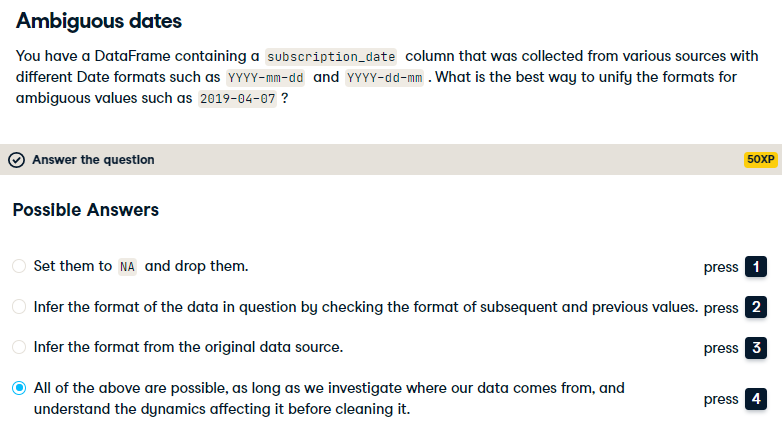

In [ ]:
import pandas as pd
banking = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cleaning Data in Python/banking_dirty.csv')
banking


,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,CA507BA1,1974-08-10,46,12209.84,7515,190.0,931.0,1451.0,4943.0,26-05-18,11-09-19
96,96,B99CD662,1989-12-12,31,92838.44,49089,2453.0,7892.0,31486.0,7258.0,04-05-17,12-03-19
97,97,13770971,1984-11-29,36,92750.87,27962,3352.0,7547.0,8486.0,8577.0,16-08-17,24-04-19
98,98,93E78DA3,1969-12-14,51,41942.23,29662,1758.0,11174.0,11650.0,5080.0,09-10-17,15-04-18


In [ ]:
# Print the header of account_opend
print(banking['account_opened'].head())


0    02-09-18
1    28-02-19
2    25-04-18
3    07-11-17
4    14-05-18
Name: account_opened, dtype: object


**Uniform currencies**

In this exercise and throughout this chapter, you will be working with a retail `banking` dataset stored in the `banking` DataFrame. The dataset contains data on the amount of money stored in accounts (`acct_amount`), their currency (`acct_cur`), amount invested (`inv_amount`), account opening date (`account_opened`), and last transaction date (`last_transaction`) that were consolidated from American and European branches.

You are tasked with understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, you first need to unify the currency amount into dollars.

In [ ]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1 

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

**Uniform dates**

After having unified the currencies of your different account amounts, you want to add a temporal dimension to your analysis and see how customers have been investing their money given the size of their account over each year. The `account_opened` column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a `datetime` object, while making sure that the format is inferred and potentially incorrect formats are set to missing. 

In [ ]:
import pandas as pd
banking = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cleaning Data in Python/banking_dirty.csv')
# Print the header of account_opend
print(banking['account_opened'].head())


0    02-09-18
1    28-02-19
2    25-04-18
3    07-11-17
4    14-05-18
Name: account_opened, dtype: object


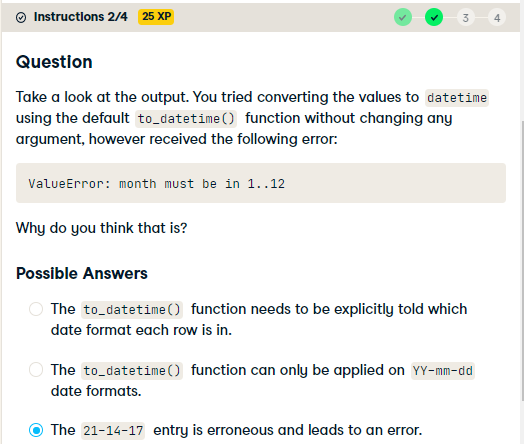

In [ ]:
# 3/4
# Print the header of account_opened
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce')

0   2018-02-09
1   2019-02-28
2   2018-04-25
3   2017-07-11
4   2018-05-14
Name: account_opened, dtype: datetime64[ns]


In [ ]:
# 4/4
# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])



0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object




0          2018-03-05
1            21-01-18
2    January 26, 2018
3            21-14-17
4            05-06-17
Name: account_opened, dtype: object
0     2018
1     2018
2     2018
3      NaT
4     2017
      ... 
92    2017
93    2018
94    2018
95    2017
96    2017
Name: acct_year, Length: 97, dtype: object

Cunning calendar cleaning! 
Now that the acct_year column is created, a simple .groupby() will show you how accounts are opened on a yearly!

**Cross field or no cross field?**

Throughout this course, you've been immersed in a variety of data cleaning problems from range constraints, data type constraints, uniformity and more.

In this lesson, you were introduced to cross field validation as a means to sanity check your data and making sure you have strong data integrity.

Now, you will map different applicable concepts and techniques to their respective categories.

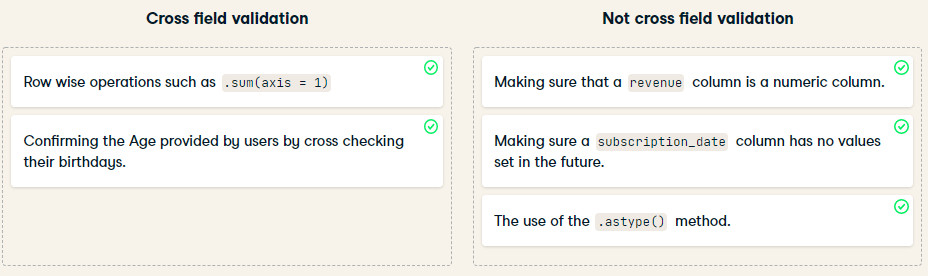

**How's our data integrity?**

New data has been merged into the `banking` DataFrame that contains details on how investments in the `inv_amount` column are allocated across four different funds A, B, C and D.

Furthermore, the age and birthdays of customers are now stored in the age and `birth_date` columns respectively.

You want to understand how customers of different age groups invest. However, you want to first make sure the data you're analyzing is correct. You will do so by cross field checking values of `inv_amount` and age against the amount invested in different funds and customers' birthdays. Both `pandas` and `datetime` have been imported as pd and dt respectively.

In [ ]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [ ]:
import pandas as pd
import datetime as dt 
banking = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cleaning Data in Python/banking_dirty.csv')
banking



,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,CA507BA1,1974-08-10,46,12209.84,7515,190.0,931.0,1451.0,4943.0,26-05-18,11-09-19
96,96,B99CD662,1989-12-12,31,92838.44,49089,2453.0,7892.0,31486.0,7258.0,04-05-17,12-03-19
97,97,13770971,1984-11-29,36,92750.87,27962,3352.0,7547.0,8486.0,8577.0,16-08-17,24-04-19
98,98,93E78DA3,1969-12-14,51,41942.23,29662,1758.0,11174.0,11650.0,5080.0,09-10-17,15-04-18


In [ ]:
import pandas as pd
import datetime as dt

banking['birth_date'] = pd.to_datetime(banking.birth_date, format='%Y-%m-%d')


In [ ]:
banking['Year'] = banking['birth_date'].dt.strftime('%Y')

In [ ]:
import datetime as dt
# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = ages_manual == banking['Age']

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  100


**Is this missing at random?**

You've seen in the video exercise how there are a variety of missingness types when observing missing data. As a reminder, missingness types can be described as the following:

* Missing Completely at Random: No systematic relationship between a column's missing values and other or own values.
* Missing at Random: There is a systematic relationship between a column's missing values and other observed values.
* Missing not at Random: There is a systematic relationship between a column's missing values and unobserved values.

You have a DataFrame containing customer satisfaction scores for a service. What type of missingness is the following?

A customer `satisfaction_score` column with missing values for highly dissatisfied customers.

answer: 
Missing not at random.

**Missing investors**

Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.

You just received a new version of the banking DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing `inv_amount` values.

You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness. The `pandas`, `missingno` and `matplotlib.pyplot` packages have been imported as `pd`, *`msno`* and `plt` respectively. The banking DataFrame is in your environment.

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
Year                0
dtype: int64


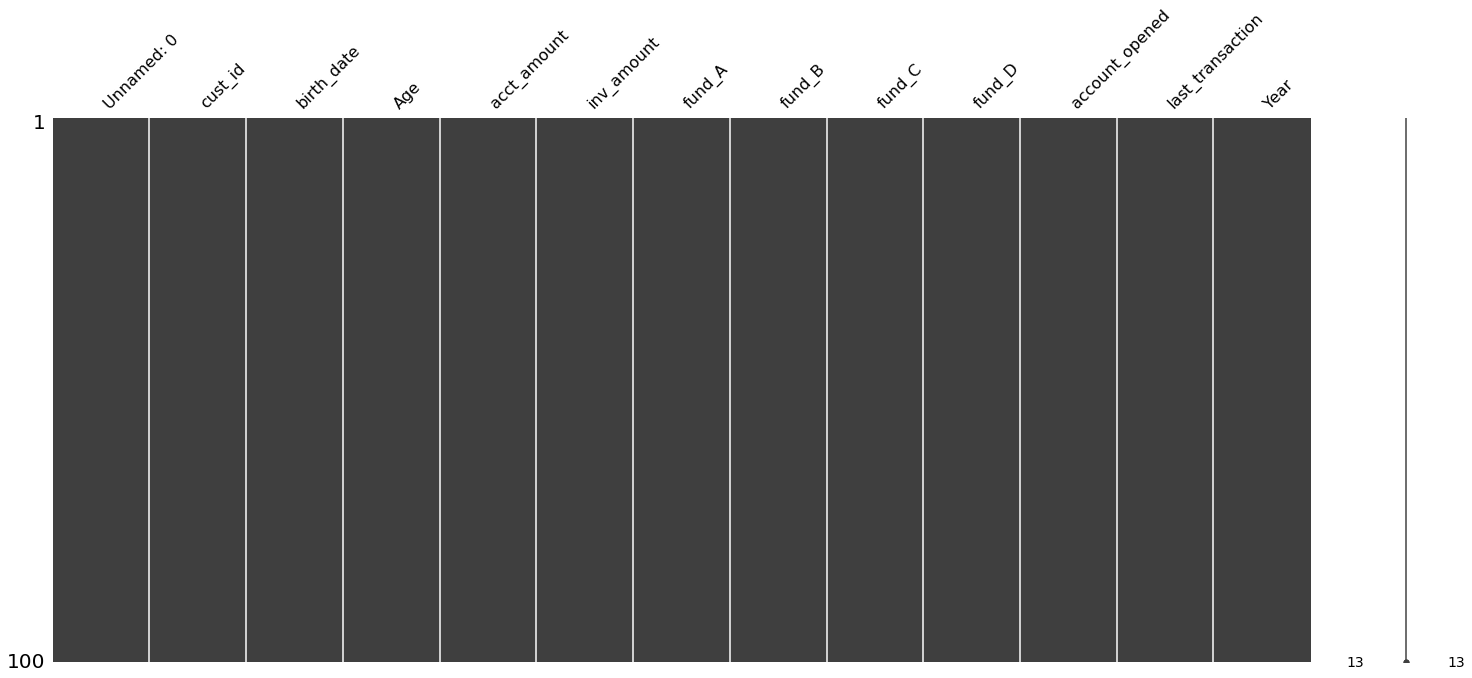

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno

# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
# Visualize missingness matrix
msno.matrix(banking)
plt.show()

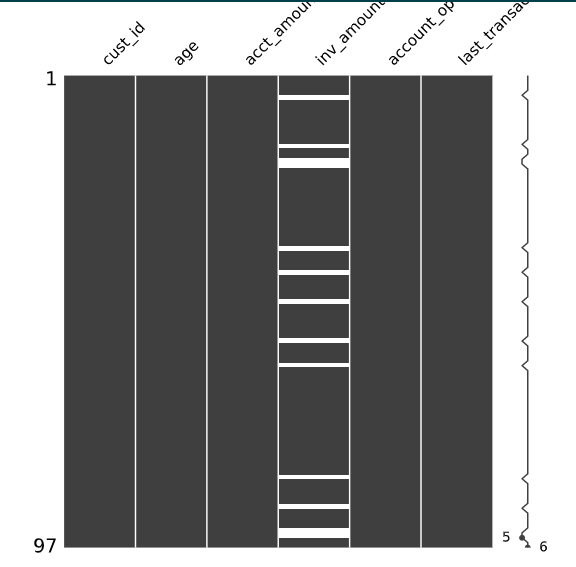

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
Year                0
dtype: int64


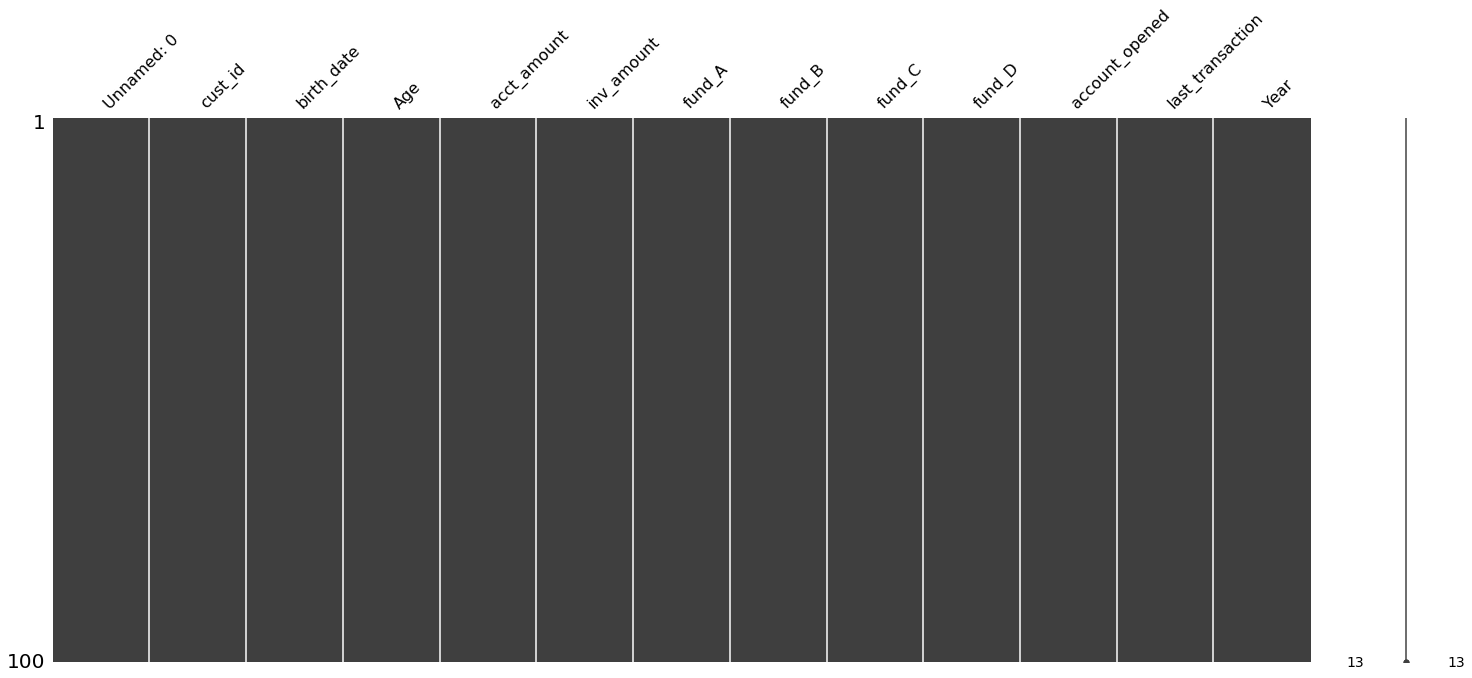

In [ ]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

In [ ]:
missing_investors.describe()
age  ...  inv_amount
count  13.000000  ...         0.0
mean   21.846154  ...         NaN
std     1.519109  ...         NaN
min    20.000000  ...         NaN
25%    21.000000  ...         NaN
50%    21.000000  ...         NaN
75%    23.000000  ...         NaN
max    25.000000  ...         NaN

[8 rows x 3 columns]


investors.describe()
Out[4]:

             age  ...    inv_amount
count  84.000000  ...     84.000000
mean   43.559524  ...  44717.885476
std    10.411244  ...  26031.246094
min    26.000000  ...   3216.720000
25%    34.000000  ...  22736.037500
50%    45.000000  ...  44498.460000
75%    53.000000  ...  66176.802500
max    59.000000  ...  93552.690000

[8 rows x 3 columns]

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
Year                0
dtype: int64


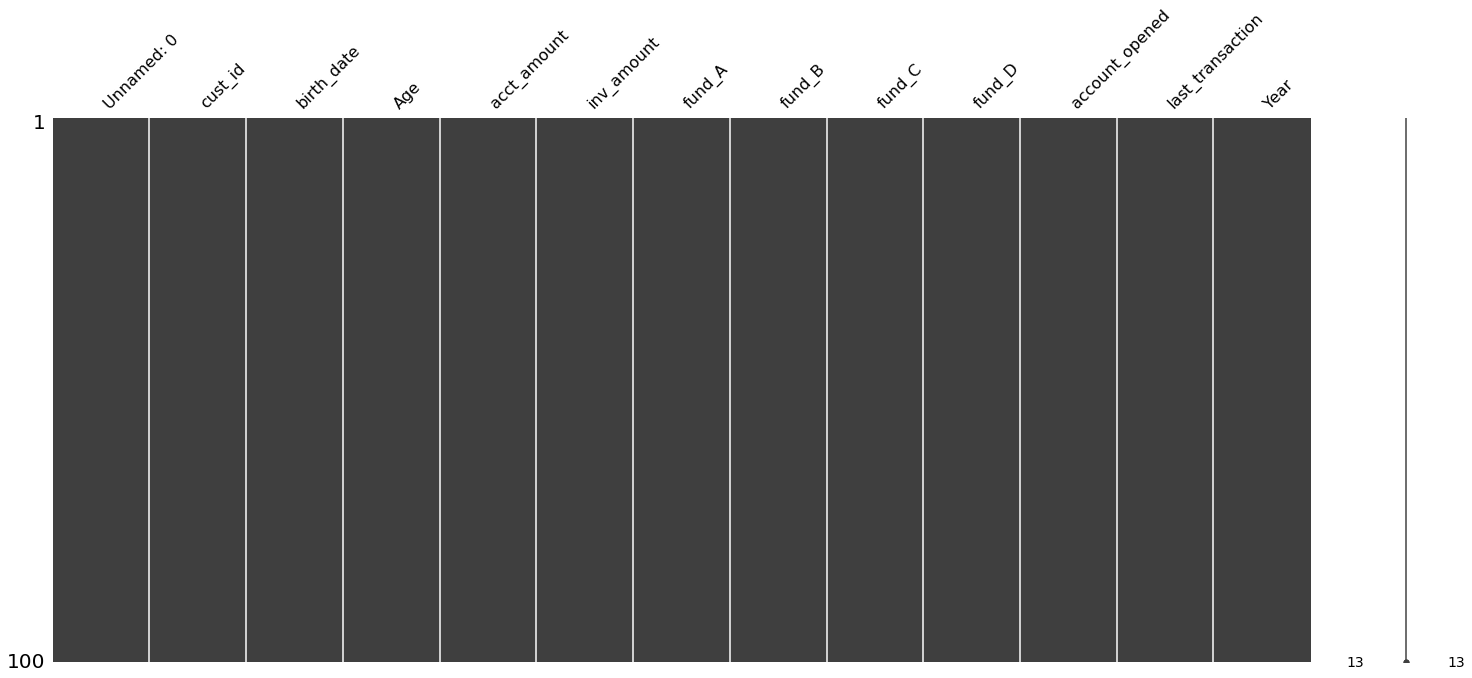

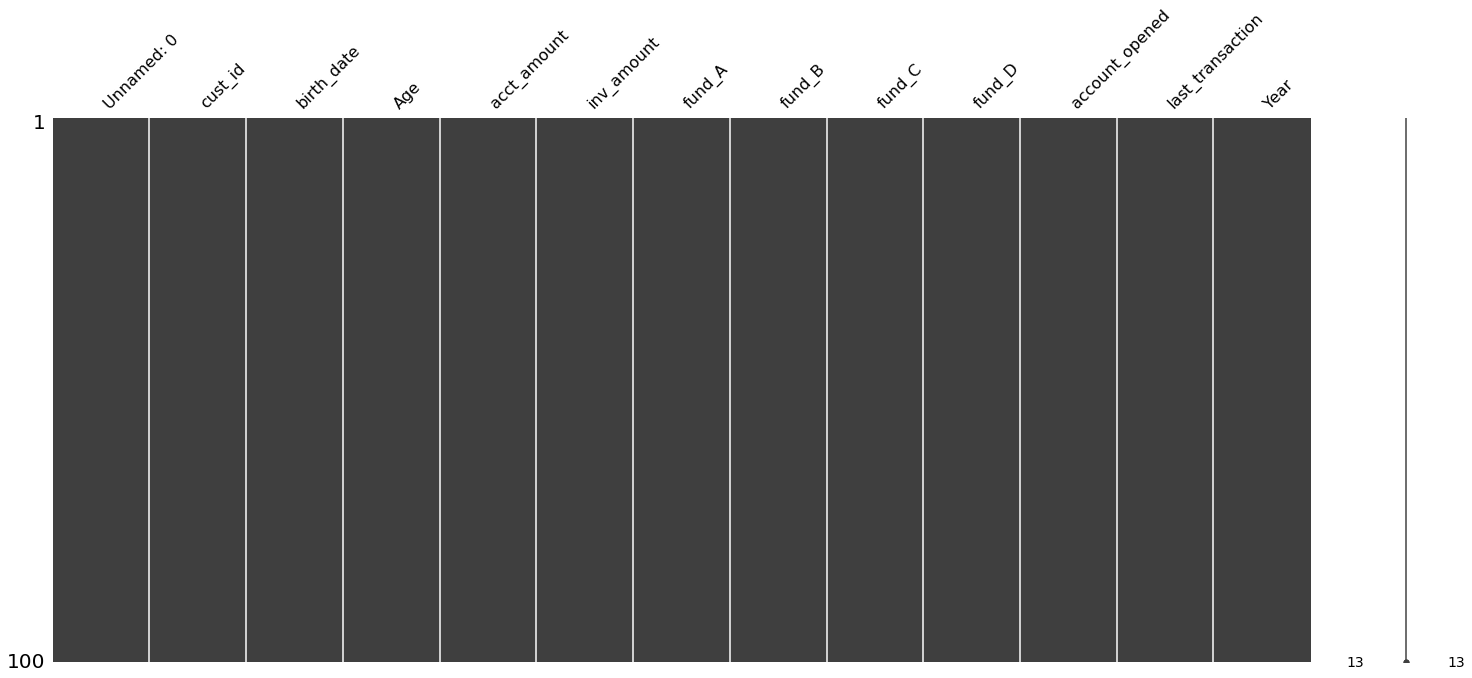

In [ ]:
 # Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values('Age')
msno.matrix(banking_sorted)
plt.show()

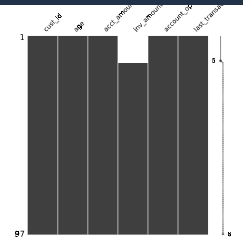

Great job! Notice how all the white spaces for inv_amount are on top? Indeed missing values are only due to young bank account holders not investing their money! Better set it to 0 with .fillna()

**Follow the money**

In this exercise, you're working with another version of the banking DataFrame that contains missing values for both the `cust_id` column and the `acct_amount` column.

You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing `cust_id` don't really help you, and that on average `acct_amount` is usually 5 times the amount of `inv_amount`.

In this exercise, you will drop rows of banking with missing `cust_ids`, and impute missing values of `acct_amount` with some domain knowledge.

In [ ]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount']*5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
Year                0
dtype: int64


**Chapter 4 Record linkage**

**Minimum edit distance**

In the video exercise, you saw how minimum edit distance is used to identify how similar two strings are. As a reminder, minimum edit distance is the minimum number of steps needed to reach from String A to String B, with the operations available being:

* Insertion of a new character.
* Deletion of an existing character.
* Substitution of an existing character.
* Transposition of two existing consecutive characters.

What is the minimum edit distance from '`sign`' to '`sing`', and which operation(s) gets you there?
***ans: 1 by transposing 'g' with 'n'***

**The cutoff point**

In this exercise, and throughout this chapter, you'll be working with the `restaurants` DataFrame which has data on various restaurants. Your ultimate goal is to create a restaurant recommendation engine, but you need to first clean your data.

This version of `restaurants` has been collected from many sources, where the `cuisine_type` column is riddled with typos, and should contain only `italian`, `american` and `asian` cuisine types. There are so many unique categories that remapping them manually isn't scalable, and it's best to use string similarity instead.

Before doing so, you want to establish the cutoff point for the similarity score using the fuzzywuzzy's `process.extract()` function by finding the similarity score of the most distant typo of each category.

***Note: DataFrame use in this excersie might be different**

In [ ]:
import pandas as pd
restaurants = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cleaning Data in Python/restaurants_L2_dirty.csv')
restaurants

,Unnamed: 0,name,addr,city,phone,type
0,0,kokomo,6333 w. third st.,la,2139330773,american
1,1,feenix,8358 sunset blvd. west,hollywood,2138486677,american
2,2,parkway,510 s. arroyo pkwy .,pasadena,8187951001,californian
3,3,r-23,923 e. third st.,los angeles,2136877178,japanese
4,4,gumbo,6333 w. third st.,la,2139330358,cajun/creole
...,...,...,...,...,...,...
77,77,feast,1949 westwood blvd.,west la,3104750400,chinese
78,78,mulberry,17040 ventura blvd.,encino,8189068881,pizza
79,79,matsuhissa,129 n. la cienega blvd.,beverly hills,3106599639,asian
80,80,jiraffe,502 santa monica blvd,santa monica,3109176671,californian


In [ ]:
!pip install fuzzywuzzy


In [ ]:
# Import process from fuzzywuzzy
from fuzzywuzzy import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['type'].unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))

[('asian', 100), ('indonesian', 72), ('italian', 67), ('russian', 67), ('american', 62), ('californian', 54), ('japanese', 54), ('mexican/tex-mex', 54), ('american ( new )', 54), ('mexican', 50), ('cajun/creole', 36), ('middle eastern', 36), ('vietnamese', 36), ('pacific new wave', 36), ('fast food', 36), ('chicken', 33), ('hamburgers', 27), ('hot dogs', 26), ('coffeebar', 26), ('continental', 26), ('steakhouses', 25), ('southern/soul', 22), ('delis', 20), ('eclectic', 20), ('pizza', 20), ('health food', 19), ('diners', 18), ('coffee shops', 18), ('noodle shops', 18), ('french ( new )', 18), ('desserts', 18), ('seafood', 17), ('chinese', 17)]
[('american', 100), ('american ( new )', 90), ('mexican', 80), ('mexican/tex-mex', 68), ('asian', 62), ('italian', 53), ('russian', 53), ('middle eastern', 51), ('pacific new wave', 45), ('hamburgers', 44), ('indonesian', 44), ('chicken', 40), ('southern/soul', 39), ('japanese', 38), ('eclectic', 38), ('delis', 36), ('pizza', 36), ('cajun/creole',

In [ ]:
import pandas as pd
restaurants1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cleaning Data in Python/restaurants_L2.csv')
restaurants1

,Unnamed: 0,name,addr,city,phone,type
0,0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american
1,1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american
2,2,campanile,624 s. la brea ave.,los angeles,2139381447,american
3,3,fenix,8358 sunset blvd. west,hollywood,2138486677,american
4,4,grill on the alley,9560 dayton way,los angeles,3102760615,american
...,...,...,...,...,...,...
331,331,vivande porta via,2125 fillmore st.,san francisco,4153464430,italian
332,332,vivande ristorante,670 golden gate ave.,san francisco,4156739245,italian
333,333,world wrapps,2257 chestnut st.,san francisco,4155639727,american
334,334,wu kong,101 spear st.,san francisco,4159579300,asian


In [ ]:
<script.py> output:
    [('asian', 100), ('asiane', 91), ('asiann', 91), ('asiian', 91), ('asiaan', 91), ('asianne', 83), ('asiat', 80), ('italiann', 72), ('italiano', 72), ('italianne', 72), ('italian', 67), ('amurican', 62), ('american', 62), ('italiaan', 62), ('italiian', 62), ('itallian', 62), ('americann', 57), ('americano', 57), ('ameerican', 57), ('aamerican', 57), ('ameriican', 57), ('amerrican', 57), ('ammericann', 54), ('ameerrican', 54), ('ammereican', 54), ('america', 50), ('merican', 50), ('murican', 50), ('italien', 50), ('americen', 46), ('americin', 46), ('amerycan', 46), ('itali', 40)]
    [('american', 100), ('americann', 94), ('americano', 94), ('ameerican', 94), ('aamerican', 94), ('ameriican', 94), ('amerrican', 94), ('america', 93), ('merican', 93), ('ammericann', 89), ('ameerrican', 89), ('ammereican', 89), ('amurican', 88), ('americen', 88), ('americin', 88), ('amerycan', 88), ('murican', 80), ('asian', 62), ('asiane', 57), ('asiann', 57), ('asiian', 57), ('asiaan', 57), ('italian', 53), ('asianne', 53), ('italiann', 50), ('italiano', 50), ('italiaan', 50), ('italiian', 50), ('itallian', 50), ('italianne', 47), ('asiat', 46), ('itali', 40), ('italien', 40)]
    [('italian', 100), ('italiann', 93), ('italiano', 93), ('italiaan', 93), ('italiian', 93), ('itallian', 93), ('italianne', 88), ('italien', 86), ('itali', 83), ('asian', 67), ('asiane', 62), ('asiann', 62), ('asiian', 62), ('asiaan', 62), ('asianne', 57), ('amurican', 53), ('american', 53), ('americann', 50), ('asiat', 50), ('americano', 50), ('ameerican', 50), ('aamerican', 50), ('ameriican', 50), ('amerrican', 50), ('ammericann', 47), ('ameerrican', 47), ('ammereican', 47), ('america', 43), ('merican', 43), ('murican', 43), ('americen', 40), ('americin', 40), ('amerycan', 40)]

**Question**

Take a look at the output, what do you think should be the similarity cutoff point when remapping categories?

Correct! **`80`** is that sweet spot where you convert all incorrect typos without remapping incorrect categories. Often times though, you may need to combine the techniques learned in chapter 2, especially since there could be strings that make it beyond our cutoff point, but are not actually a match!

**Remapping categories II**

In the last exercise, you determined that the distance cutoff point for remapping typos of '`american`', '`asian`', and '`italian`' cuisine types stored in the `cuisine_type` column should be 80.

In this exercise, you're going to put it all together by finding matches with similarity scores equal to or higher than `80` by using fuzywuzzy.process's `extract()` function, for each correct cuisine type, and replacing these matches with it. Remember, when comparing a string with an array of strings using `process.extract()`, the output is a list of tuples where each is formatted like:
(closest match, similarity score, index of match)

In [ ]:
# 1/4
# Inspect the unique values of the cuisine_type column
print(restaurants['type'].unique())

['american' 'californian' 'japanese' 'cajun/creole' 'hot dogs' 'diners'
 'delis' 'hamburgers' 'seafood' 'italian' 'coffee shops' 'russian'
 'steakhouses' 'mexican/tex-mex' 'noodle shops' 'mexican' 'middle eastern'
 'asian' 'vietnamese' 'health food' 'american ( new )' 'pacific new wave'
 'indonesian' 'eclectic' 'chicken' 'fast food' 'southern/soul' 'coffeebar'
 'continental' 'french ( new )' 'desserts' 'chinese' 'pizza']


In [ ]:
Aslinya
['america' 'merican' 'amurican' 'americen' 'americann' 'asiane' 'itali'
 'asiann' 'murican' 'italien' 'italian' 'asiat' 'american' 'americano'
 'italiann' 'ameerican' 'asianne' 'italiano' 'americin' 'ammericann'
 'amerycan' 'aamerican' 'ameriican' 'italiaan' 'asiian' 'asiaan'
 'amerrican' 'ameerrican' 'ammereican' 'asian' 'italianne' 'italiian'
 'itallian']

Okay! Looks like you will need to use some string matching to correct these misspellings!

As a first step, create a list of all possible matches, comparing '`italian`' with the restaurant types listed in the `cuisine_type` column.

In [ ]:
# 2/4
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants['type'], limit = len(restaurants))

# Inspect the first 5 matches
print(matches[0:5])

[('italian', 100, 14), ('italian', 100, 21), ('italian', 100, 47), ('italian', 100, 57), ('italian', 100, 73)]


In [ ]:
<script.py> output:
    [('italian', 100, 11), ('italian', 100, 25), ('italian', 100, 41), ('italian', 100, 47), ('italian', 100, 49)]


3/4
Now you're getting somewhere! Now you can iterate through matches to reassign similar entries.

Within the for loop, use an if statement to check whether the similarity score in each match is greater than or equal to 80.
If it is, use .loc to select rows where cuisine_type in restaurants is equal to the current match (which is the first element of match), and reassign them to be 'italian'.

In [ ]:
# 3/4
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants['type'], limit=len(restaurants))

# Iterate through the list of matches to italian
for match in matches:
  # Check whether the similarity score is greater than or equal to 80
  if match[1]>=80:
    # Select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
    restaurants.loc[restaurants['type'] == match[0], 'type'] = 'italian'

**Finally**, you'll adapt your code to work with every restaurant type in categories.

Using the variable cuisine to iterate through categories, embed your code from the previous step in an outer for loop.
Inspect the final result. This has been done for you.

In [ ]:
categories = restaurants1['type']
categories

0      american
1      american
2      american
3      american
4      american
         ...   
331     italian
332     italian
333    american
334       asian
335       asian
Name: type, Length: 336, dtype: object

In [ ]:
# 4/4
# Iterate through categories
for cuisine in categories:
    # Create a list of matches, comparing cuisine with the cuisine_type column
    matches = process.extract(cuisine, restaurants['type'], limit=len(restaurants.type))

    # Iterate through the list of matches
    for match in matches:
        # Check whether the similarity score is greater than or equal to 80
        if match[1] >= 80:
            # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
            restaurants.loc[restaurants['type'] == match[0]] = cuisine

# Inspect the final result
restaurants['type'].unique()

array(['american', 'californian', 'japanese', 'cajun', 'hot dogs',
       'diners', 'delis', 'hamburgers', 'seafood', 'italian',
       'coffee shops', 'russian', 'steakhouses', 'noodle shops',
       'middle eastern', 'asian', 'vietnamese', 'health food',
       'pacific new wave', 'indonesian', 'eclectic', 'chicken',
       'fast food', 'southern', 'coffeebar', 'continental',
       'french ( new )', 'desserts', 'chinese', 'pizza'], dtype=object)

**Generating Pairs**

**To link or not to link?**

Similar to joins, record linkage is the act of linking data from different sources regarding the same entity. But unlike joins, record linkage does not require exact matches between different pairs of data, and instead can find close matches using string similarity. This is why record linkage is effective when there are no common unique keys between the data sources you can rely upon when linking data sources such as a unique identifier.

In this exercise, you will classify each card whether it is a traditional join problem, or a record linkage one.

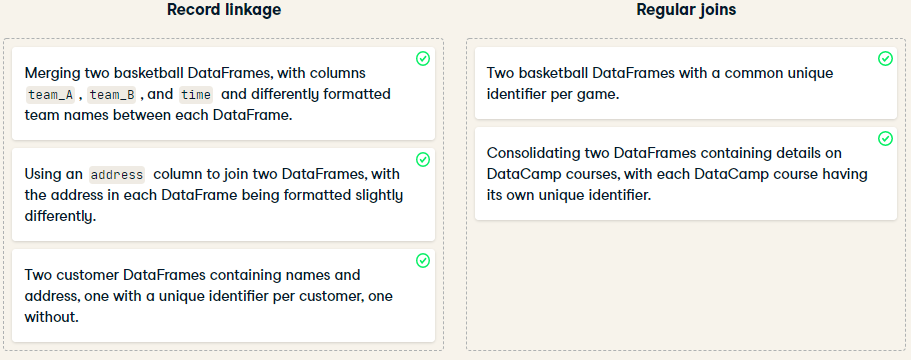

**Pairs of restaurants**

In the last lesson, you cleaned the restaurants dataset to make it ready for building a restaurants recommendation engine. You have a new DataFrame named `restaurants_new` with new restaurants to train your model on, that's been scraped from a new data source.

You've already cleaned the cuisine_type and `city` columns using the techniques learned throughout the course. However you saw duplicates with typos in restaurants names that require record linkage instead of joins with restaurants.

In this exercise, you will perform the first step in record linkage and generate possible pairs of rows between restaurants and `restaurants_new`. Both DataFrames, pandas and recordlinkage are in your environment.

In [ ]:
pip install recordlinkage

     |████████████████████████████████| 944 kB 5.1 MB/s 
     |████████████████████████████████| 137 kB 46.2 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.8.9-cp37-cp37m-linux_x86_64.whl size=73237 sha256=4de048e1c1c9a9d5a4981e066fc05dd8f5261505acc448780fbb791c18406aa1
  Stored in directory: /root/.cache/pip/wheels/32/a9/ef/5d8742e72deaf0d1de327a180d008c2c0299367581800ea73f
Successfully built jellyfish


In [ ]:
restaurants1


,Unnamed: 0,name,addr,city,phone,type
0,0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american
1,1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american
2,2,campanile,624 s. la brea ave.,los angeles,2139381447,american
3,3,fenix,8358 sunset blvd. west,hollywood,2138486677,american
4,4,grill on the alley,9560 dayton way,los angeles,3102760615,american
...,...,...,...,...,...,...
331,331,vivande porta via,2125 fillmore st.,san francisco,4153464430,italian
332,332,vivande ristorante,670 golden gate ave.,san francisco,4156739245,italian
333,333,world wrapps,2257 chestnut st.,san francisco,4155639727,american
334,334,wu kong,101 spear st.,san francisco,4159579300,asian


In [ ]:
# 1/2
import recordlinkage
# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block('type')

# Generate pairs
pairs = indexer.index(restaurants, restaurants)

2/2
**Question**

Now that you've generated your pairs, you've achieved the first step of record linkage. What are the steps remaining to link both restaurants DataFrames, and in what order?
*Ans: Compare between columns, score the comparison, then link the DataFrames.*

**Similar restaurants**

In the last exercise, you generated pairs between `restaurants` and `restaurants1` in an effort to cleanly merge both DataFrames using record linkage.

When performing record linkage, there are different types of matching you can perform between different columns of your DataFrames, including exact matches, string similarities, and more.

Now that your pairs have been generated and stored in pairs, you will find exact matches in the city and `cuisine_type` columns between each pair, and similar strings for each pair in the `rest_name` column. Both DataFrames, pandas and `recordlinkage` are in your environment.

In [ ]:
# 1/4
# Create a comparison object
comp_cl = recordlinkage.Compare()

Use the appropriate `comp_cl` method to find exact matches between the city and cuisine_type columns of both DataFrames.
Use the appropriate `comp_cl` method to find similar strings with a `0.8` similarity threshold in the `rest_name` column of both DataFrames.

In [ ]:
# 2/4
# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('type', 'type', label = 'type')

# Find similar matches of rest_name
comp_cl.string('rest_name', 'rest_name', label='name', threshold = 0.8)

<Compare>

Compute the comparison of the pairs by using the `.compute()` method of `comp_cl`.

In [ ]:
restaurants1

,Unnamed: 0,name,addr,city,phone,type
0,0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american
1,1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american
2,2,campanile,624 s. la brea ave.,los angeles,2139381447,american
3,3,fenix,8358 sunset blvd. west,hollywood,2138486677,american
4,4,grill on the alley,9560 dayton way,los angeles,3102760615,american
...,...,...,...,...,...,...
331,331,vivande porta via,2125 fillmore st.,san francisco,4153464430,italian
332,332,vivande ristorante,670 golden gate ave.,san francisco,4156739245,italian
333,333,world wrapps,2257 chestnut st.,san francisco,4155639727,american
334,334,wu kong,101 spear st.,san francisco,4159579300,asian


In [ ]:
restaurants

,Unnamed: 0,name,addr,city,phone,type
0,american,american,american,american,american,american
1,american,american,american,american,american,american
2,2,parkway,510 s. arroyo pkwy .,pasadena,8187951001,californian
3,3,r-23,923 e. third st.,los angeles,2136877178,japanese
4,cajun,cajun,cajun,cajun,cajun,cajun
...,...,...,...,...,...,...
77,77,feast,1949 westwood blvd.,west la,3104750400,chinese
78,78,mulberry,17040 ventura blvd.,encino,8189068881,pizza
79,asian,asian,asian,asian,asian,asian
80,80,jiraffe,502 santa monica blvd,santa monica,3109176671,californian


In [ ]:
pairs

MultiIndex([(  0,  0),
            (  0,  1),
            (  0,  7),
            (  0, 12),
            (  0, 13),
            (  0, 20),
            (  0, 27),
            (  0, 28),
            (  0, 39),
            (  0, 40),
            ...
            (284, 63),
            (284, 66),
            (287, 24),
            (287, 63),
            (287, 66),
            ( 40, 18),
            (281, 18),
            (288, 18),
            (302, 18),
            (308, 18)],
           length=3631)

In [ ]:
# 3/4
# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types -
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('type', 'type', label='type')

# Find similar matches of rest_name
comp_cl.string('rest_name', 'rest_name', label='name', threshold = 0.8)

# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants1)

print(potential_matches)

**Question**
4/4
Print out potential_matches, the columns are the columns being compared, with values being 1 for a match, and 0 for not a match for each pair of rows in your DataFrames. To find potential matches, you need to find rows with more than matching value in a column. You can find them with

`potential_matches[potential_matches.sum(axis = 1) >= n]`

Where `n` is the minimum number of columns you want matching to ensure a proper duplicate find, what do you think should the value of `n` be?

Ans: 
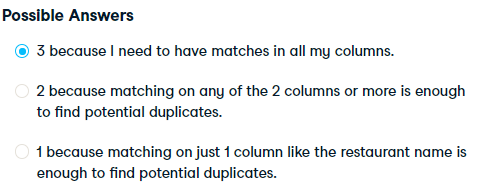

**Linking DataFrames**

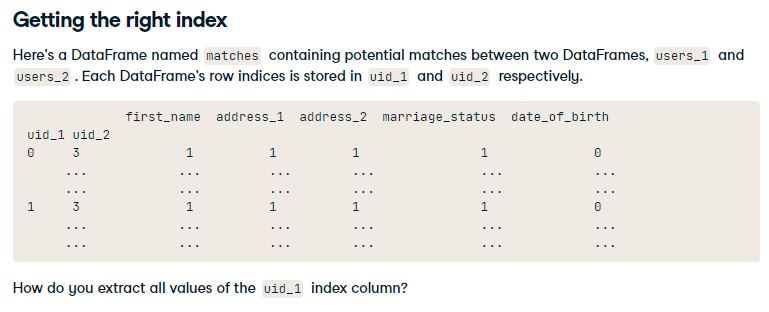


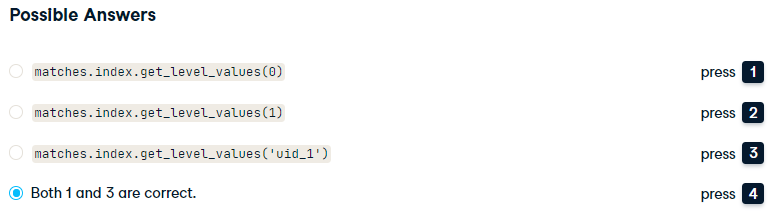

**Linking them together!**

In the last lesson, you've finished the bulk of the work on your effort to link `restaurants` and `restaurants1`. You've generated the different pairs of potentially matching rows, searched for exact matches between the `cuisine_type` and `city` columns, but compared for similar strings in the `rest_name` column. You stored the DataFrame containing the scores in potential_matches.

Now it's finally time to link both DataFrames. You will do so by first extracting all row indices of `restaurants1` that are matching across the columns mentioned above from `potential_matches`. Then you will subset restaurants_new on these indices, then append the non-duplicate values to restaurants.

Isolate instances of potential_matches where the row sum is above or equal to 3 by using the `.sum()` method.

Extract the second column index from matches, which represents row indices of matching record from `restaurants_new` by using the .`get_level_values()` method.

Subset `restaurants1` for rows that are not in `matching_indices`.
Append `non_dup` to restaurants.

In [ ]:
# Isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis = 1) >= 3]

# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurants[~restaurants.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = restaurants.append(non_dup)
print(full_restaurants)

In [ ]:
<script.py> output:
                        rest_name                  rest_addr               city  \
    0   arnie morton's of chicago   435 s. la cienega blv .         los angeles   
    1          art's delicatessen       12224 ventura blvd.         studio city   
    2                   campanile       624 s. la brea ave.         los angeles   
    3                       fenix    8358 sunset blvd. west           hollywood   
    4          grill on the alley           9560 dayton way         los angeles   
    ..                        ...                        ...                ...   
    76                        don        1136 westwood blvd.           westwood   
    77                      feast        1949 westwood blvd.            west la   
    78                   mulberry        17040 ventura blvd.             encino   
    80                    jiraffe      502 santa monica blvd       santa monica   
    81                   martha's  22nd street grill 25 22nd  st. hermosa beach   
    
             phone cuisine_type  
    0   3102461501     american  
    1   8187621221     american  
    2   2139381447     american  
    3   2138486677     american  
    4   3102760615     american  
    ..         ...          ...  
    76  3102091422      italian  
    77  3104750400      chinese  
    78  8189068881        pizza  
    80  3109176671  californian  
    81  3103767786     american  
    
    [396 rows x 5 columns]

**Got It!**
1. Congratulations!
Fantastic job! You have now finished the course!

2. What we've learned
In this course, you learned how to diagnose dirty data, identify the side effects of dirty data, and learned how to clean data.

3. What we've learned
In chapter 1, we learned about basic data cleaning problems such as fixing incorrect data types, making sure our data sticks within range, and dropping duplicates.

4. What we've learned
In chapter 2, we learned about common problems affecting categorical and text data.

5. What we've learned
In chapter 3, we learned about more advanced data problems, such as unifying differently formatted data, cross field validation and completeness.

6. What we've learned
Finally in chapter 4, we saw how to link datasets where joins don't work, by learning about record linkage.

7. More to learn on DataCamp!
With that in mind, there is still so much more to learn on your way to become a data cleaning expert! So make sure to check out DataCamp's content library along the way, whether that means courses,

8. More to learn!
tracks,

9. More to learn!
or projects!

10. Thank you!
Finally, don't forget to apply what you learned in your daily data tasks! Thank you for taking this journey in cleaning data in Python, and see you next time!

# **Data Manipulation with Pandas**

**Chapter 1 Transforming DataFrames**

**Inspecting a DataFrame**

When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.



*   `.head()` returns the first few rows (the “head” of the DataFrame).
*   `.info()` shows information on each of the columns, such as the data type and number of missing values.


*   `.shape` returns the number of rows and columns of the DataFrame.
*   `.describe()` calculates a few summary statistics for each column.




homelessness is a DataFrame containing estimates of homelessness in each U.S. state in 2018. The individual column is the number of homeless individuals not part of a family with children. The family_members column is the number of homeless individuals part of a family with children. The state_pop column is the state's total population.

In [ ]:
import pandas as pd
homelessness = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Manipulation with Pandas/homelessness.csv')
homelessness

,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570.0,864.0,4887681
1,1,Pacific,Alaska,1434.0,582.0,735139
2,2,Mountain,Arizona,7259.0,2606.0,7158024
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588
5,5,Mountain,Colorado,7607.0,3250.0,5691287
6,6,New England,Connecticut,2280.0,1696.0,3571520
7,7,South Atlantic,Delaware,708.0,374.0,965479
8,8,South Atlantic,District of Columbia,3770.0,3134.0,701547
9,9,South Atlantic,Florida,21443.0,9587.0,21244317


**Parts of a DataFrame**

To better understand DataFrame objects, it's useful to know that they consist of three components, stored as attributes:

*    `.values`: A two-dimensional NumPy array of values.
*    `.columns`: An index of columns: the column names.
*    `.index`: An index for the rows: either row numbers or row names.

You can usually think of indexes as a list of strings or numbers, though the pandas Index data type allows for more sophisticated options.

In [ ]:
# Import pandas using the alias pd
import pandas as pd

# Print the values of homelessness
print(homelessness.values)

# Print the column index of homelessness
print(homelessness.columns)

# Print the row index of homelessness
print(homelessness.index)

[[0 'East South Central' 'Alabama' 2570.0 864.0 4887681]
 [1 'Pacific' 'Alaska' 1434.0 582.0 735139]
 [2 'Mountain' 'Arizona' 7259.0 2606.0 7158024]
 [3 'West South Central' 'Arkansas' 2280.0 432.0 3009733]
 [4 'Pacific' 'California' 109008.0 20964.0 39461588]
 [5 'Mountain' 'Colorado' 7607.0 3250.0 5691287]
 [6 'New England' 'Connecticut' 2280.0 1696.0 3571520]
 [7 'South Atlantic' 'Delaware' 708.0 374.0 965479]
 [8 'South Atlantic' 'District of Columbia' 3770.0 3134.0 701547]
 [9 'South Atlantic' 'Florida' 21443.0 9587.0 21244317]
 [10 'South Atlantic' 'Georgia' 6943.0 2556.0 10511131]
 [11 'Pacific' 'Hawaii' 4131.0 2399.0 1420593]
 [12 'Mountain' 'Idaho' 1297.0 715.0 1750536]
 [13 'East North Central' 'Illinois' 6752.0 3891.0 12723071]
 [14 'East North Central' 'Indiana' 3776.0 1482.0 6695497]
 [15 'West North Central' 'Iowa' 1711.0 1038.0 3148618]
 [16 'West North Central' 'Kansas' 1443.0 773.0 2911359]
 [17 'East South Central' 'Kentucky' 2735.0 953.0 4461153]
 [18 'West South Cen

**Sorting rows**

Finding interesting bits of data in a DataFrame is often easier if you change the order of the rows. You can sort the rows by passing a column name to `.sort_values()`.

In cases where rows have the same value (this is common if you sort on a categorical variable), you may wish to break the ties by sorting on another column. You can sort on multiple columns in this way by passing a list of column names.

Sort on                              Syntax

one column =    `df.sort_values("breed")`

multiple columns =    `df.sort_values(["breed", "weight_kg"])`

By combining `.sort_values()` with `.head()`, you can answer questions in the form, "What are the top cases where…?".

In [ ]:
# Sort on …	Syntax
# one column	df.sort_values("breed")
# multiple columns	df.sort_values(["breed", "weight_kg"])
# Sort homelessness by individual
homelessness_ind = homelessness.sort_values('individuals')

# Print the top few rows
print(homelessness_ind.head())

    Unnamed: 0              region  ... family_members  state_pop
50          50            Mountain  ...          205.0     577601
34          34  West North Central  ...           75.0     758080
7            7      South Atlantic  ...          374.0     965479
39          39         New England  ...          354.0    1058287
45          45         New England  ...          511.0     624358

[5 rows x 6 columns]


**Subsetting columns**

When working with data, you may not need all of the variables in your dataset. Square brackets ([]) can be used to select only the columns that matter to you in an order that makes sense to you. To select only "`col_a`" of the DataFrame `df`, use

`df["col_a"]`

To select "`col_a`" and "`col_b`" of `df`, use

`df[["col_a", "col_b"]]`


In [ ]:
#1/3
# Select the individuals column
individuals = homelessness['individuals']

# Print the head of the result
print(individuals.head())

#2/3
# Select the state and family_members columns
state_fam = homelessness[['state','family_members']]

# Print the head of the result
print(state_fam.head())

# 3/3
# Select only the individuals and state columns, in that order
ind_state = homelessness[['individuals','state']]

# Print the head of the result
print(ind_state.head())

0      2570.0
1      1434.0
2      7259.0
3      2280.0
4    109008.0
Name: individuals, dtype: float64
        state  family_members
0     Alabama           864.0
1      Alaska           582.0
2     Arizona          2606.0
3    Arkansas           432.0
4  California         20964.0
   individuals       state
0       2570.0     Alabama
1       1434.0      Alaska
2       7259.0     Arizona
3       2280.0    Arkansas
4     109008.0  California


In [ ]:
# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness['individuals']>10000]

# See the result
print(ind_gt_10k)

    Unnamed: 0              region  ... family_members  state_pop
4            4             Pacific  ...        20964.0   39461588
9            9      South Atlantic  ...         9587.0   21244317
32          32        Mid-Atlantic  ...        52070.0   19530351
37          37             Pacific  ...         3337.0    4181886
43          43  West South Central  ...         6111.0   28628666
47          47             Pacific  ...         5880.0    7523869

[6 rows x 6 columns]


**Subsetting rows by categorical variables**

Subsetting data based on a categorical variable often involves using the "`or`" operator (`|`) to select rows from multiple categories. This can get tedious when you want all states in one of three different regions, for example. Instead, use the `.isin()` method, which will allow you to tackle this problem by writing one condition instead of three separate ones.

`colors = ["brown", "black", "tan"]`

`condition = dogs["color"].isin(colors)`

`dogs[condition]`

In [ ]:
# 1/2
# Subset for rows in South Atlantic or Mid-Atlantic regions
south_mid_atlantic = homelessness[(homelessness['region']=="South Atlantic") | (homelessness['region']=="Mid-Atlantic")]

# See the result
print(south_mid_atlantic)

    Unnamed: 0          region  ... family_members  state_pop
7            7  South Atlantic  ...          374.0     965479
8            8  South Atlantic  ...         3134.0     701547
9            9  South Atlantic  ...         9587.0   21244317
10          10  South Atlantic  ...         2556.0   10511131
20          20  South Atlantic  ...         2230.0    6035802
30          30    Mid-Atlantic  ...         3350.0    8886025
32          32    Mid-Atlantic  ...        52070.0   19530351
33          33  South Atlantic  ...         2817.0   10381615
38          38    Mid-Atlantic  ...         5349.0   12800922
40          40  South Atlantic  ...          851.0    5084156
46          46  South Atlantic  ...         2047.0    8501286
48          48  South Atlantic  ...          222.0    1804291

[12 rows x 6 columns]


In [ ]:
# 2/2
import pandas as pd
homelessness = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Manipulation with Pandas/homelessness.csv')

# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness[homelessness['state'].isin(canu)]

# See the result
print(mojave_homelessness)

    Unnamed: 0    region       state  individuals  family_members  state_pop
2            2  Mountain     Arizona       7259.0          2606.0    7158024
4            4   Pacific  California     109008.0         20964.0   39461588
28          28  Mountain      Nevada       7058.0           486.0    3027341
44          44  Mountain        Utah       1904.0           972.0    3153550


**Adding new columns**

You aren't stuck with just the data you are given. Instead, you can add new columns to a DataFrame. This has many names, such as transforming, mutating, and feature engineering.

You can create new columns from scratch, but it is also common to derive them from other columns, for example, by adding columns together or by changing their units.

In [ ]:
# Add total col as sum of individuals and family_members
homelessness['total'] = homelessness['individuals'] + homelessness['family_members']

# Add p_individuals col as proportion of individuals
homelessness['p_individuals'] = homelessness['individuals'] / homelessness['total']

# See the result
print(homelessness)

    Unnamed: 0              region  ...     total  p_individuals
0            0  East South Central  ...    3434.0       0.748398
1            1             Pacific  ...    2016.0       0.711310
2            2            Mountain  ...    9865.0       0.735834
3            3  West South Central  ...    2712.0       0.840708
4            4             Pacific  ...  129972.0       0.838704
5            5            Mountain  ...   10857.0       0.700654
6            6         New England  ...    3976.0       0.573441
7            7      South Atlantic  ...    1082.0       0.654344
8            8      South Atlantic  ...    6904.0       0.546060
9            9      South Atlantic  ...   31030.0       0.691041
10          10      South Atlantic  ...    9499.0       0.730919
11          11             Pacific  ...    6530.0       0.632619
12          12            Mountain  ...    2012.0       0.644632
13          13  East North Central  ...   10643.0       0.634408
14          14  East Nort

You've seen the four most common types of data manipulation: sorting rows, subsetting columns, subsetting rows, and adding new columns. In a real-life data analysis, you can mix and match these four manipulations to answer a multitude of questions.

In this exercise, you'll answer the question, "Which state has the highest number of homeless individuals per 10,000 people in the state?" Combine your new pandas skills to find out.

In [ ]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness['indiv_per_10k'] = 10000 * homelessness['individuals'] / homelessness['state_pop']

# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness['indiv_per_10k']>20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values('indiv_per_10k', ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[['state','indiv_per_10k']]

# See the result
print(result)

                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363


**Chapter 2 Aggregating DataFrames**

**Mean and median**

Summary statistics are exactly what they sound like - they summarize many numbers in one statistic. For example, mean, median, minimum, maximum, and standard deviation are summary statistics. Calculating summary statistics allows you to get a better sense of your data, even if there's a lot of it.

In [ ]:
import pandas as pd
sales = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Manipulation with Pandas/sales_subset.csv')

# Print the head of the sales DataFrame
print(sales.head())

# Print the info about the sales DataFrame
print(sales.info())

# Print the mean of weekly_sales
print(sales['weekly_sales'].mean())

# Print the median of weekly_sales
print(sales['weekly_sales'].median())

   Unnamed: 0  store type  ...  temperature_c fuel_price_usd_per_l  unemployment
0           0      1    A  ...       5.727778             0.679451         8.106
1           1      1    A  ...       8.055556             0.693452         8.106
2           2      1    A  ...      16.816667             0.718284         7.808
3           3      1    A  ...      22.527778             0.748928         7.808
4           4      1    A  ...      27.050000             0.714586         7.808

[5 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10774 non-null  int64  
 1   store                 10774 non-null  int64  
 2   type                  10774 non-null  object 
 3   department            10774 non-null  int64  
 4   date                  10774 non-null  object 
 5   weekly_sales        

**Summarizing dates**

Summary statistics can also be calculated on date columns that have values with the data type `datetime64`. Some summary statistics — like mean — don't make a ton of sense on dates, but others are super helpful, for example, minimum and maximum, which allow you to see what time range your data covers

In [ ]:
# Print the maximum of the date column
print(sales['date'].max())


# Print the minimum of the date column
print(sales['date'].min())

2012-10-26
2010-02-05


**Efficient summaries**

While pandas and NumPy have tons of functions, sometimes, you may need a different function to summarize your data.

The `.agg()` method allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making your aggregations super-efficient. For example,

`df['column'].agg(function)`

In the custom function for this exercise, "`IQR`" is short for inter-quartile range, which is the 75th percentile minus the 25th percentile. It's an alternative to standard deviation that is helpful if your data contains outliers.

In [ ]:
# 1/3
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
# Print IQR of the temperature_c column
print(sales['temperature_c'].agg(iqr))

16.58333333333334


In [ ]:
# 2/3
import pandas as pd
sales = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Manipulation with Pandas/sales_subset.csv')
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", 'fuel_price_usd_per_l', 'unemployment']].agg(iqr))

temperature_c           16.583333
fuel_price_usd_per_l     0.073176
unemployment             0.565000
dtype: float64


In [ ]:
# 3/3
# Import NumPy and create custom IQR function
import numpy as np
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR and median of temperature_c, 
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median]))

        temperature_c  fuel_price_usd_per_l  unemployment
iqr         16.583333              0.073176         0.565
median      16.966667              0.743381         8.099


**Cumulative statistics**

Cumulative statistics can also be helpful in tracking summary statistics over time. In this exercise, you'll calculate the cumulative sum and cumulative max of a department's weekly sales, which will allow you to identify what the total sales were so far as well as what the highest weekly sales were so far.

*A DataFrame called sales_1_1 has been created for you, which contains the sales data for department 1 of store 1. pandas is loaded as pd.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

sales = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data Manipulation with Pandas/sales_1.xlsx')
sales



,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,5,1,A,1,2010-07-02,16333.14,False,27172,0.489583,7787
1,0,1,A,1,2010-02-05,24924.50,False,5728,0.471528,8106
2,4,1,A,1,2010-06-04,17558.09,False,27050,0.496528,7808
3,9,1,A,1,2010-11-05,34238.88,False,14856,0.493056,7838
4,8,1,A,1,2010-10-01,20094.19,False,22161,0.477778,7838
5,7,1,A,1,2010-09-03,16241.78,False,27339,0.472917,7787
6,10,1,A,1,2010-12-03,22517.56,False,9594,0.496528,7838
7,3,1,A,1,2010-05-07,17413.94,False,22528,0.520139,7808
8,1,1,A,1,2010-03-05,21827.90,False,8056,0.481250,8106
9,6,1,A,1,2010-08-06,17508.41,False,30644,0.481944,7787


In [ ]:
sales = sales.sort_values('date', ascending=True)

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1['cum_max_sales'] = sales_1_1['weekly_sales'].cummax()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

 date  weekly_sales  cum_weekly_sales  cum_max_sales
0  2010-02-05      24924.50          24924.50       24924.50
1  2010-03-05      21827.90          46752.40       24924.50
2  2010-04-02      57258.43         104010.83       57258.43
3  2010-05-07      17413.94         121424.77       57258.43
4  2010-06-04      17558.09         138982.86       57258.43
5  2010-07-02      16333.14         155316.00       57258.43
6  2010-08-06      17508.41         172824.41       57258.43
7  2010-09-03      16241.78         189066.19       57258.43
8  2010-10-01      20094.19         209160.38       57258.43
9  2010-11-05      34238.88         243399.26       57258.43
10 2010-12-03      22517.56         265916.82       57258.43
11 2011-01-07      15984.24         281901.06       57258.43

**Dropping duplicates**


Removing duplicates is an essential skill to get accurate counts because often, you don't want to count the same thing multiple times. In this exercise, you'll create some new DataFrames using unique values from sales.

sales is available and pandas is imported as pd.

In [ ]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=['store','type'])
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=['store','department'])
print(store_depts.head())

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales['is_holiday']==True].drop_duplicates(['date'])

# Print date col of holiday_dates
print(holiday_dates)

      Unnamed: 0  store type  ...  temperature_c fuel_price_usd_per_l  unemployment
0              0      1    A  ...       5.727778             0.679451         8.106
901          901      2    A  ...       4.550000             0.679451         8.324
1798        1798      4    A  ...       6.533333             0.686319         8.623
2699        2699      6    A  ...       4.683333             0.679451         7.259
3593        3593     10    B  ...      12.411111             0.782478         9.765

[5 rows x 10 columns]
    Unnamed: 0  store type  ...  temperature_c fuel_price_usd_per_l  unemployment
0            0      1    A  ...       5.727778             0.679451         8.106
12          12      1    A  ...       5.727778             0.679451         8.106
24          24      1    A  ...       5.727778             0.679451         8.106
36          36      1    A  ...       5.727778             0.679451         8.106
48          48      1    A  ...       5.727778             0.67

**Counting categorical variables**

Counting is a great way to get an overview of your data and to spot curiosities that you might not notice otherwise. In this exercise, you'll count the number of each type of store and the number of each department number using the DataFrames you created in the previous exercise:

*  Drop duplicate store/type combinations
`store_types = sales.drop_duplicates(subset=["store", "type"])`

*  Drop duplicate store/department combinations `store_depts = sales.drop_duplicates(subset=["store", "department"])`

The store_types and store_depts DataFrames you created in the last exercise are available, and pandas is imported as pd.

In [ ]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store", "type"])

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store", "department"])
# Count the number of stores of each type
store_counts = store_types['type'].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props = store_types['type'].value_counts(normalize=True)
print(store_props)

# Count the number of each department number and sort
dept_counts_sorted = store_depts['department'].value_counts(sort=True)
print(dept_counts_sorted)

# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts['department'].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

A    11
B     1
Name: type, dtype: int64
A    0.916667
B    0.083333
Name: type, dtype: float64
41    12
30    12
23    12
24    12
25    12
      ..
37    10
48     8
50     6
39     4
43     2
Name: department, Length: 80, dtype: int64
41    0.012917
30    0.012917
23    0.012917
24    0.012917
25    0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: department, Length: 80, dtype: float64


**# What percent of sales occurred at each store type?**

While `.groupby()` is useful, you can calculate grouped summary statistics without it.

Walmart distinguishes three types of stores: "`supercenters`," "`discount stores`," and "`neighborhood markets`," encoded in this dataset as type "A," "B," and "C." In this exercise, you'll calculate the total sales made at each store type, without using `.groupby()`. You can then use these numbers to see what proportion of Walmart's total sales were made at each type.


In [ ]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


**# Calculations with .groupby()**

The `.groupby()` method makes life much easier. In this exercise, you'll perform the same calculations as last time, except you'll use the `.groupby()`) method. You'll also perform calculations on data grouped by two variables to see if sales differ by store type depending on if it's a holiday week or not.

In [ ]:
# 1/2
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()
# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales.weekly_sales)
print(sales_propn_by_type)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64


In [ ]:
# 2/2
# From previous step
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(["type", "is_holiday"])["weekly_sales"].sum()
print(sales_by_type_is_holiday)

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


**Multiple grouped summaries**

Earlier in this chapter, you saw that the `.agg()` method is useful to compute multiple statistics on multiple variables. It also works with grouped data. NumPy, which is imported as np, has many different summary statistics functions, including: `np.min`, `np.max`, `np.mean`, and `np.median`.

In [ ]:
# Import numpy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')['weekly_sales'].agg([np.min, np.max, np.mean, np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby('type')[['unemployment', 'fuel_price_usd_per_l']].agg([np.min, np.max, np.mean, np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

        amin       amax          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08
     unemployment                   ... fuel_price_usd_per_l                    
             amin   amax      mean  ...                 amax      mean    median
type                                ...                                         
A           3.879  8.992  7.972611  ...             1.107410  0.744619  0.735455
B           7.170  9.765  9.279323  ...             1.107674  0.805858  0.803348

[2 rows x 8 columns]


**Pivoting on one variable**

Pivot tables are the standard way of aggregating data in spreadsheets. In pandas, pivot tables are essentially just another way of performing grouped calculations. That is, the `.pivot_table()` method is just an alternative to `.groupby()`.

In this exercise, you'll perform calculations using `.pivot_table()` to replicate the calculations you performed in the last lesson using `.groupby()`.

sales is available and pandas is imported as pd.

In [ ]:
# 1/3
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values='weekly_sales', index='type')

# Print mean_sales_by_type
print(mean_sales_by_type)

      weekly_sales
type              
A     23674.667242
B     25696.678370


In [ ]:
# 2/3
# Import NumPy as np
import numpy as np

# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values='weekly_sales', index= 'type', aggfunc=[np.mean, np.median])
# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

              mean       median
      weekly_sales weekly_sales
type                           
A     23674.667242     11943.92
B     25696.678370     13336.08


In [ ]:
# 3/3
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values='weekly_sales', index= 'type', columns= 'is_holiday')

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

is_holiday         False      True 
type                               
A           23768.583523  590.04525
B           25751.980533  810.70500


**Fill in missing values and sum values with pivot tables**

The `.pivot_table()` method has several useful arguments, including fill_value and margins.

fill_value replaces missing values with a real value (known as imputation). What to replace missing values with is a topic big enough to have its own course (Dealing with Missing Data in Python), but the simplest thing to do is to substitute a dummy value.
margins is a shortcut for when you pivoted by two variables, but also wanted to pivot by each of those variables separately: it gives the row and column totals of the pivot table contents.
In this exercise, you'll practice using these arguments to up your pivot table skills, which will help you crunch numbers more efficiently!

sales is available and pandas is imported as pd.

In [ ]:
# 1/2 Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table(values='weekly_sales', index='department', columns='type', fill_value=0))

# 2/2 Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0, margins=True))

type                    A              B
department                              
1            30961.725379   44050.626667
2            67600.158788  112958.526667
3            17160.002955   30580.655000
4            44285.399091   51219.654167
5            34821.011364   63236.875000
...                   ...            ...
95          123933.787121   77082.102500
96           21367.042857    9528.538333
97           28471.266970    5828.873333
98           12875.423182     217.428333
99             379.123659       0.000000

[80 rows x 2 columns]
type                   A              B           All
department                                           
1           30961.725379   44050.626667  32052.467153
2           67600.158788  112958.526667  71380.022778
3           17160.002955   30580.655000  18278.390625
4           44285.399091   51219.654167  44863.253681
5           34821.011364   63236.875000  37189.000000
...                  ...            ...           ...
96          

**Chapter 3 Slicing and Indexing DataFrames**

**Setting and removing indexes**

pandas allows you to designate columns as an index. This enables cleaner code when taking subsets (as well as providing more efficient lookup under some circumstances).

In this chapter, you'll be exploring temperatures, a DataFrame of average temperatures in cities around the world. `pandas` is loaded as `pd`.

In [ ]:
import pandas as pd
temperatures = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Manipulation with Pandas/temperatures.csv')
# Look at temperatures
print(temperatures)

# Index temperatures by city
temperatures_ind = temperatures.set_index('city')

# Look at temperatures_ind
print(temperatures_ind)

# Reset the index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

       Unnamed: 0        date     city        country  avg_temp_c
0               0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1               1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2               2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3               3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4               4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
...           ...         ...      ...            ...         ...
16495       16495  2013-05-01     Xian          China      18.979
16496       16496  2013-06-01     Xian          China      23.522
16497       16497  2013-07-01     Xian          China      25.251
16498       16498  2013-08-01     Xian          China      24.528
16499       16499  2013-09-01     Xian          China         NaN

[16500 rows x 5 columns]
         Unnamed: 0        date        country  avg_temp_c
city                                                      
Abidjan           0  2000-01-01  Côte D'Ivoire      27.293
Abidj

**Subsetting with .loc[]**

The killer feature for indexes is `.loc[]`: a subsetting method that accepts index values. When you pass it a single argument, it will take a subset of rows.

The code for subsetting using `.loc[]` can be easier to read than standard square bracket subsetting, which can make your code less burdensome to maintain.

`pandas` is loaded as `pd`. temperatures and temperatures_ind are available; the latter is indexed by city.

In [ ]:
# Make a list of cities to subset on
cities = ['Moscow', 'Saint Petersburg']

# Subset temperatures using square brackets
print(temperatures[temperatures['city'].isin(cities)])

# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

       Unnamed: 0        date              city country  avg_temp_c
10725       10725  2000-01-01            Moscow  Russia      -7.313
10726       10726  2000-02-01            Moscow  Russia      -3.551
10727       10727  2000-03-01            Moscow  Russia      -1.661
10728       10728  2000-04-01            Moscow  Russia      10.096
10729       10729  2000-05-01            Moscow  Russia      10.357
...           ...         ...               ...     ...         ...
13360       13360  2013-05-01  Saint Petersburg  Russia      12.355
13361       13361  2013-06-01  Saint Petersburg  Russia      17.185
13362       13362  2013-07-01  Saint Petersburg  Russia      17.234
13363       13363  2013-08-01  Saint Petersburg  Russia      17.153
13364       13364  2013-09-01  Saint Petersburg  Russia         NaN

[330 rows x 5 columns]
                  Unnamed: 0        date country  avg_temp_c
city                                                        
Moscow                 10725  2000-01-

**Setting multi-level indexes**

Indexes can also be made out of multiple columns, forming a multi-level index (sometimes called a hierarchical index). There is a trade-off to using these.

The benefit is that multi-level indexes make it more natural to reason about nested categorical variables. For example, in a clinical trial, you might have control and treatment groups. Then each test subject belongs to one or another group, and we can say that a test subject is nested inside the treatment group. Similarly, in the temperature dataset, the city is located in the country, so we can say a city is nested inside the country.

The main downside is that the code for manipulating indexes is different from the code for manipulating columns, so you have to learn two syntaxes and keep track of how your data is represented.

pandas is loaded as pd. temperatures is available.

In [ ]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(['country', 'city'])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [('Brazil','Rio De Janeiro'), ('Pakistan', 'Lahore')]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

                         Unnamed: 0        date  avg_temp_c
country  city                                              
Brazil   Rio De Janeiro       12540  2000-01-01      25.974
         Rio De Janeiro       12541  2000-02-01      26.699
         Rio De Janeiro       12542  2000-03-01      26.270
         Rio De Janeiro       12543  2000-04-01      25.750
         Rio De Janeiro       12544  2000-05-01      24.356
...                             ...         ...         ...
Pakistan Lahore                8575  2013-05-01      33.457
         Lahore                8576  2013-06-01      34.456
         Lahore                8577  2013-07-01      33.279
         Lahore                8578  2013-08-01      31.511
         Lahore                8579  2013-09-01         NaN

[330 rows x 3 columns]


**Sorting by index values**

Previously, you changed the order of the rows in a DataFrame by calling `.sort_values()`. It's also useful to be able to sort by elements in the index. For this, you need to use `.sort_index()`.

pandas is loaded as pd. temperatures_ind has a multi-level index of `country` and `city`, and is available.

In [ ]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level = 'city'))

# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=['country','city'], ascending=[True, False]) )

                    Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261  2000-02-01       3.454
            Kabul         7262  2000-03-01       9.612
            Kabul         7263  2000-04-01      17.925
            Kabul         7264  2000-05-01      24.658
...                        ...         ...         ...
Zimbabwe    Harare        5605  2013-05-01      18.298
            Harare        5606  2013-06-01      17.020
            Harare        5607  2013-07-01      16.299
            Harare        5608  2013-08-01      19.232
            Harare        5609  2013-09-01         NaN

[16500 rows x 3 columns]
                       Unnamed: 0        date  avg_temp_c
country       city                                       
Côte D'Ivoire Abidjan           0  2000-01-01      27.293
              Abidjan           1  2000-02-01      27.685
              Abidjan      

**Slicing index values**

Slicing lets you select consecutive elements of an object using first:last syntax. DataFrames can be sliced by index values or by row/column number; we'll start with the first case. This involves slicing inside the `.loc[]` method.

Compared to slicing lists, there are a few things to remember.

You can only slice an index if the index is sorted (using `.sort_index()`).
To slice at the outer level, first and last can be strings.
To slice at inner levels, first and last should be tuples.
If you pass a single slice to `.loc[]`, it will slice the rows.

`pandas` is loaded as `pd`. temperatures_ind has `country` and `city` in the index, and is available.

In [ ]:
temperatures_ind = temperatures.set_index(['country', 'city'])

# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc["Pakistan":"Russia"])

# Try to subset rows from Lahore to Moscow
print(temperatures_srt.loc["Lahore":"Moscow"])

# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[("Pakistan", "Lahore"): ("Russia", "Moscow")])

                           Unnamed: 0        date  avg_temp_c
country  city                                                
Pakistan Faisalabad              4785  2000-01-01      12.792
         Faisalabad              4786  2000-02-01      14.339
         Faisalabad              4787  2000-03-01      20.309
         Faisalabad              4788  2000-04-01      29.072
         Faisalabad              4789  2000-05-01      34.845
...                               ...         ...         ...
Russia   Saint Petersburg       13360  2013-05-01      12.355
         Saint Petersburg       13361  2013-06-01      17.185
         Saint Petersburg       13362  2013-07-01      17.234
         Saint Petersburg       13363  2013-08-01      17.153
         Saint Petersburg       13364  2013-09-01         NaN

[1155 rows x 3 columns]
                    Unnamed: 0        date  avg_temp_c
country city                                          
Mexico  Mexico           10230  2000-01-01      12.694
    

**Slicing in both directions**

You've seen slicing DataFrames by rows and by columns, but since DataFrames are two-dimensional objects, it is often natural to slice both dimensions at once. That is, by passing two arguments to `.loc[]`, you can subset by rows and columns in one go.

`pandas` is loaded as `pd`. `temperatures_srt` is indexed by `country` and `city`, has a sorted index, and is available.

In [ ]:
# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[("India","Hyderabad"):("Iraq","Baghdad")])

# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:,"date":"avg_temp_c"])

# Subset in both directions at once
print(temperatures_srt.loc[("India","Hyderabad"):("Iraq","Baghdad"),"date":"avg_temp_c"])

                   Unnamed: 0        date  avg_temp_c
country city                                         
India   Hyderabad        5940  2000-01-01      23.779
        Hyderabad        5941  2000-02-01      25.826
        Hyderabad        5942  2000-03-01      28.821
        Hyderabad        5943  2000-04-01      32.698
        Hyderabad        5944  2000-05-01      32.438
...                       ...         ...         ...
Iraq    Baghdad          1150  2013-05-01      28.673
        Baghdad          1151  2013-06-01      33.803
        Baghdad          1152  2013-07-01      36.392
        Baghdad          1153  2013-08-01      35.463
        Baghdad          1154  2013-09-01         NaN

[2145 rows x 3 columns]
                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kab

**Slicing time series**

Slicing is particularly useful for time series since it's a common thing to want to filter for data within a date range. Add the date column to the index, then use `.loc[]` to perform the subsetting. The important thing to remember is to keep your dates in ISO 8601 format, that is, "`yyyy-mm-dd`" for year-month-day, "`yyyy-mm`" for `year-month`, and "`yyyy`" for year.

Recall from Chapter 1 that you can combine multiple Boolean conditions using logical operators, such as &. To do so in one line of code, you'll need to add parentheses () around each condition.

pandas is loaded as pd and temperatures, with no index, is available.

In [ ]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures["date"] >= "2010-01-01") & (temperatures["date"] <= "2011-12-31")]
print(temperatures_bool)

# Set date as an index and sort the index
temperatures_ind = temperatures.set_index("date").sort_index()

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc["2010":"2011"])

# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc["2010-08":"2011-02"])


       Unnamed: 0        date     city        country  avg_temp_c
120           120  2010-01-01  Abidjan  Côte D'Ivoire      28.270
121           121  2010-02-01  Abidjan  Côte D'Ivoire      29.262
122           122  2010-03-01  Abidjan  Côte D'Ivoire      29.596
123           123  2010-04-01  Abidjan  Côte D'Ivoire      29.068
124           124  2010-05-01  Abidjan  Côte D'Ivoire      28.258
...           ...         ...      ...            ...         ...
16474       16474  2011-08-01     Xian          China      23.069
16475       16475  2011-09-01     Xian          China      16.775
16476       16476  2011-10-01     Xian          China      12.587
16477       16477  2011-11-01     Xian          China       7.543
16478       16478  2011-12-01     Xian          China      -0.490

[2400 rows x 5 columns]
            Unnamed: 0        city    country  avg_temp_c
date                                                     
2010-01-01        4905  Faisalabad   Pakistan      11.810
2010-01-0

**Subsetting by row/column number**

The most common ways to subset rows are the ways we've previously discussed: using a Boolean condition or by index labels. However, it is also occasionally useful to pass row numbers.

This is done using `.iloc[]`, and like `.loc[]`, it can take two arguments to let you subset by rows and columns.

`pandas` is loaded as `pd`. temperatures (without an index) is available.

In [ ]:
# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22,1])

# Use slicing to get the first 5 rows
print(temperatures.iloc[:5])

# Use slicing to get columns 3 to 4
print(temperatures.iloc[:,2:4])

# Use slicing in both directions at once
print(temperatures.iloc[:5,2:4])

2001-11-01
   Unnamed: 0        date     city        country  avg_temp_c
0           0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1           1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2           2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3           3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4           4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
          city        country
0      Abidjan  Côte D'Ivoire
1      Abidjan  Côte D'Ivoire
2      Abidjan  Côte D'Ivoire
3      Abidjan  Côte D'Ivoire
4      Abidjan  Côte D'Ivoire
...        ...            ...
16495     Xian          China
16496     Xian          China
16497     Xian          China
16498     Xian          China
16499     Xian          China

[16500 rows x 2 columns]
      city        country
0  Abidjan  Côte D'Ivoire
1  Abidjan  Côte D'Ivoire
2  Abidjan  Côte D'Ivoire
3  Abidjan  Côte D'Ivoire
4  Abidjan  Côte D'Ivoire


**Pivot temperature by city and year**

It's interesting to see how temperatures for each city change over time—looking at every month results in a big table, which can be tricky to reason about. Instead, let's look at how temperatures change by year.

You can access the components of a date (year, month and day) using code of the form `dataframe["column"].dt.component`. For example, the month component is `dataframe["column"].dt.month`, and the year component is `dataframe["column"].dt.year`.

Once you have the year column, you can create a pivot table with the data aggregated by city and year, which you'll explore in the coming exercises.

`pandas` is loaded as `pd`. temperatures is available.

In [ ]:
print(temperatures_srt)

                    Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261  2000-02-01       3.454
            Kabul         7262  2000-03-01       9.612
            Kabul         7263  2000-04-01      17.925
            Kabul         7264  2000-05-01      24.658
...                        ...         ...         ...
Zimbabwe    Harare        5605  2013-05-01      18.298
            Harare        5606  2013-06-01      17.020
            Harare        5607  2013-07-01      16.299
            Harare        5608  2013-08-01      19.232
            Harare        5609  2013-09-01         NaN

[16500 rows x 3 columns]


In [ ]:
# Add a year column to temperatures
temperatures_year["year"] = temperatures_year["date"].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures_year.pivot_table(values="avg_temp_c", index=["country", "city"], columns="year")

# See the result
print(temp_by_country_city_vs_year)

**Chapter 4 Creating and Visualizing DataFrames**

**Which avocado size is most popular?**

Avocados are increasingly popular and delicious in guacamole and on toast. The Hass Avocado Board keeps track of avocado supply and demand across the USA, including the sales of three different sizes of avocado. In this exercise, you'll use a bar plot to figure out which size is the most popular.

Bar plots are great for revealing relationships between categorical (size) and numeric (number sold) variables, but you'll often have to manipulate your data first in order to get the numbers you need for plotting.

In [ ]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/Data Manipulation with Pandas/avoplotto.pkl', 'rb') as file: avocados = pickle.load(file)
print(avocados)


            date          type  year  avg_price         size     nb_sold
0     2015-12-27  conventional  2015       0.95        small  9626901.09
1     2015-12-20  conventional  2015       0.98        small  8710021.76
2     2015-12-13  conventional  2015       0.93        small  9855053.66
3     2015-12-06  conventional  2015       0.89        small  9405464.36
4     2015-11-29  conventional  2015       0.99        small  8094803.56
...          ...           ...   ...        ...          ...         ...
1009  2018-02-04       organic  2018       1.53  extra_large     1703.52
1010  2018-01-28       organic  2018       1.61  extra_large     1270.61
1011  2018-01-21       organic  2018       1.63  extra_large     1490.02
1012  2018-01-14       organic  2018       1.59  extra_large     1580.01
1013  2018-01-07       organic  2018       1.51  extra_large     1289.07

[1014 rows x 6 columns]


         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


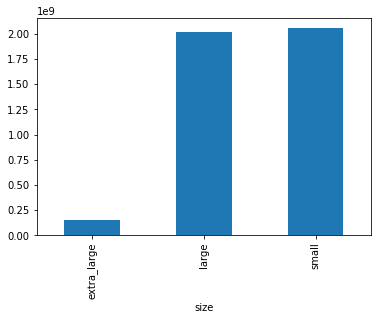

In [ ]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot( kind = "bar")

# Show the plot
plt.show()

**Changes in sales over time**

Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. They are especially useful for visualizing the change in a number over time since each time point is naturally connected to the next time point. In this exercise, you'll visualize the change in avocado sales over three years.

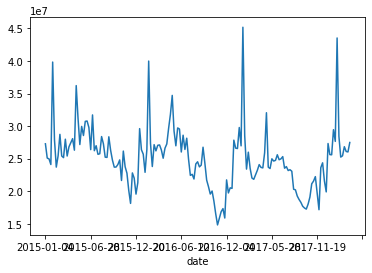

In [ ]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line")

# Show the plot
plt.show()

**Avocado supply and demand**

Scatter plots are ideal for visualizing relationships between numerical variables. In this exercise, you'll compare the number of avocados sold to average price and see if they're at all related. If they're related, you may be able to use one number to predict the other.

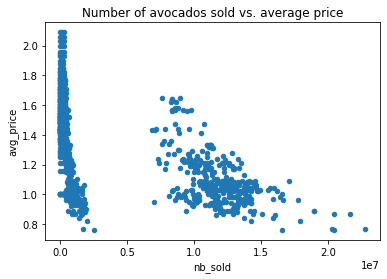

In [ ]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x="nb_sold", y="avg_price", kind="scatter", title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

**Price of conventional vs. organic avocados**

Creating multiple plots for different subsets of data allows you to compare groups. In this exercise, you'll create multiple histograms to compare the prices of conventional and organic avocados.

`matplotlib.pyplot` has been imported as `plt` and `pandas` has been imported as `pd`.

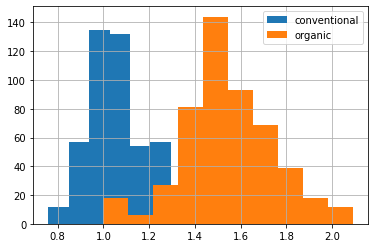

In [ ]:
# 1/3
# Histogram of conventional avg_price 
avocados[avocados["type"] == "conventional"]["avg_price"].hist()

# Histogram of organic avg_price
avocados[avocados["type"] == "organic"]["avg_price"].hist()

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

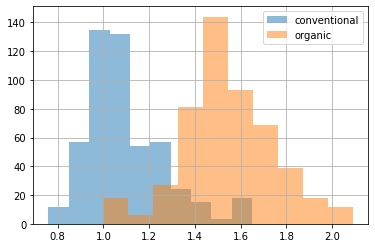

In [ ]:
# 2/3
# Modify histogram transparency to 0.5 
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5)

# Modify histogram transparency to 0.5
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

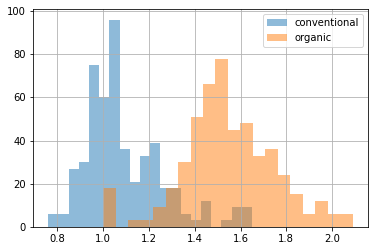

In [ ]:
# 3/3
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(bins=20, alpha=0.5)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(bins=20, alpha=0.5)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()


**Finding missing values**

Missing values are everywhere, and you don't want them interfering with your work. Some functions ignore missing data by default, but that's not always the behavior you might want. Some functions can't handle missing values at all, so these values need to be taken care of before you can use them. If you don't know where your missing values are, or if they exist, you could make mistakes in your analysis. In this exercise, you'll determine if there are missing values in the dataset, and if so, how many.

pandas has been imported as pd and avocados_2016, a subset of avocados that contains only sales from 2016, is available.

In [ ]:
import pandas as pd
avocados_2016 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data Manipulation with Pandas/avocados_2016.xlsx')
avocados_2016

,date,avg_price,total_sold,small_sold,large_sold,xl_sold,total_bags_sold,small_bags_sold,large_bags_sold,xl_bags_sold
0,2016-12-25,01:00:00,30290000000,9.255000e+09,1.028000e+10,5.420000e+08,10210000000,7710000000,2417000000,81101.22
1,2016-12-18,0.0666667,29580000000,9.394000e+09,1.034000e+10,4.279000e+08,9423000000,6970000000,2358000000,94011.78
2,2016-12-11,0.0680556,30090000000,9.010000e+09,NaN,4.030000e+08,10710000000,8149000000,2490000000,73342.82
3,2016-12-04,01:00:00,31620000000,1.104000e+10,9.909000e+09,4.280000e+08,10240000000,7187000000,2989000000,65350.63
4,2016-11-27,01:21:00,22920000000,7.891000e+09,7.337000e+09,NaN,7350000000,5691000000,1610000000,48623.28
5,2016-11-20,01:27:00,24990000000,NaN,8.034000e+09,4.076000e+08,8017000000,6207000000,1766000000,44709.40
6,2016-11-13,01:36:00,24080000000,8.235000e+09,7.760000e+09,4.775000e+08,7603000000,5603000000,1957000000,43104.31
7,2016-11-06,01:44:00,22530000000,7.804000e+09,NaN,5.053000e+08,7098000000,5245000000,1812000000,40918.74
8,2016-10-30,01:43:00,21010000000,7.100000e+09,6.852000e+09,4.531000e+08,6604000000,4655000000,1883000000,66283.51
9,2016-10-23,01:34:00,24750000000,7.580000e+09,8.105000e+09,4.524000e+08,8617000000,6509000000,2017000000,91798.83


     date  avg_price  ...  large_bags_sold  xl_bags_sold
0   False      False  ...            False         False
1   False      False  ...            False         False
2   False      False  ...            False         False
3   False      False  ...            False         False
4   False      False  ...            False         False
5   False      False  ...            False         False
6   False      False  ...            False         False
7   False      False  ...            False         False
8   False      False  ...            False         False
9   False      False  ...            False         False
10  False      False  ...            False         False
11  False      False  ...            False         False
12  False      False  ...            False         False
13  False      False  ...            False         False
14  False      False  ...            False         False
15  False      False  ...            False         False
16  False      False  ...      

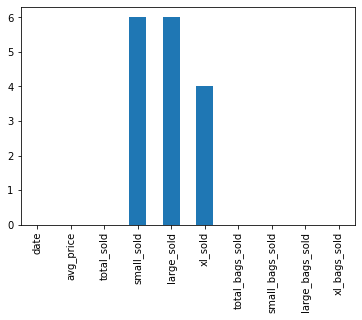

In [ ]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados_2016.isna())

# Check each column for missing values
print(avocados_2016.isna().any())

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind="bar")

# Show plot
plt.show()

**Removing missing values**

Now that you know there are some missing values in your DataFrame, you have a few options to deal with them. One way is to remove them from the dataset completely. In this exercise, you'll remove missing values by removing all rows that contain missing values.

`pandas` has been imported as `pd` and `avocados_2016` is available.

In [ ]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

date               False
avg_price          False
total_sold         False
small_sold         False
large_sold         False
xl_sold            False
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool


Delightful dropping! Removing observations with missing values is a quick and dirty way to deal with missing data, but this can introduce bias to your data if the values are not missing at random.

**Replacing missing values**

Another way of handling missing values is to replace them all with the same value. For numerical variables, one option is to replace values with 0— you'll do this here. However, when you replace missing values, you make assumptions about what a missing value means. In this case, you will assume that a missing number sold means that no sales for that avocado type were made that week.

In this exercise, you'll see how replacing missing values can affect the distribution of a variable using histograms. You can plot histograms for multiple variables at a time as follows:

`dogs[["height_cm", "weight_kg"]].hist()`

`pandas` has been imported as `pd` and `matplotlib.pyplot` has been imported as plt. The avocados_2016 dataset is available

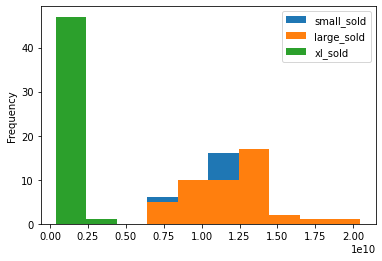

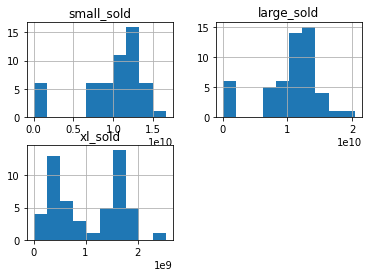

In [ ]:
# 1/2
# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Create histograms showing the distributions cols_with_missing
avocados_2016[cols_with_missing].plot(kind="hist")

# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Show the plot
plt.show()

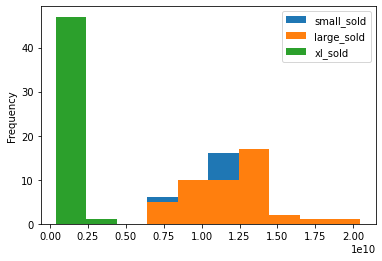

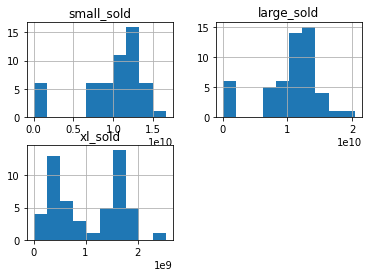

In [ ]:
# 2/2
# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Create histograms showing the distributions cols_with_missing
avocados_2016[cols_with_missing].plot(kind="hist")

# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Show the plot
plt.show()

Fabulous filling! Notice how the distribution has changed shape after replacing missing values with zeros.

**List of dictionaries**

You recently got some new avocado data from 2019 that you'd like to put in a DataFrame using the list of dictionaries method. Remember that with this method, you go through the data row by row.

`date`	              `small_sold`	               `large_sold`

`"2019-11-03"`	       `10376832`	                   `7835071`

`"2019-11-10"`       	 `10717154`	                   `8561348`

`pandas` as `pd` is imported.

In [ ]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348},]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


**Dictionary of lists**

Some more data just came in! This time, you'll use the dictionary of lists method, parsing the data column by column.

`date`	       `small_sold`	   `large_sold`

`"2019-11-17"`	`10859987`	    `7674135`

`"2019-12-01"`	`9291631`	`6238096`

pandas as pd is imported.

In [ ]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17","2019-12-01"],
  "small_sold": [10859987,9291631],
  "large_sold": [7674135,6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


**Excel to DataFrame**

You work for an airline, and your manager has asked you to do a competitive analysis and see how often passengers flying on other airlines are involuntarily bumped from their flights. You got a excel file (`airline_bumping.xlsx`) from the Department of Transportation containing data on passengers that were involuntarily denied boarding in 2016 and 2017, but it doesn't have the exact numbers you want. In order to figure this out, you'll need to get the `xlsx` into a pandas `DataFrame` and do some manipulation!

pandas is imported for you as pd. "`airline_bumping.xlsx`" is in your working directory.

In [ ]:
# 1/4
# Read CSV as DataFrame called airline_bumping
airline_bumping = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data Manipulation with Pandas/airline_bumping.xlsx")

# Take a look at the DataFrame
print(airline_bumping.head())



             airline  year  nb_bumped  total_passengers
0    DELTA AIR LINES  2017        679          99796155
1     VIRGIN AMERICA  2017        165           6090029
2    JETBLUE AIRWAYS  2017       1475          27255038
3    UNITED AIRLINES  2017       2067          70030765
4  HAWAIIAN AIRLINES  2017         92           8422734


In [ ]:
# 2/4
# From previous step
airline_bumping = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data Manipulation with Pandas/airline_bumping.xlsx")
print(airline_bumping.head())

# For each airline, select nb_bumped and total_passengers and sum
airline_totals = airline_bumping.groupby("airline")[["nb_bumped","total_passengers"]].sum()

             airline  year  nb_bumped  total_passengers
0    DELTA AIR LINES  2017        679          99796155
1     VIRGIN AMERICA  2017        165           6090029
2    JETBLUE AIRWAYS  2017       1475          27255038
3    UNITED AIRLINES  2017       2067          70030765
4  HAWAIIAN AIRLINES  2017         92           8422734


In [ ]:
# 3/4
# From previous steps
airline_bumping = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data Manipulation with Pandas/airline_bumping.xlsx")
print(airline_bumping.head())
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()

# Create new col, bumps_per_10k: no. of bumps per 10k passengers for each airline
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

             airline  year  nb_bumped  total_passengers
0    DELTA AIR LINES  2017        679          99796155
1     VIRGIN AMERICA  2017        165           6090029
2    JETBLUE AIRWAYS  2017       1475          27255038
3    UNITED AIRLINES  2017       2067          70030765
4  HAWAIIAN AIRLINES  2017         92           8422734


In [ ]:
# 4/4
# From previous steps
airline_bumping = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data Manipulation with Pandas/airline_bumping.xlsx")
print(airline_bumping.head())
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

# Print airline_totals
print(airline_totals)

             airline  year  nb_bumped  total_passengers
0    DELTA AIR LINES  2017        679          99796155
1     VIRGIN AMERICA  2017        165           6090029
2    JETBLUE AIRWAYS  2017       1475          27255038
3    UNITED AIRLINES  2017       2067          70030765
4  HAWAIIAN AIRLINES  2017         92           8422734
                     nb_bumped  total_passengers  bumps_per_10k
airline                                                        
ALASKA AIRLINES           1392          36543121       0.380920
AMERICAN AIRLINES        11115         197365225       0.563169
DELTA AIR LINES           1591         197033215       0.080748
EXPRESSJET AIRLINES       3326          27858678       1.193883
FRONTIER AIRLINES         1228          22954995       0.534960
HAWAIIAN AIRLINES          122          16577572       0.073593
JETBLUE AIRWAYS           3615          53245866       0.678926
SKYWEST AIRLINES          3094          47091737       0.657015
SOUTHWEST AIRLINES      

**DataFrame to CSV**

You're almost there! To make things easier to read, you'll need to sort the data and export it to CSV so that your colleagues can read it.

`pandas` as `pd` has been imported for you.

In [ ]:
# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values('bumps_per_10k', ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv("airline_totals_sorted.csv")

                     nb_bumped  total_passengers  bumps_per_10k
airline                                                        
EXPRESSJET AIRLINES       3326          27858678       1.193883
SPIRIT AIRLINES           2920          32304571       0.903897
SOUTHWEST AIRLINES       18585         228142036       0.814624
JETBLUE AIRWAYS           3615          53245866       0.678926
SKYWEST AIRLINES          3094          47091737       0.657015
AMERICAN AIRLINES        11115         197365225       0.563169
FRONTIER AIRLINES         1228          22954995       0.534960
ALASKA AIRLINES           1392          36543121       0.380920
UNITED AIRLINES           4941         134468897       0.367446
VIRGIN AMERICA             242          12017967       0.201365
DELTA AIR LINES           1591         197033215       0.080748
HAWAIIAN AIRLINES          122          16577572       0.073593


# **Joining Data with Pandas**


In [ ]:
def load_pascal_annotation(self, index):
        """
        Load image and bounding boxes info from XML file in the PASCAL VOC
        format.
        """

        imname = os.path.join(self.data_path, 'JPEGImages', index + '.jpg')
        im = cv2.imread(imname)
        h_ratio = 1.0 * self.image_size / im.shape[0]
        w_ratio = 1.0 * self.image_size / im.shape[1]
        # im = cv2.resize(im, [self.image_size, self.image_size])

        label = np.zeros((self.cell_size, self.cell_size, 25))
        filename = os.path.join(
            self.data_path, 'Annotations', index + '.xml')
        tree = ET.parse(filename)
        objs = tree.findall('object')

        for obj in objs:
            bbox = obj.find('bndbox')
            # Make pixel indexes 0-based
            x1 = max(min((float(bbox.find('xmin').text) - 1)
                         * w_ratio, self.image_size - 1), 0)
            y1 = max(min((float(bbox.find('ymin').text) - 1)
                         * h_ratio, self.image_size - 1), 0)
            x2 = max(min((float(bbox.find('xmax').text) - 1)
                         * w_ratio, self.image_size - 1), 0)
            y2 = max(min((float(bbox.find('ymax').text) - 1)
                         * h_ratio, self.image_size - 1), 0)
            cls_ind = self.class_to_ind[obj.find(
                'name').text.lower().strip()]
            boxes = [(x2 + x1) / 2.0, (y2 + y1) / 2.0, x2 - x1, y2 - y1]
            x_ind = int(boxes[0] * self.cell_size / self.image_size)
            y_ind = int(boxes[1] * self.cell_size / self.image_size)
            if label[y_ind, x_ind, 0] == 1:
                continue
            label[y_ind, x_ind, 0] = 1
            label[y_ind, x_ind, 1:5] = boxes
            label[y_ind, x_ind, 5 + cls_ind] = 1

        return label, len(objs) 

**Chapter 4 Merging Ordered and Time-Series Data**

**Correlation between GDP and S&P500**

In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

Two tables have been provided for you, named `sp500`, and `gdp`. As always, pandas has been imported for you as `pd`.

In [ ]:
import pandas as pd
gdp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Joining Data with Pandas/WorldBank_GDP.csv')
gdp

,Country Name,Country Code,Indicator Name,Year,GDP
0,China,CHN,GDP (current US$),2010,6.087160e+12
1,Germany,DEU,GDP (current US$),2010,3.417090e+12
2,Japan,JPN,GDP (current US$),2010,5.700100e+12
3,United States,USA,GDP (current US$),2010,1.499210e+13
4,China,CHN,GDP (current US$),2011,7.551500e+12
5,Germany,DEU,GDP (current US$),2011,3.757700e+12
6,Japan,JPN,GDP (current US$),2011,6.157460e+12
7,United States,USA,GDP (current US$),2011,1.554260e+13
8,China,CHN,GDP (current US$),2012,8.532230e+12
9,Germany,DEU,GDP (current US$),2012,3.543980e+12


In [ ]:
import pandas as pd
sp500 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Joining Data with Pandas/S&P500.csv')
sp500


,Date,Returns
0,2008,-38.49
1,2009,23.45
2,2010,12.78
3,2011,NaN
4,2012,13.41
5,2014,11.39
6,2015,-0.73
7,2016,9.54
8,2017,19.42
9,2013,29.60


In [ ]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', how='left')

# Print gdp_sp500
print(gdp_sp500)

     Country Name Country Code  ...    Date  Returns
0           China          CHN  ...  2010.0    12.78
1         Germany          DEU  ...  2010.0    12.78
2           Japan          JPN  ...  2010.0    12.78
3   United States          USA  ...  2010.0    12.78
4           China          CHN  ...  2011.0      NaN
5         Germany          DEU  ...  2011.0      NaN
6           Japan          JPN  ...  2011.0      NaN
7   United States          USA  ...  2011.0      NaN
8           China          CHN  ...  2012.0    13.41
9         Germany          DEU  ...  2012.0    13.41
10          Japan          JPN  ...  2012.0    13.41
11  United States          USA  ...  2012.0    13.41
12          China          CHN  ...  2012.0    13.41
13        Germany          DEU  ...  2012.0    13.41
14          Japan          JPN  ...  2012.0    13.41
15  United States          USA  ...  2012.0    13.41
16          China          CHN  ...  2013.0    29.60
17        Germany          DEU  ...  2013.0   

In [ ]:
# 2/3
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', 
                             how='left',  fill_method='ffill')

# Print gdp_sp500
print (gdp_sp500)

     Country Name Country Code     Indicator Name  ...           GDP  Date  Returns
0           China          CHN  GDP (current US$)  ...  6.087160e+12  2010    12.78
1         Germany          DEU  GDP (current US$)  ...  3.417090e+12  2010    12.78
2           Japan          JPN  GDP (current US$)  ...  5.700100e+12  2010    12.78
3   United States          USA  GDP (current US$)  ...  1.499210e+13  2010    12.78
4           China          CHN  GDP (current US$)  ...  7.551500e+12  2011      NaN
5         Germany          DEU  GDP (current US$)  ...  3.757700e+12  2011      NaN
6           Japan          JPN  GDP (current US$)  ...  6.157460e+12  2011      NaN
7   United States          USA  GDP (current US$)  ...  1.554260e+13  2011      NaN
8           China          CHN  GDP (current US$)  ...  8.532230e+12  2012    13.41
9         Germany          DEU  GDP (current US$)  ...  3.543980e+12  2012    13.41
10          Japan          JPN  GDP (current US$)  ...  6.203210e+12  2012  

In [ ]:
# 3/3
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['GDP', 'Returns']]

# Print gdp_returns correlation
print (gdp_returns.corr())

              GDP   Returns
GDP      1.000000  0.019167
Returns  0.019167  1.000000


              gdp   returns
gdp      1.000000  0.212173

returns  0.212173  1.000000

**Phillips curve using merge_ordered()**

There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

The tables `unemployment` and `inflation` have been loaded for you.

In [ ]:
import pandas as pd
inflation = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Joining Data with Pandas/inflation.xlsx')
inflation


,date,cpi,seriesid,data_type
0,2014-01-01,235288,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
1,2014-02-01,235547,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
2,2014-03-01,236028,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
3,2014-04-01,236468,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
4,2014-05-01,236918,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
5,2014-06-01,237231,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
6,2014-07-01,237498,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
7,2014-08-01,237460,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
8,2014-09-01,237477,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
9,2014-10-01,237430,CUSR0000SA0,SEASONALLY ADJUSTED INDEX


In [ ]:
unemployment = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Joining Data with Pandas/unemployment.xlsx')
unemployment

,date,unemployment_rate
0,2013-06-01,7.5
1,2014-01-01,6.7
2,2014-06-01,6.1
3,2015-01-01,5.6
4,2015-06-01,5.3
5,2016-01-01,5.0
6,2016-06-01,4.9
7,2017-01-01,4.7
8,2017-06-01,4.3
9,2018-01-01,4.1


        date     cpi     seriesid                  data_type  unemployment_rate
0 2014-01-01  235288  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                6.7
1 2014-06-01  237231  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                6.1
2 2015-01-01  234718  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                5.6
3 2015-06-01  237684  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                5.3
4 2016-01-01  237833  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                5.0
5 2016-06-01  240167  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                4.9
6 2017-01-01  243780  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                4.7
7 2017-06-01  244182  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                4.3
8 2018-01-01  248884  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                4.1
9 2018-06-01  251134  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                4.0


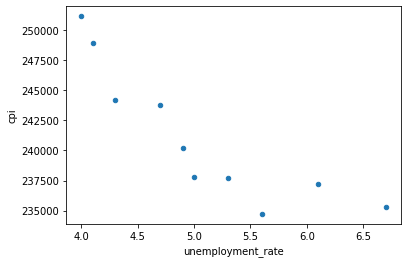

In [ ]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on='date', how='inner')

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(x='unemployment_rate', y='cpi' , kind='scatter')
plt.show()

**merge_ordered() caution, multiple columns**

When using merge_ordered() to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for the Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

The tables `gdp` and `pop` have been loaded.

In [ ]:
pop = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Joining Data with Pandas/pop.xlsx')
pop

,date,country,pop,series_code
0,1990-01-01,Australia,17065100,SP.POP.TOTL
1,1991-01-01,Australia,17284000,SP.POP.TOTL
2,1992-01-01,Australia,17495000,SP.POP.TOTL
3,1993-01-01,Australia,17667000,SP.POP.TOTL
4,1990-01-01,Sweden,8558835,SP.POP.TOTL
5,1991-01-01,Sweden,8617375,SP.POP.TOTL
6,1992-01-01,Sweden,8668067,SP.POP.TOTL
7,1993-01-01,Sweden,8718561,SP.POP.TOTL


In [ ]:
gdp1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Joining Data with Pandas/gdp1.xlsx')
gdp1

,date,country,gdp,series_code
0,1990-01-01,Australia,158051.13240,NYGDPMKTPSAKD
1,1990-04-01,Australia,158263.58160,NYGDPMKTPSAKD
2,1990-07-01,Australia,157329.27900,NYGDPMKTPSAKD
3,1990-09-01,Australia,158240.67810,NYGDPMKTPSAKD
4,1991-01-01,Australia,156195.95350,NYGDPMKTPSAKD
5,1991-04-01,Australia,155989.03270,NYGDPMKTPSAKD
6,1991-07-01,Australia,156635.85760,NYGDPMKTPSAKD
7,1991-09-01,Australia,156744.05660,NYGDPMKTPSAKD
8,1992-01-01,Australia,157916.08110,NYGDPMKTPSAKD
9,1992-04-01,Australia,159047.82710,NYGDPMKTPSAKD


In [ ]:
# 1/2
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp1, pop, on=['date', 'country'], 
                             fill_method='ffill')

# Print ctry_date
print(ctry_date)

         date    country           gdp  series_code_x       pop series_code_y
0  1990-01-01  Australia  158051.13240  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
1  1990-01-01     Sweden   79837.84599  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
2  1990-04-01  Australia  158263.58160  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
3  1990-04-01     Sweden   80582.28597  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
4  1990-07-01  Australia  157329.27900  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
5  1990-07-01     Sweden   79974.36017  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
6  1990-09-01  Australia  158240.67810  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
7  1990-09-01     Sweden   80106.49738  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
8  1991-01-01  Australia  156195.95350  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
9  1991-01-01     Sweden   79524.24192  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
10 1991-04-01  Australia  155989.03270  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
11 1991-04-01     Sweden   79073.05901  NYGDPMKTPSAKD   8617375 

In [ ]:
# 2/2
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp1, pop, on=['country', 'date', ], fill_method='ffill')

# Print date_ctry
print(date_ctry)

         date    country           gdp  series_code_x       pop series_code_y
0  1990-01-01  Australia  158051.13240  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
1  1990-04-01  Australia  158263.58160  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
2  1990-07-01  Australia  157329.27900  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
3  1990-09-01  Australia  158240.67810  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
4  1991-01-01  Australia  156195.95350  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
5  1991-04-01  Australia  155989.03270  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
6  1991-07-01  Australia  156635.85760  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
7  1991-09-01  Australia  156744.05660  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
8  1992-01-01  Australia  157916.08110  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
9  1992-04-01  Australia  159047.82710  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
10 1992-07-01  Australia  160658.17600  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
11 1992-09-01  Australia  163960.22070  NYGDPMKTPSAKD  17495000 

**Using merge_asof() to study stocks**

You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the `pandas` `.diff()` method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

The three log files have been loaded for you as tables named `jpm`, `wells`, and `bac`.

In [ ]:
import pandas as pd
bac = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Joining Data with Pandas/bac.xlsx')
bac

,date_time,close
0,2017-11-17 15:35:17,26.552
1,2017-11-17 15:40:06,26.552
2,2017-11-17 15:45:05,26.388
3,2017-11-17 15:50:34,26.378
4,2017-11-17 15:55:06,26.383
5,2017-11-17 16:00:18,26.452
6,2017-11-17 16:05:20,26.373
7,2017-11-17 16:10:05,26.388
8,2017-11-17 16:15:07,26.369
9,2017-11-17 16:20:29,26.388


In [ ]:
jpm = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Joining Data with Pandas/jpm_wells.xlsx')
jpm

,date_time,close
0,2017-11-17 15:35:17,98.1200
1,2017-11-17 15:40:06,98.1800
2,2017-11-17 15:45:05,97.7307
3,2017-11-17 15:50:34,97.7400
4,2017-11-17 15:55:06,97.8150
5,2017-11-17 16:00:18,98.0200
6,2017-11-17 16:05:20,97.8000
7,2017-11-17 16:10:05,97.8400
8,2017-11-17 16:15:07,97.7100
9,2017-11-17 16:20:29,97.7600


In [ ]:
wells = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Joining Data with Pandas/wells.xlsx')
wells

,date_time,close
0,2017-11-17 15:35:17,54.3227
1,2017-11-17 15:40:06,54.3200
2,2017-11-17 15:45:05,54.1900
3,2017-11-17 15:50:34,54.1700
4,2017-11-17 15:55:06,54.1841
5,2017-11-17 16:00:18,54.2650
6,2017-11-17 16:05:20,54.2000
7,2017-11-17 16:10:05,54.1550
8,2017-11-17 16:15:07,54.1900
9,2017-11-17 16:20:29,54.2050


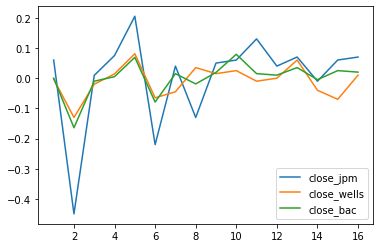

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', suffixes=('', '_wells'), direction='nearest')

# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on=['date_time'], suffixes=('_jpm', '_bac'), direction='nearest')


# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'])
plt.show()


**Using merge_asof() to create dataset**

The `merge_asof()` function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given gdp, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table recession has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use `merge_asof()` to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.

The tables `gdp` and `recession` have been loaded for you.

In [ ]:
gdp80 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Joining Data with Pandas/gdp80.xlsx')
gdp80

,date,gdp
0,1979-01-01,2526.610
1,1979-04-01,2591.247
2,1979-07-01,2667.565
3,1979-10-01,2723.883
4,1980-01-01,2789.842
5,1980-04-01,2797.352
6,1980-07-01,2856.483
7,1980-10-01,2985.557
8,1981-01-01,3124.206
9,1981-04-01,3162.532


In [ ]:
recession = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Joining Data with Pandas/recession.xlsx')
recession

,date,econ_status
0,1980-01-01,recession
1,1980-08-01,normal
2,1981-07-01,recession
3,1982-12-01,normal
4,1990-07-01,recession
5,1991-04-01,normal
6,2001-03-01,recession
7,2001-12-01,normal
8,2007-12-01,recession
9,2009-07-01,normal


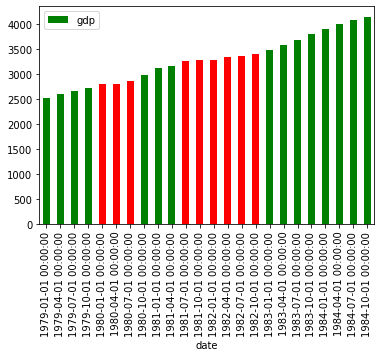

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Merge gdp and recession on date using merge_asof()
gdp80_recession = pd.merge_asof(gdp80, recession, on='date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp80_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp80_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()

Terrific work! You can see from the chart that there were a number of quarters early in the 1980s where a recession was an issue. `merge_asof()` allowed you to quickly add a flag to the gdp dataset by matching between two different dates, in one line of code! If you were to perform the same task using subsetting, it would have taken a lot more code.

**merge_asof() and merge_ordered() differences**

The `merge_asof()` and `merge_ordered()` functions are similar in the type of merge they perform and the input arguments they use. In this exercise, think about how the functions are different.

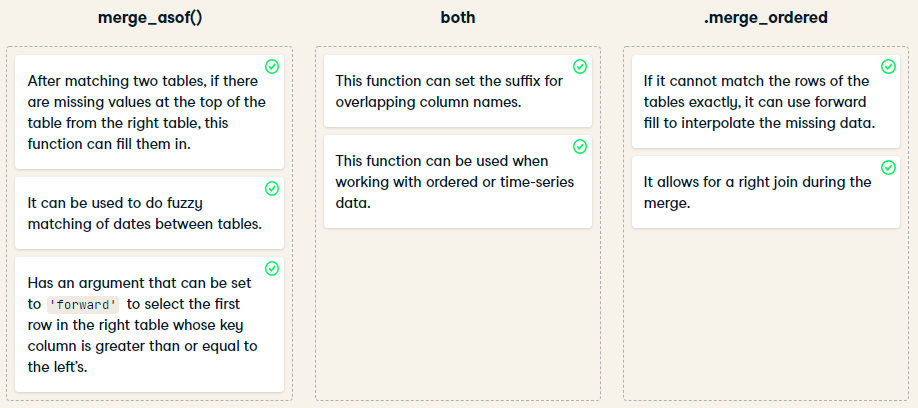

**Explore financials with .query()**

You have been given a table of financial data from some popular social network companies called social_fin. All of the values are in thousands of US dollars.

Use the `.query()` method and the console to explore `social_fin` and select the True statement.


`social_fin.query('value < 0')`
* ans : There are 6 rows where the net income has a negative value.

**Subsetting rows with .query()**

In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the `.query()` method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the `.query()` method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.

The tables `gdp` and `pop` have been loaded for you.

In [ ]:
# 1/4
gdp1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Joining Data with Pandas/gdp1.xlsx')
pop = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Joining Data with Pandas/pop.xlsx')

# Merge gdp and pop on date and country with fill
gdp1_pop = pd.merge_ordered(gdp1, pop, on=['country','date'], fill_method='ffill')

In [ ]:
# 2/4
# Merge gdp and pop on date and country with fill
gdp1_pop = pd.merge_ordered(gdp1, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp1_pop['gdp_per_capita'] = gdp1_pop['gdp'] / gdp1_pop['pop']

In [ ]:
# 3/4
# Merge gdp and pop on date and country with fill
gdp1_pop = pd.merge_ordered(gdp1, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp1_pop['gdp_per_capita'] = gdp1_pop['gdp'] / gdp1_pop['pop']

# Pivot table of gdp_per_capita, where index is date and columns is country
gdp1_pivot = gdp1_pop.pivot_table('gdp_per_capita', 'date', 'country')

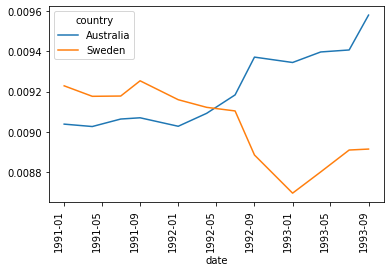

In [ ]:
# 4/4
import matplotlib.pyplot as plt
import pandas as pd

# Merge gdp and pop on date and country with fill
gdp1_pop = pd.merge_ordered(gdp1, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp1_pop['gdp_per_capita'] = gdp1_pop['gdp'] / gdp1_pop['pop']

# Pivot data so gdp_per_capita, where index is date and columns is country
gdp1_pivot = gdp1_pop.pivot_table('gdp_per_capita', 'date', 'country')

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp1_pivot.query('date>="1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

**Select the right .melt() arguments**

You are given a table named inflation. Chose the option to get the same output as the table below.

In [ ]:
inflation = pd.DataFrame({'country' : ['Brazil', 'Canada', 'France', 'India', 'Brazil', 'Canada', 'France', 'India', 'Brazil', 'Canada', 'France', 'India'], 'indicator': ['Inflation %', 'Inflation %', 'Inflation %', 'Inflation %', 'Inflation %', 'Inflation %', 'Inflation %', 'Inflation %', 'Inflation %', 'Inflation %', 'Inflation %', 'Inflation %'], 'year' : [2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019], 'annual' : [3.45, 1.60, 1.03, 2.49, 3.66, 2.27, 1.85, 4.86, 3.73, 1.95, 1.11, 7.66] })
inflation


,country,indicator,year,annual
0,Brazil,Inflation %,2017,3.45
1,Canada,Inflation %,2017,1.60
2,France,Inflation %,2017,1.03
3,India,Inflation %,2017,2.49
4,Brazil,Inflation %,2018,3.66
5,Canada,Inflation %,2018,2.27
6,France,Inflation %,2018,1.85
7,India,Inflation %,2018,4.86
8,Brazil,Inflation %,2019,3.73
9,Canada,Inflation %,2019,1.95




`inflation.melt(id_vars=['country','indicator'], var_name='year', value_name='annual')`

**Using .melt() to reshape government data**

The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using `.melt()`. You will need to add a date column to the table and sort by it to plot the data correctly.

The unemployment rate data has been loaded for you in a table called `ur_wide`. You are encouraged to view the table in the console before beginning the exercise.

In [ ]:
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars=['year'], var_name='month', value_name='unempl_rate')


# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'] + '-' + ur_tall['month'])

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values(by='date')

# Plot the unempl_rate by date
ur_sorted.plot(x='date', y='unempl_rate')
plt.show()

In [ ]:
In [2]:
ur_wide
Out[2]:

    year  jan  feb  mar  apr  ...  aug  sep  oct  nov  dec
0   2010  9.8  9.8  9.9  9.9  ...  9.5  9.5  9.4  9.8  9.3
1   2011  9.1  9.0  9.0  9.1  ...  9.0  9.0  8.8  8.6  8.5
2   2012  8.3  8.3  8.2  8.2  ...  8.1  7.8  7.8  7.7  7.9
3   2013  8.0  7.7  7.5  7.6  ...  7.2  7.2  7.2  6.9  6.7
4   2014  6.6  6.7  6.7  6.2  ...  6.1  5.9  5.7  5.8  5.6
5   2015  5.7  5.5  5.4  5.4  ...  5.1  5.0  5.0  5.1  5.0
6   2016  4.9  4.9  5.0  5.0  ...  4.9  5.0  4.9  4.7  4.7
7   2017  4.7  4.6  4.4  4.4  ...  4.4  4.2  4.1  4.2  4.1
8   2018  4.1  4.1  4.0  4.0  ...  3.8  3.7  3.8  3.7  3.9
9   2019  4.0  3.8  3.8  3.6  ...  3.7  3.5  3.6  3.5  3.5
10  2020  3.6  3.5  4.4  NaN  ...  NaN  NaN  NaN  NaN  NaN

[11 rows x 13 columns]

**Using .melt() for stocks vs bond performance**

It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the .melt() method to reshape this table.

Additionally, you will use the `.query()` method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

The tables `ten_yr` and `dji` have been loaded for you. (cant load)

In [ ]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars=['metric'], var_name='date', value_name='close')

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric=="close"')

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on='date', how='inner', suffixes=['_dow', '_bond'])


# Plot only the close_dow and close_bond columns
dow_bond.plot(y=['close_dow', 'close_bond'], x='date', rot=90)
plt.show()

# **Working with Categorical Data in Python**

In [ ]:
https://github.com/josemqv/python-Working-with-Categorical-Data-in-Python

**Intro**

1. Course introduction
Hello and welcome to another course from DataCamp. Our primary objective for this course is to learn how to work with categorical data in Python. My name is Kasey Jones and I am thrilled that you have decided to join me. Let's jump right in.

2. What does it mean to be "categorical"?
A variable is usually considered categorical if it contains a finite number of distinct groups - or categories. Generally, the number of categories and the corresponding names are already known. In research fields, this type of data is also known as qualitative data. On the other hand, numerical data, also know as quantitative data, is expressed using a value and is usually in the form of a measurement. This course is completely focused on working with categorical data.

3. Ordinal vs. nominal variables
Categorical data can be further broken down into two different types, ordinal and nominal. You can think of ordinal variables as having an order. When categories within a variable have a natural rank order, the variable is considered ordinal. We have all filled out surveys that have ordinal options, such as choices ranging from strongly disagree up through strongly agree. On the flip side, nominal variables are those that cannot be placed into a natural order. A good example here is when a survey asks what your favorite color is from a list of options.

4. Our first dataset
To begin working with categorical variables, let's take a look at our first dataset. The adult census income dataset contains information on US adults and whether or not an adult makes over $50,000 annually. We have used the pandas method info to take a look at the dataset's variables and their data types, or dtypes for short. We quickly see that there are over 32,000 entries and 15 total columns. Take a look at the marital status column, which has the dtype - object. A dtype of object is how pandas stores strings and is a good indicator that a variable might be categorical.

1 https://www.kaggle.com/uciml/adult-census-income
5. Using describe
We can explore the marital status column in more detail by using the describe method on the pandas Series Marital Status. We see that there are seven unique values, with the married-civ-spouse option being the most common entry with almost 15,000 occurrences.

6. Using value counts
Another way to explore the marital status column is to use the value counts method. This method prints out a frequency table of the values found in a pandas Series. We still see the 15,000 entries for married-civ-spouse, but we also see the remaining counts for each unique value in the marital status column.

7. Using value counts with normalize
Although the value counts method has a few parameters, the most commonly used parameter is definitely normalize. By setting normalize to equal True, the output will contain relative frequency values instead of the counts of the unique values. The values shown are the proportions of all responses in a pandas Series that equal to a specific value. In this example, married-civ-spouse makes up 46% of all responses.

8. Knowledge check
Lets recap the different types of data we have discussed by working through a couple of exercises.

In [ ]:
import pandas as pd
adult = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/14. Working with Categorical Data in Python/adult.csv')
adult

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**1.7 Create lots of groups**

You want to find the mean Age of adults when grouping by the following categories:

* "Workclass" (which has 9 categories)
* "Above/Below 50k" (which has 2 categories)
* "Education" (which has 16 categories).

You have developed the following bit of code:

`gb = adult.groupby(by=["Workclass", "Above/Below 50k", "Education"])`

How many groups are in the `gb` object and what is the maximum possible number of groups that could have been created? The dataset `adult`, and the `gb` object have been preloaded for you.

**ans** -> 208 are created out of 288 possible groups.

Only combinations of the three variables that exist are created when using `groupby()`. In this example, 208 groups are created out of 288 *(2 * 9 * 16)* possible groups.

**1.8 Setting up a .groupby() statement**

The gender wage gap is a hot-topic item in the United States and across the world. Using the adult census income dataset, loaded as `adult`, you want to check if some of the recently published data lines up with this income survey.

In [ ]:
import pandas as pd

# Group the adult dataset by "Sex" and "Above/Below 50k"
gb = adult.groupby(by=["Sex", "Above/Below 50k"])

# Print out how many rows are in each created group
print(gb.size())

# Print out the mean of each group for all columns
print(gb.mean())

Sex      Above/Below 50k
 Female   <=50K              9592
          >50K               1179
 Male     <=50K             15128
          >50K               6662
dtype: int64
                               Age         fnlgwt  ...  Capital Loss  Hours/Week
Sex     Above/Below 50k                            ...                          
 Female  <=50K           36.210801  185999.381359  ...     47.364470   35.916701
         >50K            42.125530  183687.406277  ...    173.648855   40.426633
 Male    <=50K           37.147012  193093.609268  ...     56.806782   40.693879
         >50K            44.625788  188769.101321  ...    198.780396   46.366106

[4 rows x 6 columns]


It does look like the proportion of women making more than 50k is a lot lower than men. However, women making more than 50k are on average younger than their male counterparts

**1.9 Using pandas functions effectively**

You are creating a Python application that will calculate summary statistics based on user-selected variables. The complete dataset is quite large. For now, you are setting up your code using part of the dataset, preloaded as `adult`. As you create a reusable process, make sure you are thinking through the most efficient way to setup the `GroupBy` object.

In [ ]:
# Create a list of user-selected variables
user_list = ["Education", "Above/Below 50k"]

# Create a GroupBy object using this list
gb = adult.groupby(by=user_list)

# Find the mean for the variable "Hours/Week" for each group - Be efficient!
print(gb["Hours/Week"].mean())

Education      Above/Below 50k
 10th           <=50K             36.574053
                >50K              43.774194
 11th           <=50K             33.322870
                >50K              45.133333
 12th           <=50K             35.035000
                >50K              44.818182
 1st-4th        <=50K             37.864198
                >50K              48.833333
 5th-6th        <=50K             38.539432
                >50K              46.000000
 7th-8th        <=50K             38.830033
                >50K              47.500000
 9th            <=50K             37.667351
                >50K              44.851852
 Assoc-acdm     <=50K             39.264339
                >50K              44.256604
 Assoc-voc      <=50K             40.817826
                >50K              43.853186
 Bachelors      <=50K             40.586152
                >50K              45.475462
 Doctorate      <=50K             45.429907
                >50K              47.513072
 

*People earning more than `$50,000 `
tend to work a lot more hours, regardless of their education, than people earning less than `$50,000`. Remember, it's important to select your variables before calling a function. Large datatsets might have problems calculating the mean of every numerical column*

**Chapter 2 categorical pandas Series**

**2.1 Setting categories**

After exploring the pandas Series "`size`" from the adoptable dogs dataset, you have decided that it should be an ordinal categorical variable. Creating such a variable takes a few steps. If these steps are performed out of order, you may not be able to access or use the necessary methods. The goal is to convert the "`size`" column from the dogs dataset into a ordered categorical pandas Series with the following `categories: ["small", "medium", "large"]`.

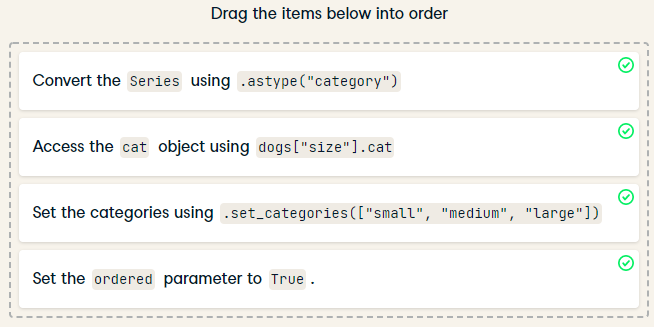

In [ ]:
dogs

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
0,23807,Gida,0.25,female,Unknown Mix,12/10/19,12/11/19,12/11/19,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,533,Frida És Ricsi,0.17,female,Unknown Mix,12/1/19,12/1/19,12/9/19,black and white,short,small,no,NaN,yes,yes,yes,yes,yes,NaN
2,23793,NaN,4.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23795,NaN,1.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23806,Amy,2.00,female,French Bulldog Mix,12/10/19,12/11/19,12/11/19,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,118,Fodri,16.92,male,Unknown Mix,12/25/03,12/25/03,3/22/06,yellow-brown,short,medium,no,no,yes,yes,no,yes,no,garden
2933,262,Csibi,17.33,female,Staffordshire Terrier Mix,8/27/04,8/27/04,7/8/05,striped,short,large,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2934,4,Konrád,18.17,male,Unknown Mix,9/21/05,9/21/05,10/26/05,black,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2935,141,Kölni,17.17,male,Unknown Mix,11/27/04,11/27/04,5/2/05,black and brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2937 entries, 0 to 2936
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ID                 2937 non-null   int64   
 1   name               2845 non-null   object  
 2   age                2937 non-null   float64 
 3   sex                2937 non-null   object  
 4   breed              2937 non-null   object  
 5   date_found         2937 non-null   object  
 6   adoptable_from     2937 non-null   object  
 7   posted             2937 non-null   object  
 8   color              2937 non-null   object  
 9   coat               2937 non-null   object  
 10  size               2937 non-null   object  
 11  neutered           1852 non-null   object  
 12  housebroken        460 non-null    object  
 13  likes_people       1999 non-null   object  
 14  likes_children     1219 non-null   object  
 15  get_along_males    1633 non-null   object  
 16  get_al

**2.3 Adding categories**

The owner of a local dog adoption agency has listings for almost 3,000 dogs. One of the most common questions they have been receiving lately is: "What type of area was the dog previously kept in?". You are setting up a pipeline to do some analysis and want to look into what information is available regarding the "`keep_in`" variable. Both pandas, as `pd`, and the `dogs` dataset have been preloaded.

In [ ]:
import pandas as pd
dogs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/14. Working with Categorical Data in Python/ShelterDogs.csv')
# Check frequency counts while also printing the NaN count
print(dogs["keep_in"].value_counts(dropna=False))

# Switch to a categorical variable
dogs["keep_in"] = dogs["keep_in"].astype("category")

# Add new categories
new_categories = ["Unknown History", "Open Yard (Countryside)"]
dogs["keep_in"] = dogs["keep_in"].cat.add_categories(new_categories)

# Check frequency counts one more time
print(dogs["keep_in"].value_counts(dropna=False))

both flat and garden    1224
NaN                     1021
garden                   510
flat                     182
Name: keep_in, dtype: int64
both flat and garden       1224
NaN                        1021
garden                      510
flat                        182
Open Yard (Countryside)       0
Unknown History               0
Name: keep_in, dtype: int64


In [ ]:
dogs["likes_children"] = dogs["likes_children"].astype("category")
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2937 entries, 0 to 2936
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ID                 2937 non-null   int64   
 1   name               2845 non-null   object  
 2   age                2937 non-null   float64 
 3   sex                2937 non-null   object  
 4   breed              2937 non-null   object  
 5   date_found         2937 non-null   object  
 6   adoptable_from     2937 non-null   object  
 7   posted             2937 non-null   object  
 8   color              2937 non-null   object  
 9   coat               2937 non-null   object  
 10  size               2937 non-null   object  
 11  neutered           1852 non-null   object  
 12  housebroken        460 non-null    object  
 13  likes_people       1999 non-null   object  
 14  likes_children     1219 non-null   category
 15  get_along_males    1633 non-null   object  
 16  get_al

*When the adoption agency starts adding more information to this column, they will need to use one of the five categories now available in the '`keep_in`' variable.*

**2.3 Removing categories**

Before adopting dogs, parents might want to know whether or not a new dog likes children. When looking at the adoptable dogs dataset, `dogs`, you notice that the frequency of responses for the categorical Series "`likes_children`" looks like this:

* maybe     1718
* yes       1172
* no          47

The owner of the data wants to convert all "`maybe`" responses to "`no`", as it would be unsafe to let a family adapt a dog if it doesn't like children. The code to convert all "`maybe`" to "`no`" is provided in Step 1. However, the option for "`maybe`" still remains as a category.

In [ ]:

# Set "maybe" to be "no"
dogs.loc[dogs["likes_children"] == "maybe", "likes_children"] = "no"

# Print out categories
print(dogs["likes_children"].cat.categories)

# Print the frequency table
print(dogs["likes_children"].value_counts())

# Remove the "maybe" category
dogs["likes_children"] = dogs["likes_children"].cat.remove_categories(["maybe"])
print(dogs["likes_children"].value_counts())

# Print the categories one more time
print(dogs["likes_children"].cat.categories)

Index(['no', 'yes'], dtype='object')
yes    1172
no       47
Name: likes_children, dtype: int64


ValueError: ignored

*Telling parents that a dog '`maybe`' likes children isn't helpful. To be on the safe side, the adoption agency has decided to remove maybe as an option. You can now do your analysis without worrying about '`Maybe?`' showing up in the data.*

Collapsing categories knowledge check

You are working with a categorical column that has ten different responses. You want to collapse this into a new categorical column that only has three categories, instead of ten. What is the easiest method to use for this update?


**Use `pd.Series().replace()` and then convert the column back to categorical using `.astype('category')`.**

**2.4 Renaming categories**

The likes_children column of the adoptable dogs dataset needs an update. Here are the current frequency counts:

* Maybe?    1718
* yes       1172
* no          47

Two things that stick out are the differences in capitalization and the ? found in the Maybe? category. The data should be cleaner than this and you are being asked to make a few changes.

In [ ]:
import pandas as pd

# Create the my_changes dictionary
my_changes = {"Maybe?": "Maybe"}

# Rename the categories listed in the my_changes dictionary
dogs["likes_children"] = dogs["likes_children"].cat.rename_categories(my_changes)

# Use a lambda function to convert all categories to uppercase using upper()
dogs["likes_children"] =  dogs["likes_children"].cat.rename_categories(lambda c: c.upper())

# Print the list of categories
print(dogs["likes_children"].cat.categories)

Index(['NO', 'YES'], dtype='object')


*Using two steps, we have completly updated the `likes_children` pandas Series. You can use these few steps to clean up categorical columns before performing your analysis.*

**2.5 Collapsing categories**

One problem that users of a local dog adoption website have voiced is that there are too many options. As they look through the different types of dogs, they are getting lost in the overwhelming amount of choice. To simplify some of the data, you are going through each column and collapsing data if appropriate. To preserve the original data, you are going to make new updated columns in the dogs dataset. You will start with the coat column. The frequency table is listed here:

* short          1969
* medium          565
* wirehaired      220
* long            180
* medium-long       3

In [ ]:
import pandas as pd

# Create the update_coats dictionary
update_coats = {
  "wirehaired": "medium",
  "medium-long": "medium"
}

# Create a new column, coat_collapsed
dogs["coat_collapsed"] = dogs["coat"].replace(update_coats)

# Convert the column to categorical
dogs["coat_collapsed"] = dogs["coat_collapsed"].astype("category")

# Print the frequency table
print(dogs["coat_collapsed"].value_counts())

short     1972
medium     785
long       180
Name: coat_collapsed, dtype: int64


*By collapsing four categories down to three, you have simplified your data. If you repeat this across several columns, the total combination of categories across these variables will be greatly reduced.*

**Reordering categories**

**2.6 Reordering categories in a Series**

The owner of a local dog adoption agency has asked you take a look at her data on adoptable dogs. She is specifically interested in the size of the dogs in her dataset and wants to know if there are differences in other variables, given a dog's size. The adoptable dogs dataset has been loaded as `dogs` and the "`size`" variable has already been saved as a categorical column.

In [ ]:
dogs["size"] = dogs["size"].astype("category")

In [ ]:
import pandas as pd

# Print out the current categories of the size variable
print(dogs["size"].cat.categories)

# Reorder the categories, specifying the Series is ordinal, and overwriting the original series
dogs["size"].cat.reorder_categories(new_categories=["small", "medium", "large"],ordered=True,inplace=True)

Index(['large', 'medium', 'small'], dtype='object')


In [ ]:
# Print out the current categories of the size variable
print(dogs["size"].cat.categories)

# Reorder the categories, specifying the Series is ordinal, and overwriting the original series
dogs["size"].cat.reorder_categories(
  new_categories=["small", "medium", "large"], ordered=True, inplace=True)

Index(['small', 'medium', 'large'], dtype='object')


*Small is smaller than medium, which is smaller than large. Now all of your analyses will be printed in the same order.*

**2.7 Using `.groupby()` after reordering**

It is now time to run some analyses on the adoptable dogs dataset that is focused on the "`size`" of the dog. You have already developed some code to reorder the categories. In this exercise, you will develop two similar `GroupBy` statements to help better understand the effect of "`size`" on other variables. `dogs` has been preloaded for you.

In [ ]:
import pandas as pd

# Print out the current categories of the size variable
print(dogs["size"].cat.categories)

# Reorder the categories, specifying the Series is ordinal, and overwriting the original series
dogs["size"].cat.reorder_categories(new_categories=["small", "medium", "large"],ordered=True,inplace=True)

# Previous code
dogs["size"].cat.reorder_categories(new_categories=["small", "medium", "large"],ordered=True,inplace=True)

# How many Male/Female dogs are available of each size?
print(dogs.groupby("size")["sex"].value_counts())

# Do larger dogs need more room to roam?
print(dogs.groupby("size")["keep_in"].value_counts(normalize=True))

Index(['small', 'medium', 'large'], dtype='object')
size    sex   
small   male       260
        female     214
medium  male      1090
        female     854
large   male       331
        female     188
Name: sex, dtype: int64
size    keep_in             
small   both flat and garden    0.702065
        flat                    0.235988
        garden                  0.061947
medium  both flat and garden    0.657568
        garden                  0.262200
        flat                    0.080232
large   both flat and garden    0.519022
        garden                  0.467391
        flat                    0.013587
Name: keep_in, dtype: float64


*There are more medium male dogs than any other combination of size and sex. It also looks like larger dogs are more often kept outside, as opposed to a flat. Isn't it nice that each printout uses the order we specified earlier?*

**Cleaning and accessing data**

1. Cleaning and accessing data
For this next lesson, we will focus on cleaning categorical columns and accessing other data by filtering categorical data.

2. Possible issues with categorical data
Data is messy, especially when you are working with strings or categories. Let's focus on a few of the main issues that may arise. First, categories may be inconsistent, and although you may recognize similar values as the same category, Python does not. Capitalization and white spaces are common culprits here and these issues may occur when appending different data sources or columns. Second, spelling issues can cause big problems. This occurs frequently in surveys or online forms when the field is left to the user to fill out. And finally, if we do make corrections, we need to make sure our column dtype remains category, and is not changed to an object.

3. Identifying issues
The easiest way to identify issues in our categorical columns is to use either the cat dot categories method to view the categories, or the value counts method to see the counts of each category. Let's use the value counts method on the gets-along-with-cats column of the adoptable dogs dataset. We notice 3 issues. Varying capitalization, leading white spaces, and misspellings.

4. Fixing issues: whitespace
Fortunately, we have the same resources available for fixing categorical values that we do for fixing strings. We can remove whitespace by accessing the string value of the column using str, and then using the strip method to remove leading and trailing whitespace. Checkout the one category at the bottom that no longer has a leading whitespace.

5. Fixing issues: capitalization
We can fix capitalization issues with str again, but this time using either the title, upper, or lower methods, depending on what type of result we want. Here we have used title, and all of the responses have been switched to title case.

6. Fixing issues: misspelled words
Finally, to fix a typo, we can use the same mapping methods we learned in the renaming categories lesson. First we make a mapping, and then we use the replace method to replace the values. This leaves us with only two final categories.

7. Checking the data type
If you do use one of these methods, your column will be converted to an Object data type. Remember, to check the dtype we need to use the dtype property. As always, use the astype method to convert the Series back to categorical.

8. Using the str accessor object
We have already seen that we can update categories using the str accessor object, but we can also filter data using str as well. One way to use str is to look for categories that contain a specific string, such as Shepherd. We can use this filter to see all of the dogs that have some sort of Shepherd in their breed name. We are setting the regex parameter to false in this example so that we use string matching and not a regular expression.

9. Accessing data with loc
One of the great things about using columns that are categories is that the data access methods of loc and iloc work like normal. We can access the size of the dogs that get along with cats by using the loc method, specifying that dogs get along with cats, and selecting the size column. Let's add the value counts method at the end of accessing this data. Note that the value counts method does not automatically use the categorical order when printing results. We can use the sort parameter here so that the output will be ordered by the order of the category.

**2.8 Cleaning variables**

Users of an online entry system used to have the ability to freely type in responses to questions. This is causing issues when trying to analyze the adoptable dogs dataset, dogs. Here is the current frequency table of the "`sex`" column:

* male      1672
* female    1249
*           MALE        10
*           FEMALE       5
* Malez        1

Now that the system only takes responses of "`female`" and "`male`", you want this variable to match the updated system.

In [ ]:
dogs["sex"].value_counts()

male      1681
female    1256
Name: sex, dtype: int64

In [ ]:
   
import  pandas as pd

# Fix the misspelled word
replace_map = {"Malez": "male"}

# Update the sex column using the created map
dogs["sex"] = dogs["sex"].replace(replace_map)

# Strip away leading whitespace
dogs["sex"] = dogs["sex"].str.strip()

# Make all responses lowercase
dogs["sex"] = dogs["sex"].str.lower()

# Convert to a categorical Series
dogs["sex"] = dogs["sex"].astype("category")

print(dogs["sex"].value_counts())

male      1681
female    1256
Name: sex, dtype: int64


In [ ]:
dogs["sex"].dtype

CategoricalDtype(categories=['female', 'male'], ordered=False)

*Categorical variables are usually just strings with some additional properties. An easy way to update them is using .str. Just don't forget to convert the column back to a categorical Series!*

**2.9 Accessing and filtering data**

You are working on a Python application to display information about the dogs available for adoption at your local animal shelter. Some of the variables of interest, such as "`breed`", "`size`", and "`coat`", are saved as categorical variables. In order for this application to work properly, you need to be able to access and filter data using these columns.

The `ID` variable has been set as the index of the pandas DataFrame `dogs`.

In [ ]:
dogs["breed"] = dogs["breed"].astype("category")
dogs["breed"].dtype


CategoricalDtype(categories=['Adoptable From:', 'Afghan Hound', 'Akita', 'Akita Mix',
                  'Akita, Boxer Mix', 'Akita, German Shepherd Dog Mix',
                  'Akita, Labrador Retriever Mix',
                  'Alaskan Malamute, Caucasian Ovtcharka, German Shepherd Dog Mix',
                  'American Bulldog', 'American Bulldog Mix',
                  ...
                  'Tibetan Terrier', 'Tibetan Terrier Mix',
                  'Transylvanian Hound Mix', 'Unknown Mix', 'Vizsla Mix',
                  'Vizsla, Whippet Mix', 'Welsh Terrier Mix',
                  'West Highland White Terrier Mix', 'Whippet Mix',
                  'Yorkshire Terrier'],
                 ordered=False)

In [ ]:
dogs["size"].dtype

CategoricalDtype(categories=['small', 'medium', 'large'], ordered=True)

In [ ]:
dogs["coat"] = dogs["coat"].astype("category")
dogs["coat"].dtype

CategoricalDtype(categories=['long', 'medium', 'short', 'wirehaired'], ordered=False)

In [ ]:
dogs1 = dogs.set_index('ID')
dogs1

,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
ID,,,,,,,,,,,,,,,,,,
23807,Gida,0.25,female,Unknown Mix,12/10/19,12/11/19,12/11/19,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
533,Frida És Ricsi,0.17,female,Unknown Mix,12/1/19,12/1/19,12/9/19,black and white,short,small,no,NaN,yes,YES,yes,yes,yes,NaN
23793,NaN,4.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23795,NaN,1.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23806,Amy,2.00,female,French Bulldog Mix,12/10/19,12/11/19,12/11/19,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Fodri,16.92,male,Unknown Mix,12/25/03,12/25/03,3/22/06,yellow-brown,short,medium,no,no,yes,YES,no,yes,no,garden
262,Csibi,17.33,female,Staffordshire Terrier Mix,8/27/04,8/27/04,7/8/05,striped,short,large,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Konrád,18.17,male,Unknown Mix,9/21/05,9/21/05,10/26/05,black,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

# Print the category of the coat for ID 23807
print(dogs.loc[dogs.ID==23807, "coat"])


0    short
Name: coat, dtype: category
Categories (4, object): ['long', 'medium', 'short', 'wirehaired']


In [ ]:
# Find the count of male and female dogs who have a "long" coat
print(dogs.loc[dogs.coat=="long", "sex"].value_counts())

male      124
female     56
Name: sex, dtype: int64


In [ ]:
# Print the mean age of dogs with a breed of "English Cocker Spaniel"
print(dogs.loc[dogs.breed== "English Cocker Spaniel", "age"].mean())

8.186153846153847


In [ ]:
# Count the number of dogs that have "English" in their breed name
print(dogs[dogs["breed"].str.contains("English", regex=False)].shape[0])

35


*There are currently 24 dogs up for adoption with "**English**" in their breed name. Being able to access values and filter data in a DataFrame is an important skill that will be needed almost anytime pandas is used.*

**Chapter 3 Visualizing Categorical Data**

In [ ]:
import pandas as pd
reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/14. Working with Categorical Data in Python/lasvegas_tripadvisor.csv')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    int64 
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

**3.1 Creating a box plot**

When people leave reviews for products, services, or destinations, people reading those reviews can sometimes mark the original review as helpful. If enough people mark the review as helpful, future readers of these reviews might be more likely to trust the content of the original review.

Using the reviews dataset, explore the continuous variable "`Helpful votes`" across the different categories found in the "`Traveler type`" variable.

Note that for the remainder of this chapter, `seaborn` as `sns` and `matplotlib.pyplot` as `plt` will be preloaded for you.

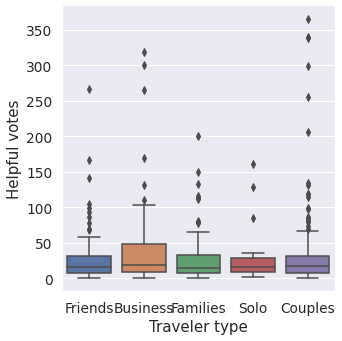

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 


# Set the font size to 1.25
sns.set(font_scale=1.25)

# Set the background to "darkgrid"
sns.set_style("darkgrid")

# Create a boxplot
sns.catplot(x="Traveler type", y="Helpful votes", data=reviews, kind="box")

plt.show()

*It looks like business travelers have left the most helpful reviews, although there are a few reviews by couples that have been really helpful to others.*

**3.2 Creating a bar plot**

Las Vegas hotels are seeing large variations in how helpful reviews appear to other people. The owners of these hotels are curious if there are times of the year when reviews have been more helpful to their potential guests. Help the owners understand their reviews better by creating a bar plot of the average number of helpful votes per review across the categorical variable "`Period of stay`". The dataset `reviews` has been preloaded for you.

Mar-May    128
Sep-Nov    126
Jun-Aug    126
Dec-Feb    124
Name: Period of stay, dtype: int64


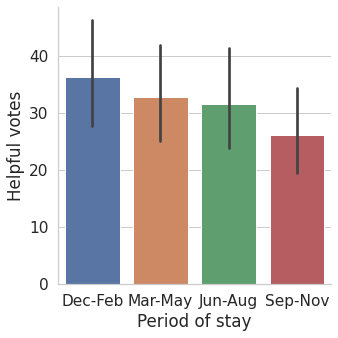

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Print the frequency counts of "Period of stay"
print(reviews["Period of stay"].value_counts())

sns.set(font_scale=1.4)
sns.set_style("whitegrid")

# Create a bar plot of "Helpful votes" by "Period of stay"
sns.catplot(x="Period of stay", y="Helpful votes", data=reviews, kind="bar")
plt.show()

*With `.value_counts()` we see that each category has a similar number of reviews. It also looks like potential guests find reviews from December-February to be the most helpful, while reviews from September-November appear to be the least helpful.*

**3.3 Ordering categories**

Not all categories are created equal. In the hotel `review` dataset, reviews, hotel owners know that most of their customers are from North America. When visualizing data broken out by "`User continent`" they might want North America to appear first. An ordered list of user continents has been provided as `continent_categories`. In this exercise, you will work through preparing a visualization that is ordered by the frequency counts of a Series.

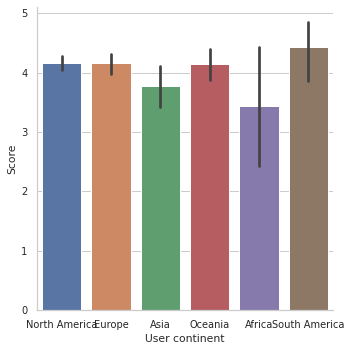

North America    295
Europe           118
Oceania           41
Asia              36
South America      7
Africa             7
Name: User continent, dtype: int64


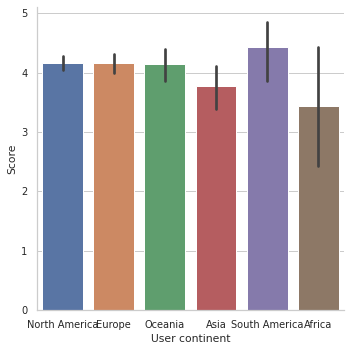

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Create a bar chart
sns.set(font_scale=.9)
sns.set_style("whitegrid")
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar")
plt.show()


# Set style
sns.set(font_scale=.9)
sns.set_style("whitegrid")

# Print the frequency counts for "User continent"
print(reviews["User continent"].value_counts())

# Convert "User continent" to a categorical variable
reviews["User continent"] = reviews["User continent"].astype("category")

# Reorder "User continent" using continent_categories and rerun the graphic
continent_categories = list(reviews["User continent"].value_counts().index)
reviews["User continent"] = reviews["User continent"].cat.reorder_categories(new_categories=continent_categories)
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar")
plt.show()

*You have successfully ordered the graphic from the most common user continent to the least common. Notice that the confidence intervals are smaller for continents with more reviews.*

**3.4 Bar plot using hue**

Aggregating information across multiple categories is often necessary to help stakeholders better understand their data. In preparation for building a dashboard that will allow users to select up to two variables when creating visualizations, you want to test visualizations that use different combinations of categorical variables using a bar plot.

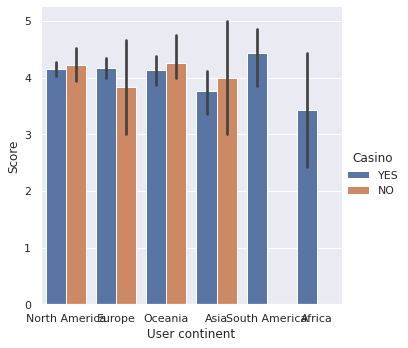

In [ ]:
sns.set(font_scale=1.0)
sns.set_style("darkgrid")
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar", hue="Casino")
plt.show()

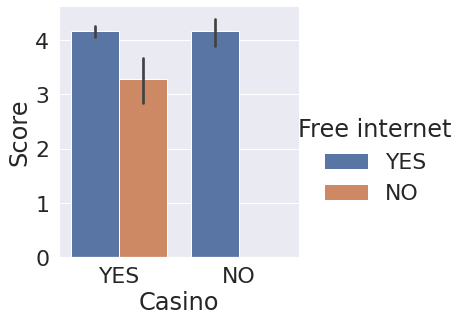

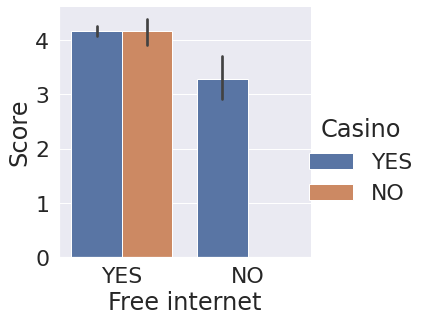

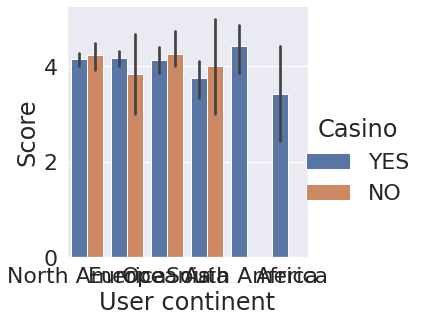

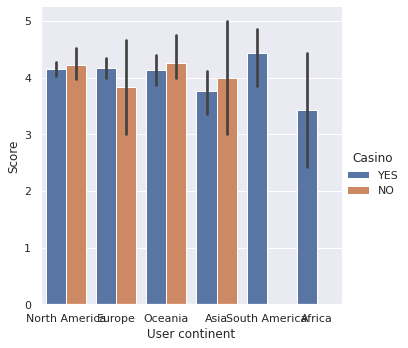

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Add a second category to split the data on: "Free internet"
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x="Casino", y="Score", data=reviews, kind="bar", hue="Free internet")
plt.show()


# Switch the x and hue categories
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x="Free internet", y="Score", data=reviews, kind="bar", hue="Casino")
plt.show()

# Update x to be "User continent"
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar", hue="Casino")
plt.show()

# Lower the font size so that all text fits on the screen.
sns.set(font_scale=1.0)
sns.set_style("darkgrid")
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar", hue="Casino")
plt.show()

*When creating multiple visualizations, you need to make sure the Seaborn settings will work for all of the possible outputs. For your dashboard, you made `font_scale` smaller because of the number of categories in the `x` parameter.*


**3.5 Creating a point plot**

Creating helpful visualizations sometimes requires a lot of testing. You have been asked to create a visualization that shows the number of reviews, "`Nr. reviews`", which is the number of reviews a reviewer has previously written, across a hotel's star rating, "`Hotel stars`". Since the number of reviews is `numerical`, you have decided to use a point plot to show the mean of the data across the categories.

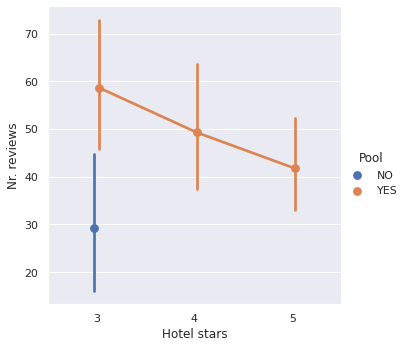

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.catplot( # Split the data across Hotel stars and summarize Nr. reviews
# Create a point plot with catplot using "Hotel stars" and "Nr. reviews"
sns.catplot( # Split the data across Hotel stars and summarize Nr. reviews
x="Hotel stars", y="Nr. reviews", data=reviews,
 # Specify a point plot
 kind="point",hue="Pool",# Make sure the lines and points don't overlap
  dodge=True)
plt.show()

**Although it is great to see big differences in the average number of previous reviews across the different hotel star ratings for hotels with a pool, there aren't enough 4 and 5 star hotels without a pool to display any information. We might want to find a different category for the hue parameter here or just show the 'Nr. of reviews' across the different hotel star ratings**

**3.6 Creating a count plot**

When creating quick analysis of frequency counts, you have been using .`value_counts()`. This is a great way for you to see the counts and get an idea of which categories are present in the data. However, sending frequency tables to clients or coworkers may not always be a good idea. For this exercise, you will visualize the number of reviews by their "`Score`". Although "`Score`" has been used as a numerical variable in the past, it can be used as a categorical variable given that it has five unique values that are ordered from worst to best. The `reviews` dataset has been preloaded.



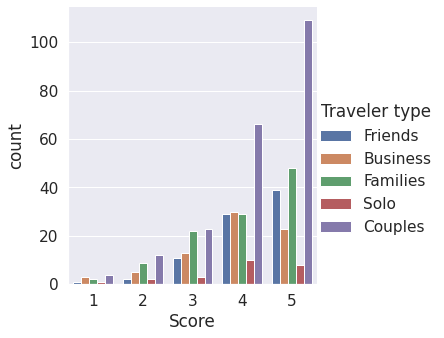

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(font_scale=1.4)
sns.set_style("darkgrid")

# Create a catplot that will count the frequency of "Score" across "Traveler type"
sns.catplot(x="Score",data=reviews,kind="count",hue="Traveler type")
plt.show()

*The couples Traveler type and a score of 5 were the most common values found in the data. Don't worry about the legend placement. We can move this outside of the chart if needed*

**Excercise**

1: a graphical form of a frequency table.
2: has the parameters, join and dodge, which can update the look of the lines in the plot.
3: can be used to see the distribution and outliers of a numeric column.
4: is similar to a point plot and can be used to see the central tendency of numerical data.

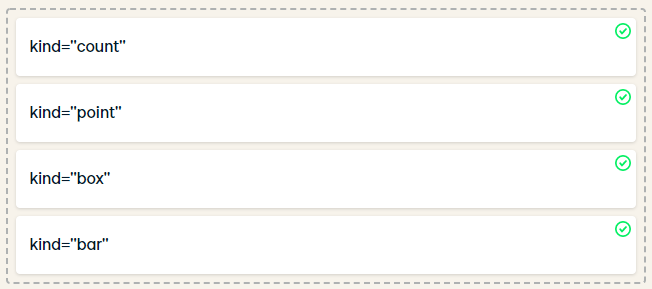


There are a lot of different uses for seaborn's catplot() and you clearly understand what each one is used for!

**3.7 One visualization per group**

While working on a data exploration project, you have been asked to visualize the number of reviews of hotels by "`Period of stay`" and by the day of the week, "`Review weekday`". The goal of this visualization is to see what day of the week has the most `reviews` for each of the four periods of stay. The reviews dataset has been preloaded for you, as well as both `seaborn`, as `sns`, and `matplotlib.pyplot` as `plt`.

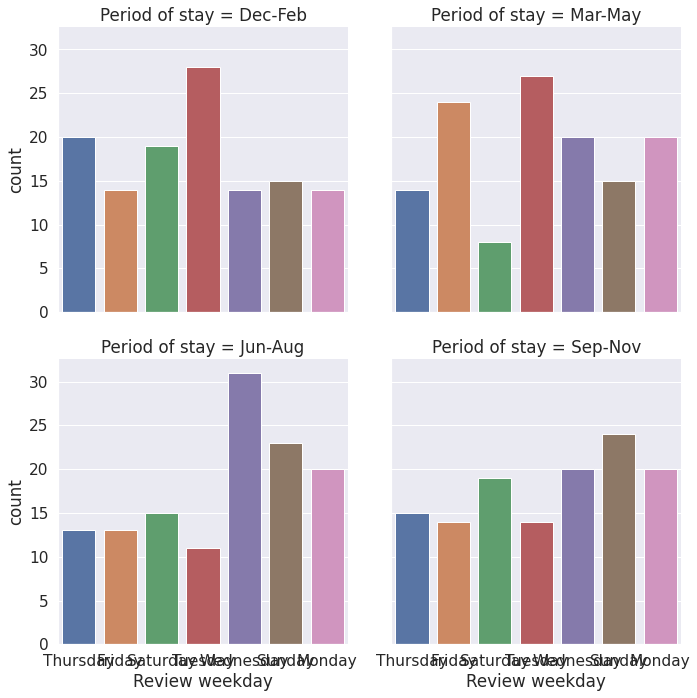

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Create a catplot for each "Period of stay" broken down by "Review weekday"
ax = sns.catplot(
  # Make sure Review weekday is along the x-axis
  x="Review weekday",
  # Specify Period of stay as the column to create individual graphics for
  col="Period of stay",
  # Specify that a count plot should be created
  kind="count",
  # Wrap the plots after every 2nd graphic.
  col_wrap=2,
  data=reviews
)
plt.show()

*Did you notice that Tuesday was the most common review day for December through May, but one of the least common days for June through November? Creating side-by-side categorical plots is a great way to visualize your data*

**3.8 Updating categorical plots**

Hotels are constantly working to get better reviews from their customers. A hotel chain has asked you to create visualizations to help the company understand why people might provide various ratings after staying at their hotels. A manager has asked if hotels with "Free internet" receive higher reviews given the "`Traveler type`".

Creating visualizations is an iterative process. In this exercise, you will start with a basic graphic and iteratively add features until you have a finished product. The reviews dataset has been preloaded for you, as well as both seaborn, as sns, and matplotlib.pyplot as plt.

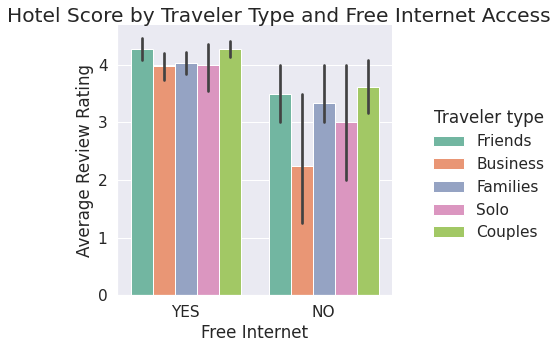

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Adjust the color
ax = sns.catplot(
  x="Free internet", y="Score",
  hue="Traveler type", kind="bar",
  data=reviews,
  palette=sns.color_palette("Set2")
)

# Add a title
ax.fig.suptitle("Hotel Score by Traveler Type and Free Internet Access")
# Update the axis labels
ax.set_axis_labels("Free Internet", "Average Review Rating")

# Adjust the starting height of the graphic
plt.subplots_adjust(top=.93)
plt.show()

*It looks like free internet really makes a difference, especially for business-related travelers. It is important to create plots that highlight the results you are trying to convey*

**Chapter 4 Pitfalls and Encoding**

**Memory usage knowledge check**

Using categorical `pandas` Series can save a lot of memory, sometimes as much as 90% of the original columns memory usage. If each of the columns below is converted to a categorical Series, which column will save the most memory? The `used_cars` dataset has been loaded for you.

*Although `model_name` is currently an object column, it has over 1,000 unique values. Try to find a column with fewer unique values.*

Answer: The '`drivetrain`' column only has three different values, while 'model_name' has over 1,000. The price of the car is better left as a numeric column and has too many unique values anyway.

In [ ]:
import pandas as pd
used_cars = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/14. Working with Categorical Data in Python/cars.csv')
used_cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

**4.1 Overcoming pitfalls: string issues**

Being able to effectively use categorical `pandas` Series is an important skill to have in your toolbelt. Unfortunately, there are several common problems that you may run into when using these Series.

In this exercise, you will work through code from a previous exercise on updating a categorical Series. Follow the instructions to make sure everything goes smoothly. The used cars dataset, `used_cars`, is loaded for you.

In [ ]:
# Print the frequency table of the "body_type" column for used_cars and include NaN values.
print(used_cars["body_type"].value_counts(dropna=False))


sedan        13011
hatchback     7644
universal     5507
suv           5164
minivan       3608
minibus       1369
van            808
coupe          652
liftback       552
pickup         129
cabriolet       75
limousine       12
Name: body_type, dtype: int64


In [ ]:
# Print the frequency table of the "body_type" column for used_cars and include NaN values.
print(used_cars["body_type"].value_counts(dropna=False))

# Update NaN values
used_cars.loc[used_cars["body_type"].isna(), "body_type"] = "other"

sedan        13011
hatchback     7644
universal     5507
suv           5164
minivan       3608
minibus       1369
van            808
coupe          652
liftback       552
pickup         129
cabriolet       75
limousine       12
Name: body_type, dtype: int64


In [ ]:
# Print the frequency table of body_type and include NaN values
print(used_cars["body_type"].value_counts(dropna=False))

# Update NaN values
used_cars.loc[used_cars["body_type"].isna(), "body_type"] = "other"

# Convert body_type to title case
used_cars["body_type"] = used_cars["body_type"].str.title()

sedan        13011
hatchback     7644
universal     5507
suv           5164
minivan       3608
minibus       1369
van            808
coupe          652
liftback       552
pickup         129
cabriolet       75
limousine       12
Name: body_type, dtype: int64


In [ ]:
# Print the frequency table of body_type and include NaN values
print(used_cars["body_type"].value_counts(dropna=False))

# Update NaN values
used_cars.loc[used_cars["body_type"].isna(), "body_type"] = "other"

# Convert body_type to title case
used_cars["body_type"] = used_cars["body_type"].str.title()

# Check the dtype
print(used_cars["body_type"].dtype)

Sedan        13011
Hatchback     7644
Universal     5507
Suv           5164
Minivan       3608
Minibus       1369
Van            808
Coupe          652
Liftback       552
Pickup         129
Cabriolet       75
Limousine       12
Name: body_type, dtype: int64
object


***Categorical Series can be tricky. When in doubt, check the changes you have made and convert back to a categorical Series if needed. In this example you made 3 changes and the last one converted the Series to an object. This required you to convert it back to categorical before continuing.***

**4.2 Overcoming pitfalls: using numpy arrays**

A local used car company manually appraises each car that they add to their inventory. When a new car comes in, they select from a drop-down menu, giving the car a rating between 1 and 5. A 1 means that the car probably won't sell as is, but a 5 indicates the car will definitely sell without a problem.

With over 38,000 cars in their inventory, the company has asked you to give them an average "sellability" of their cars. For this exercise, use the `used_cars` dataset. The column of interest is called "`Sale Rating`" and it is currently a categorical column.

In [ ]:
# Print the frequency table of Sale Rating
print(used_cars["Sale Rating"].value_counts())


# Find the average score
average_score = used_cars["sale rating"].astype(int).mean()

# Print the average
print(average_score)

KeyError: ignored


`average_score = used_cars["Sale Rating"].mean()`

*A type error, because numpy doesn't understand the categorical dtype.*

*The used cars sellability was above 4 on average. In this context, it is OK to have this column as categorical. There are only five possible responses and no other value will be allowed in this column.*

**4.3 Create a label encoding and map**

A used car company believes that they can predict a car's sales price reasonably well using their `used_cars` dataset. One of the variables they want to use, "`color`", needs to be converted to codes. The company believes that a car's color will be important when predicting sales price.

In [ ]:
import pandas as pd

# Convert to categorical and print the frequency table
used_cars["color"] = used_cars["color"].astype("category")
print(used_cars["color"].value_counts())

# Create a label encoding
used_cars["color_code"] = used_cars["color"].cat.codes

# Create codes and categories objects
codes = used_cars["color"].cat.codes
categories = used_cars["color"]
color_map = dict(zip(codes, categories))

# Print the map
print(color_map)

black     7705
silver    6852
blue      5802
white     4212
grey      3751
red       2925
green     2760
other     2688
brown      886
violet     463
yellow     303
orange     184
Name: color, dtype: int64
{8: 'silver', 1: 'blue', 7: 'red', 0: 'black', 4: 'grey', 6: 'other', 2: 'brown', 10: 'white', 3: 'green', 9: 'violet', 5: 'orange', 11: 'yellow'}


*We successfully created a label encoding for the color column. Creating an encoding like this can save on memory and improve performance. Reading and writing files that use codes instead of strings can save a lot of time.*

**4.4 Using saved mappings**

You are using a subset of a dataset and have been asked to create visualizations summarizing the output. As the dataset currently stands, all you see are numbers! Luckily, you had created and saved dictionaries (`color_map`, `fuel_map`, and `transmission_map`) that will map these columns back to their original categorical names. The dataset `used_cars_updated` has been preloaded. A preview of the dataset is below. Check out the console to see the column data types.

In [ ]:
import pandas as pd

# Update the color column using the color_map
used_cars_updated["color"] = used_cars_updated["color"].map(color_map)
# Update the engine fuel column using the fuel_map
used_cars_updated["engine_fuel"] = used_cars_updated["engine_fuel"].map(fuel_map)
# Update the transmission column using the transmission_map
used_cars_updated["transmission"] = used_cars_updated["transmission"].map(transmission_map)

# Print the info statement
print(used_cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   manufacturer_name  38531 non-null  object  
 1   model_name         38531 non-null  object  
 2   transmission       38531 non-null  object  
 3   color              38531 non-null  category
 4   odometer_value     38531 non-null  int64   
 5   year_produced      38531 non-null  int64   
 6   engine_fuel        38531 non-null  object  
 7   engine_has_gas     38531 non-null  bool    
 8   engine_type        38531 non-null  object  
 9   engine_capacity    38521 non-null  float64 
 10  body_type          38531 non-null  object  
 11  has_warranty       38531 non-null  bool    
 12  state              38531 non-null  object  
 13  drivetrain         38531 non-null  object  
 14  price_usd          38531 non-null  float64 
 15  is_exchangeable    38531 non-null  bool    
 16  loca

*When you start making visualizations it will be really helpful to have the actual values and not the just the codes. Also notice that the categorical dtype was preserved when we mapped the integers back to their original values. In this case, we don't need to convert each column back to a categorical Series.*

**4.5 Creating a Boolean encoding**

In preparation for running machine learning models to estimate the sale price of used cars, you are starting to analyze the available columns of the `*used_cars*` dataset and want to create columns that can be used in training. One of the managers of a used car dealership has said that the manufacturer of the car is the most important aspect he considers when setting prices. You will begin by exploring the `manufacturer_name` column.

In [ ]:
import pandas as pd
import numpy as np

# Print the manufacturer name frequency table
print(used_cars["manufacturer_name"].value_counts())

# Create a Boolean column based on if the manufacturer name that contain Volkswagen
used_cars["is_volkswagen"] = np.where(
  used_cars["manufacturer_name"].str.contains("Volkswagen", regex=False), True, False
)

Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery     

In [ ]:
import pandas as pd
import numpy as np

# Print the "manufacturer_name" frequency table.
print(used_cars["manufacturer_name"].value_counts())

# Create a Boolean column for the most common manufacturer name
used_cars["is_volkswagen"] = np.where(used_cars["manufacturer_name"].str.contains("Volkswagen", regex=False), 1, 0)
  
# Check the final frequency table
print(used_cars["is_volkswagen"].value_counts())

Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery     

*A lot of methods in Python will return True/False values as 0s and 1s. For consistency, sometimes you may want to save the column with actualy True and False values, while sometimes you might want to use 0s and 1s.*

**4.6 One-hot knowledge check**

Below is a frequency table from a categorical pandas Series for a person's favorite soda.


`Coke      1221`

`Pepsi     1117`

`NaN         21`

If one-hot encoding is completed only on this column, and this is the only column in the dataset, how many columns will be in the final dataset?

Example code:

`soda_onehot = pd.get_dummies(soda[["favorite_soda"]], columns=["favorite_soda"])`


Answer: *One-hot encoding this column will result in two columns. The original column is dropped, and a new column for missing values is not created.*

**4.7 One-hot encoding specific columns**

A local used car dealership wants your help in predicting the sale price of their vehicles. If you use one-hot encoding on the entire `used_cars` dataset, the new dataset has over 1,200 columns. You are worried that this might lead to problems when training your machine learning models to predict price. You have decided to try a simpler approach and only use one-hot encoding on a few columns.

In [ ]:
import pandas as pd

# Create one-hot encoding for just two columns
used_cars_simple = pd.get_dummies(used_cars,
  # Specify the columns from the instructions
  columns=["manufacturer_name", "transmission"],
  # Set the prefix
  prefix="dummy")

# Print the shape of the new dataset
print(used_cars_simple.shape)


(38531, 87)


*Instead of having over 1,200 columns, this simple dataset only has 85. You won't be able to use categorical columns that have not been encoded, but limiting which categorical columns are included in your algorithm may prevent overfitting and help the dealership quickly assess a car's potential sale price. Tweet us your feedback and tell us what you think.*

# **Streamlined Data Ingestion with pandas**